In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, scheduler=scheduler)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser

In [39]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data =  EMNISTDataProvider('test', batch_size=15800, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fd91f8b4898>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fd91f8b4898>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fd91f952b38>)


In [3]:
def evaluation_acc(dataset, model):
    for inputs, targets in dataset:
        activations = model.fprop(inputs, evaluation=True)
        predictions = activations[-1]
        acc = (predictions.argmax(-1) == targets.argmax(-1)).mean()
    return acc

In [4]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule
from mlp.schedulers import CosineAnnealingWithWarmRestarts
from mlp.optimisers import Optimiser
from collections import OrderedDict

In [5]:
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

## SGD

In [6]:
sgd_labels = ['SGD with fixed learning rate', 
              'SGD using cosine annealing without restarts', 
              'SGD using cosine annealing with restarts']

Epoch 1: 1.2s to complete
    error(train)=2.53e+00, acc(train)=3.64e-01, error(valid)=2.53e+00, acc(valid)=3.57e-01


Epoch 2: 1.2s to complete
    error(train)=1.53e+00, acc(train)=5.75e-01, error(valid)=1.53e+00, acc(valid)=5.76e-01


Epoch 3: 1.2s to complete
    error(train)=1.31e+00, acc(train)=6.29e-01, error(valid)=1.31e+00, acc(valid)=6.26e-01


Epoch 4: 1.2s to complete
    error(train)=1.19e+00, acc(train)=6.60e-01, error(valid)=1.19e+00, acc(valid)=6.55e-01


Epoch 5: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.86e-01, error(valid)=1.10e+00, acc(valid)=6.83e-01


Epoch 6: 1.4s to complete
    error(train)=1.02e+00, acc(train)=7.05e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


Epoch 7: 1.2s to complete
    error(train)=9.53e-01, acc(train)=7.21e-01, error(valid)=9.64e-01, acc(valid)=7.19e-01


Epoch 8: 1.2s to complete
    error(train)=9.03e-01, acc(train)=7.34e-01, error(valid)=9.17e-01, acc(valid)=7.29e-01


Epoch 9: 1.3s to complete
    error(train)=8.62e-01, acc(train)=7.45e-01, error(valid)=8.79e-01, acc(valid)=7.39e-01


Epoch 10: 1.3s to complete
    error(train)=8.19e-01, acc(train)=7.55e-01, error(valid)=8.37e-01, acc(valid)=7.51e-01


Epoch 11: 1.2s to complete
    error(train)=7.81e-01, acc(train)=7.65e-01, error(valid)=8.01e-01, acc(valid)=7.62e-01


Epoch 12: 1.2s to complete
    error(train)=7.54e-01, acc(train)=7.72e-01, error(valid)=7.75e-01, acc(valid)=7.67e-01


Epoch 13: 1.2s to complete
    error(train)=7.25e-01, acc(train)=7.81e-01, error(valid)=7.49e-01, acc(valid)=7.75e-01


Epoch 14: 1.3s to complete
    error(train)=7.10e-01, acc(train)=7.82e-01, error(valid)=7.34e-01, acc(valid)=7.73e-01


Epoch 15: 1.2s to complete
    error(train)=6.84e-01, acc(train)=7.91e-01, error(valid)=7.12e-01, acc(valid)=7.80e-01


Epoch 16: 1.2s to complete
    error(train)=6.67e-01, acc(train)=7.93e-01, error(valid)=6.97e-01, acc(valid)=7.82e-01


Epoch 17: 1.2s to complete
    error(train)=6.52e-01, acc(train)=7.98e-01, error(valid)=6.85e-01, acc(valid)=7.85e-01


Epoch 18: 1.3s to complete
    error(train)=6.35e-01, acc(train)=8.02e-01, error(valid)=6.69e-01, acc(valid)=7.90e-01


Epoch 19: 1.2s to complete
    error(train)=6.20e-01, acc(train)=8.08e-01, error(valid)=6.54e-01, acc(valid)=7.97e-01


Epoch 20: 1.2s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=6.49e-01, acc(valid)=7.92e-01


Epoch 21: 1.2s to complete
    error(train)=5.96e-01, acc(train)=8.10e-01, error(valid)=6.34e-01, acc(valid)=8.00e-01


Epoch 22: 1.2s to complete
    error(train)=5.91e-01, acc(train)=8.12e-01, error(valid)=6.32e-01, acc(valid)=8.00e-01


Epoch 23: 1.2s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.25e-01, acc(valid)=8.01e-01


Epoch 24: 1.2s to complete
    error(train)=5.68e-01, acc(train)=8.19e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


Epoch 25: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.02e-01, acc(valid)=8.09e-01


Epoch 26: 1.2s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


Epoch 27: 1.2s to complete
    error(train)=5.35e-01, acc(train)=8.29e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


Epoch 28: 1.3s to complete
    error(train)=5.28e-01, acc(train)=8.29e-01, error(valid)=5.85e-01, acc(valid)=8.13e-01


Epoch 29: 1.2s to complete
    error(train)=5.23e-01, acc(train)=8.30e-01, error(valid)=5.81e-01, acc(valid)=8.11e-01


Epoch 30: 1.2s to complete
    error(train)=5.15e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 31: 1.2s to complete
    error(train)=5.12e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


Epoch 32: 1.2s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=5.62e-01, acc(valid)=8.17e-01


Epoch 33: 1.2s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


Epoch 34: 1.2s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 35: 1.2s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


Epoch 36: 1.2s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


Epoch 37: 1.2s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 38: 1.3s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.51e-01, acc(valid)=8.20e-01


Epoch 39: 1.2s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


Epoch 40: 1.2s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 41: 1.4s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 42: 1.2s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 43: 1.2s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 44: 1.2s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 45: 1.2s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 46: 1.2s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 47: 1.2s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 48: 1.2s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 49: 1.3s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 50: 1.2s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 51: 1.2s to complete
    error(train)=4.19e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 52: 1.2s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 53: 1.2s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 54: 1.3s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 55: 1.2s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


Epoch 56: 1.2s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 57: 1.3s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 58: 1.3s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 59: 1.2s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 60: 1.2s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 61: 1.2s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 62: 1.4s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 63: 1.4s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 64: 1.2s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 65: 1.2s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 66: 1.2s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 67: 1.2s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


Epoch 68: 1.3s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


Epoch 69: 1.4s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 70: 1.2s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 71: 1.2s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 72: 1.3s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 73: 1.2s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 74: 1.2s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 75: 1.3s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


Epoch 76: 1.3s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 77: 1.3s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 78: 1.3s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 79: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 80: 1.4s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 81: 1.2s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 82: 1.2s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 83: 1.2s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 84: 1.2s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 85: 1.2s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 86: 1.2s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 87: 1.2s to complete
    error(train)=3.40e-01, acc(train)=8.80e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 88: 1.2s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 89: 1.3s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 90: 1.3s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 91: 1.2s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 92: 1.2s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 93: 1.2s to complete
    error(train)=3.35e-01, acc(train)=8.83e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 94: 1.2s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


Epoch 95: 1.2s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 96: 1.4s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 97: 1.4s to complete
    error(train)=3.24e-01, acc(train)=8.86e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 98: 1.2s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 99: 1.2s to complete
    error(train)=3.19e-01, acc(train)=8.89e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 100: 1.2s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


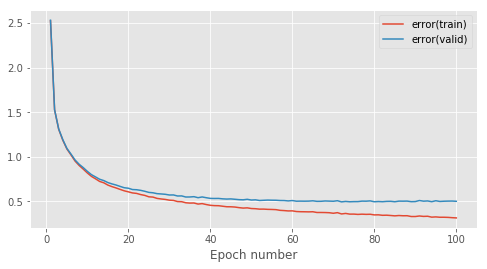

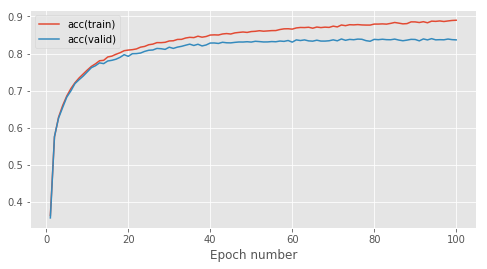

In [7]:
num_epochs = 100
learning_rate = 0.01

layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

sgd_fixed_lr_model = MultipleLayerModel(layers)
learning_rule = GradientDescentLearningRule(learning_rate)
sgd_fixed_lr_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        sgd_fixed_lr_model, error, learning_rule, None, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

sgd_fixed_lr_lrs = optimiser.learning_rate_array

In [8]:
np.max(sgd_fixed_lr_stats[1:, keys['acc(valid)']])

0.8400632911392403

In [28]:
sgd_fixed_lr_stats[-1] keys['acc(valid)']

SyntaxError: invalid syntax (<ipython-input-28-c2ce7df32ef4>, line 1)

In [9]:
np.argmax(sgd_fixed_lr_stats[1:, keys['acc(valid)']])

93

### hyperparameters for cosine without restarts

Epoch 1: 1.3s to complete
    error(train)=1.52e+00, acc(train)=5.72e-01, error(valid)=1.52e+00, acc(valid)=5.74e-01


Epoch 2: 1.2s to complete
    error(train)=1.17e+00, acc(train)=6.64e-01, error(valid)=1.17e+00, acc(valid)=6.61e-01


Epoch 3: 1.2s to complete
    error(train)=9.97e-01, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.02e-01


Epoch 4: 1.3s to complete
    error(train)=8.90e-01, acc(train)=7.37e-01, error(valid)=9.07e-01, acc(valid)=7.28e-01


Epoch 5: 1.2s to complete
    error(train)=8.09e-01, acc(train)=7.56e-01, error(valid)=8.27e-01, acc(valid)=7.46e-01


Epoch 6: 1.2s to complete
    error(train)=7.57e-01, acc(train)=7.66e-01, error(valid)=7.80e-01, acc(valid)=7.58e-01


Epoch 7: 1.2s to complete
    error(train)=7.15e-01, acc(train)=7.79e-01, error(valid)=7.44e-01, acc(valid)=7.68e-01


Epoch 8: 1.2s to complete
    error(train)=6.76e-01, acc(train)=7.89e-01, error(valid)=7.09e-01, acc(valid)=7.77e-01


Epoch 9: 1.4s to complete
    error(train)=6.38e-01, acc(train)=7.99e-01, error(valid)=6.72e-01, acc(valid)=7.90e-01


Epoch 10: 1.2s to complete
    error(train)=6.12e-01, acc(train)=8.06e-01, error(valid)=6.46e-01, acc(valid)=7.96e-01


Epoch 11: 1.2s to complete
    error(train)=6.02e-01, acc(train)=8.06e-01, error(valid)=6.40e-01, acc(valid)=7.96e-01


Epoch 12: 1.2s to complete
    error(train)=5.77e-01, acc(train)=8.16e-01, error(valid)=6.18e-01, acc(valid)=8.03e-01


Epoch 13: 1.2s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=6.02e-01, acc(valid)=8.07e-01


Epoch 14: 1.2s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.92e-01, acc(valid)=8.10e-01


Epoch 15: 1.4s to complete
    error(train)=5.23e-01, acc(train)=8.31e-01, error(valid)=5.77e-01, acc(valid)=8.13e-01


Epoch 16: 1.3s to complete
    error(train)=5.11e-01, acc(train)=8.33e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


Epoch 17: 1.2s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


Epoch 18: 1.2s to complete
    error(train)=4.99e-01, acc(train)=8.37e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


Epoch 19: 1.2s to complete
    error(train)=4.80e-01, acc(train)=8.41e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 20: 1.3s to complete
    error(train)=4.75e-01, acc(train)=8.42e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


Epoch 21: 1.3s to complete
    error(train)=4.68e-01, acc(train)=8.45e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


Epoch 22: 1.2s to complete
    error(train)=4.64e-01, acc(train)=8.45e-01, error(valid)=5.39e-01, acc(valid)=8.22e-01


Epoch 23: 1.3s to complete
    error(train)=4.49e-01, acc(train)=8.50e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01


Epoch 24: 1.2s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 25: 1.3s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


Epoch 26: 1.2s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


Epoch 27: 1.2s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 28: 1.2s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 29: 1.4s to complete
    error(train)=4.25e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 30: 1.3s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


Epoch 31: 1.2s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


Epoch 32: 1.3s to complete
    error(train)=4.06e-01, acc(train)=8.61e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 33: 1.5s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


Epoch 34: 1.3s to complete
    error(train)=3.96e-01, acc(train)=8.65e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 35: 1.4s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


Epoch 36: 1.2s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 37: 1.3s to complete
    error(train)=3.88e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.30e-01


Epoch 38: 1.3s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


Epoch 39: 1.4s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


Epoch 40: 1.3s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 41: 1.4s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 42: 1.4s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


Epoch 43: 1.4s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 44: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 45: 1.2s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


Epoch 46: 1.4s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


Epoch 47: 1.3s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 48: 1.3s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


Epoch 49: 1.3s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 50: 1.3s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


Epoch 51: 1.2s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


Epoch 52: 1.2s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 53: 1.2s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


Epoch 54: 1.2s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 55: 1.2s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


Epoch 56: 1.2s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 57: 1.3s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 58: 1.3s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


Epoch 59: 1.3s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 60: 1.2s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 61: 1.3s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


Epoch 62: 1.3s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


Epoch 63: 1.3s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


Epoch 64: 1.3s to complete
    error(train)=3.19e-01, acc(train)=8.89e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 65: 1.3s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 66: 1.3s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 67: 1.3s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=4.79e-01, acc(valid)=8.45e-01


Epoch 68: 1.3s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


Epoch 69: 1.4s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=4.80e-01, acc(valid)=8.46e-01


Epoch 70: 1.3s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 71: 1.2s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 72: 1.3s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 73: 1.3s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 74: 1.2s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 75: 1.3s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 76: 1.3s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 77: 1.3s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 78: 1.3s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 79: 1.3s to complete
    error(train)=3.05e-01, acc(train)=8.94e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


Epoch 80: 1.3s to complete
    error(train)=3.06e-01, acc(train)=8.94e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 81: 1.2s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 82: 1.4s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 83: 1.2s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


Epoch 84: 1.2s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.81e-01, acc(valid)=8.47e-01


Epoch 85: 1.3s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 86: 1.3s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 87: 1.3s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 88: 1.2s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


Epoch 89: 1.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


Epoch 90: 1.2s to complete
    error(train)=3.01e-01, acc(train)=8.95e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 91: 1.3s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


Epoch 92: 1.2s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


Epoch 93: 1.3s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 94: 1.2s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 95: 1.3s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


Epoch 96: 1.3s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 97: 1.4s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 98: 1.4s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 99: 1.3s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


Epoch 100: 1.3s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


Epoch 1: 1.3s to complete
    error(train)=1.51e+00, acc(train)=5.73e-01, error(valid)=1.52e+00, acc(valid)=5.72e-01


Epoch 2: 1.3s to complete
    error(train)=1.16e+00, acc(train)=6.68e-01, error(valid)=1.16e+00, acc(valid)=6.68e-01


Epoch 3: 1.2s to complete
    error(train)=9.94e-01, acc(train)=7.11e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


Epoch 4: 1.2s to complete
    error(train)=9.05e-01, acc(train)=7.31e-01, error(valid)=9.22e-01, acc(valid)=7.27e-01


Epoch 5: 1.2s to complete
    error(train)=8.17e-01, acc(train)=7.55e-01, error(valid)=8.40e-01, acc(valid)=7.44e-01


Epoch 6: 1.2s to complete
    error(train)=7.53e-01, acc(train)=7.73e-01, error(valid)=7.78e-01, acc(valid)=7.62e-01


Epoch 7: 1.2s to complete
    error(train)=7.23e-01, acc(train)=7.77e-01, error(valid)=7.56e-01, acc(valid)=7.65e-01


Epoch 8: 1.2s to complete
    error(train)=6.66e-01, acc(train)=7.95e-01, error(valid)=7.00e-01, acc(valid)=7.83e-01


Epoch 9: 1.3s to complete
    error(train)=6.38e-01, acc(train)=8.02e-01, error(valid)=6.74e-01, acc(valid)=7.91e-01


Epoch 10: 1.2s to complete
    error(train)=6.27e-01, acc(train)=8.01e-01, error(valid)=6.66e-01, acc(valid)=7.88e-01


Epoch 11: 1.2s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=6.51e-01, acc(valid)=7.96e-01


Epoch 12: 1.2s to complete
    error(train)=5.86e-01, acc(train)=8.12e-01, error(valid)=6.34e-01, acc(valid)=7.97e-01


Epoch 13: 2.2s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


Epoch 14: 2.1s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=6.01e-01, acc(valid)=8.11e-01


Epoch 15: 2.2s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.13e-01


Epoch 16: 2.2s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


Epoch 17: 2.1s to complete
    error(train)=5.01e-01, acc(train)=8.39e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


Epoch 18: 2.1s to complete
    error(train)=4.95e-01, acc(train)=8.40e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 19: 2.1s to complete
    error(train)=5.00e-01, acc(train)=8.37e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 20: 2.2s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 21: 2.2s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 22: 2.2s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 23: 2.2s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 24: 2.2s to complete
    error(train)=4.63e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 25: 2.3s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


Epoch 26: 2.2s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 27: 2.2s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 28: 2.2s to complete
    error(train)=4.27e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


Epoch 29: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 30: 2.3s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 31: 2.4s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 32: 2.3s to complete
    error(train)=4.14e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


Epoch 33: 2.1s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 34: 2.1s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 35: 2.1s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 36: 2.2s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 37: 2.1s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 38: 2.1s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 39: 2.4s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 40: 2.4s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 41: 2.5s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 42: 2.3s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 43: 2.3s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 44: 2.1s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 45: 2.0s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 46: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 47: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 48: 2.1s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 49: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 50: 2.1s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 51: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=4.88e-01, acc(valid)=8.43e-01


Epoch 52: 2.1s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 53: 2.2s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


Epoch 54: 2.1s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 55: 2.1s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 56: 2.2s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


Epoch 57: 2.1s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 58: 2.2s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 59: 2.1s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


Epoch 60: 2.1s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


Epoch 61: 2.0s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 62: 2.0s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


Epoch 63: 2.1s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=4.89e-01, acc(valid)=8.43e-01


Epoch 64: 2.0s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=4.89e-01, acc(valid)=8.43e-01


Epoch 65: 2.0s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 66: 2.2s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=4.90e-01, acc(valid)=8.44e-01


Epoch 67: 2.1s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=4.90e-01, acc(valid)=8.43e-01


Epoch 68: 2.1s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=4.88e-01, acc(valid)=8.43e-01


Epoch 69: 2.1s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


Epoch 70: 2.1s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


Epoch 71: 2.2s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


Epoch 72: 2.2s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=4.86e-01, acc(valid)=8.46e-01


Epoch 73: 2.1s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


Epoch 74: 2.6s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


Epoch 75: 2.5s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 76: 2.4s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


Epoch 77: 2.5s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


Epoch 78: 2.5s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=4.88e-01, acc(valid)=8.45e-01


Epoch 79: 2.5s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=4.88e-01, acc(valid)=8.43e-01


Epoch 80: 2.1s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


Epoch 81: 2.1s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


Epoch 82: 2.2s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


Epoch 83: 2.2s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


Epoch 84: 2.3s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


Epoch 85: 2.3s to complete
    error(train)=3.04e-01, acc(train)=8.96e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


Epoch 86: 2.3s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


Epoch 87: 2.1s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


Epoch 88: 2.2s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


Epoch 89: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


Epoch 90: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.46e-01


Epoch 91: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 92: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


Epoch 93: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 94: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


Epoch 95: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 96: 2.1s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 97: 2.1s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.46e-01


Epoch 98: 2.1s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 99: 2.1s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 100: 2.1s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


Epoch 1: 2.1s to complete
    error(train)=1.52e+00, acc(train)=5.77e-01, error(valid)=1.52e+00, acc(valid)=5.71e-01


Epoch 2: 2.1s to complete
    error(train)=1.17e+00, acc(train)=6.62e-01, error(valid)=1.18e+00, acc(valid)=6.54e-01


Epoch 3: 2.0s to complete
    error(train)=9.87e-01, acc(train)=7.12e-01, error(valid)=9.92e-01, acc(valid)=7.09e-01


Epoch 4: 1.9s to complete
    error(train)=8.85e-01, acc(train)=7.39e-01, error(valid)=9.00e-01, acc(valid)=7.35e-01


Epoch 5: 2.0s to complete
    error(train)=8.01e-01, acc(train)=7.58e-01, error(valid)=8.17e-01, acc(valid)=7.53e-01


Epoch 6: 2.1s to complete
    error(train)=7.43e-01, acc(train)=7.72e-01, error(valid)=7.62e-01, acc(valid)=7.68e-01


Epoch 7: 2.0s to complete
    error(train)=6.91e-01, acc(train)=7.86e-01, error(valid)=7.16e-01, acc(valid)=7.81e-01


Epoch 8: 2.1s to complete
    error(train)=6.59e-01, acc(train)=7.90e-01, error(valid)=6.87e-01, acc(valid)=7.83e-01


Epoch 9: 2.2s to complete
    error(train)=6.26e-01, acc(train)=8.02e-01, error(valid)=6.60e-01, acc(valid)=7.91e-01


Epoch 10: 2.2s to complete
    error(train)=6.04e-01, acc(train)=8.07e-01, error(valid)=6.41e-01, acc(valid)=7.96e-01


Epoch 11: 2.3s to complete
    error(train)=5.92e-01, acc(train)=8.11e-01, error(valid)=6.35e-01, acc(valid)=8.00e-01


Epoch 12: 2.6s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=6.22e-01, acc(valid)=8.02e-01


Epoch 13: 2.7s to complete
    error(train)=5.41e-01, acc(train)=8.26e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


Epoch 14: 2.4s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 15: 2.8s to complete
    error(train)=5.14e-01, acc(train)=8.33e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


Epoch 16: 2.1s to complete
    error(train)=5.04e-01, acc(train)=8.36e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


Epoch 17: 2.2s to complete
    error(train)=4.94e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 18: 2.2s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


Epoch 19: 2.2s to complete
    error(train)=4.84e-01, acc(train)=8.40e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 20: 2.1s to complete
    error(train)=4.71e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


Epoch 21: 2.1s to complete
    error(train)=4.62e-01, acc(train)=8.47e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 22: 2.1s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 23: 2.1s to complete
    error(train)=4.50e-01, acc(train)=8.49e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


Epoch 24: 2.2s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 25: 2.1s to complete
    error(train)=4.38e-01, acc(train)=8.52e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


Epoch 26: 2.2s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 27: 2.2s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 28: 2.1s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 29: 2.1s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 30: 2.1s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 31: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 32: 2.1s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 33: 2.1s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 34: 2.1s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 35: 2.1s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 36: 2.2s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 37: 2.1s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 38: 2.2s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 39: 2.1s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 40: 2.1s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 41: 2.1s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 42: 2.1s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 43: 2.1s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 44: 2.4s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 45: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 46: 2.0s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 47: 2.0s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


Epoch 48: 2.0s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 49: 2.1s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 50: 2.8s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 51: 2.2s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 52: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


Epoch 53: 2.3s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=5.05e-01, acc(valid)=8.42e-01


Epoch 54: 2.2s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 55: 2.2s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


Epoch 56: 2.2s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


Epoch 57: 2.2s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 58: 2.1s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


Epoch 59: 2.1s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 60: 2.1s to complete
    error(train)=3.25e-01, acc(train)=8.88e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 61: 2.2s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 62: 2.2s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.42e-01


Epoch 63: 2.1s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.99e-01, acc(valid)=8.44e-01


Epoch 64: 2.1s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


Epoch 65: 2.0s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 66: 2.1s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 67: 2.0s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


Epoch 68: 2.0s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


Epoch 69: 2.1s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


Epoch 70: 2.3s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 71: 2.1s to complete
    error(train)=3.14e-01, acc(train)=8.93e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 72: 2.1s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


Epoch 73: 2.1s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=5.01e-01, acc(valid)=8.43e-01


Epoch 74: 2.0s to complete
    error(train)=3.11e-01, acc(train)=8.94e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


Epoch 75: 2.0s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=4.99e-01, acc(valid)=8.43e-01


Epoch 76: 2.1s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


Epoch 77: 2.1s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 78: 2.1s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=5.03e-01, acc(valid)=8.42e-01


Epoch 79: 2.1s to complete
    error(train)=3.06e-01, acc(train)=8.96e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 80: 2.1s to complete
    error(train)=3.06e-01, acc(train)=8.96e-01, error(valid)=5.01e-01, acc(valid)=8.43e-01


Epoch 81: 2.1s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=5.00e-01, acc(valid)=8.42e-01


Epoch 82: 2.4s to complete
    error(train)=3.05e-01, acc(train)=8.96e-01, error(valid)=5.01e-01, acc(valid)=8.43e-01


Epoch 83: 2.4s to complete
    error(train)=3.05e-01, acc(train)=8.96e-01, error(valid)=5.00e-01, acc(valid)=8.44e-01


Epoch 84: 3.0s to complete
    error(train)=3.04e-01, acc(train)=8.96e-01, error(valid)=5.01e-01, acc(valid)=8.43e-01


Epoch 85: 2.3s to complete
    error(train)=3.04e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 86: 2.1s to complete
    error(train)=3.04e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.42e-01


Epoch 87: 2.3s to complete
    error(train)=3.03e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 88: 3.6s to complete
    error(train)=3.03e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 89: 2.2s to complete
    error(train)=3.03e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 90: 2.2s to complete
    error(train)=3.03e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 91: 2.1s to complete
    error(train)=3.03e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 92: 2.5s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 93: 2.0s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 94: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 95: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 96: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 97: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 98: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 99: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 100: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 1: 2.1s to complete
    error(train)=1.53e+00, acc(train)=5.72e-01, error(valid)=1.54e+00, acc(valid)=5.68e-01


Epoch 2: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.61e-01, error(valid)=1.19e+00, acc(valid)=6.57e-01


Epoch 3: 2.1s to complete
    error(train)=1.03e+00, acc(train)=6.99e-01, error(valid)=1.04e+00, acc(valid)=6.94e-01


Epoch 4: 2.3s to complete
    error(train)=9.14e-01, acc(train)=7.31e-01, error(valid)=9.27e-01, acc(valid)=7.27e-01


Epoch 5: 2.2s to complete
    error(train)=8.20e-01, acc(train)=7.52e-01, error(valid)=8.39e-01, acc(valid)=7.44e-01


Epoch 6: 2.2s to complete
    error(train)=7.56e-01, acc(train)=7.69e-01, error(valid)=7.75e-01, acc(valid)=7.63e-01


Epoch 7: 2.1s to complete
    error(train)=7.25e-01, acc(train)=7.74e-01, error(valid)=7.53e-01, acc(valid)=7.65e-01


Epoch 8: 2.1s to complete
    error(train)=6.82e-01, acc(train)=7.89e-01, error(valid)=7.13e-01, acc(valid)=7.80e-01


Epoch 9: 2.1s to complete
    error(train)=6.48e-01, acc(train)=7.98e-01, error(valid)=6.79e-01, acc(valid)=7.91e-01


Epoch 10: 2.2s to complete
    error(train)=6.18e-01, acc(train)=8.05e-01, error(valid)=6.55e-01, acc(valid)=7.95e-01


Epoch 11: 2.1s to complete
    error(train)=6.02e-01, acc(train)=8.06e-01, error(valid)=6.43e-01, acc(valid)=7.98e-01


Epoch 12: 2.1s to complete
    error(train)=5.85e-01, acc(train)=8.10e-01, error(valid)=6.29e-01, acc(valid)=7.95e-01


Epoch 13: 2.1s to complete
    error(train)=5.60e-01, acc(train)=8.20e-01, error(valid)=6.04e-01, acc(valid)=8.08e-01


Epoch 14: 2.2s to complete
    error(train)=5.41e-01, acc(train)=8.26e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


Epoch 15: 2.5s to complete
    error(train)=5.27e-01, acc(train)=8.28e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 16: 2.1s to complete
    error(train)=5.23e-01, acc(train)=8.31e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 17: 2.2s to complete
    error(train)=5.07e-01, acc(train)=8.34e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 18: 2.3s to complete
    error(train)=5.00e-01, acc(train)=8.37e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 19: 2.3s to complete
    error(train)=4.85e-01, acc(train)=8.40e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 20: 2.2s to complete
    error(train)=4.79e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


Epoch 21: 2.4s to complete
    error(train)=4.70e-01, acc(train)=8.44e-01, error(valid)=5.39e-01, acc(valid)=8.23e-01


Epoch 22: 2.3s to complete
    error(train)=4.57e-01, acc(train)=8.48e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


Epoch 23: 2.2s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


Epoch 24: 2.2s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 25: 2.2s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 26: 2.2s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 27: 2.1s to complete
    error(train)=4.33e-01, acc(train)=8.54e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 28: 2.1s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


Epoch 29: 3.2s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 30: 2.2s to complete
    error(train)=4.21e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


Epoch 31: 2.2s to complete
    error(train)=4.09e-01, acc(train)=8.60e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


Epoch 32: 2.1s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


Epoch 33: 2.2s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 34: 2.2s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 35: 2.1s to complete
    error(train)=3.93e-01, acc(train)=8.66e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 36: 2.1s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 37: 2.1s to complete
    error(train)=3.89e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.33e-01


Epoch 38: 2.2s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 39: 2.6s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


Epoch 40: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


Epoch 41: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 42: 2.2s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 43: 2.1s to complete
    error(train)=3.64e-01, acc(train)=8.75e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 44: 2.2s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


Epoch 45: 2.2s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 46: 2.1s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 47: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


Epoch 48: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


Epoch 49: 2.3s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 50: 2.2s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 51: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 52: 2.4s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 53: 2.1s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


Epoch 54: 2.7s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 55: 2.1s to complete
    error(train)=3.40e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


Epoch 56: 2.1s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


Epoch 57: 2.2s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 58: 2.1s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


Epoch 59: 2.2s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


Epoch 60: 2.1s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


Epoch 61: 2.1s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 62: 2.2s to complete
    error(train)=3.21e-01, acc(train)=8.88e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 63: 2.2s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


Epoch 64: 2.2s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


Epoch 65: 2.2s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 66: 2.1s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 67: 2.2s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 68: 2.1s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


Epoch 69: 2.1s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 70: 2.2s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 71: 2.2s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


Epoch 72: 2.2s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 73: 2.2s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 74: 2.2s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 75: 2.1s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


Epoch 76: 2.1s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 77: 2.2s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 78: 2.2s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


Epoch 79: 2.3s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 80: 2.1s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=4.85e-01, acc(valid)=8.44e-01


Epoch 81: 2.2s to complete
    error(train)=3.06e-01, acc(train)=8.94e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 82: 2.1s to complete
    error(train)=3.06e-01, acc(train)=8.94e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 83: 2.1s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


Epoch 84: 2.5s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


Epoch 85: 2.5s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


Epoch 86: 2.6s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 87: 2.8s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


Epoch 88: 2.2s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 89: 2.1s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 90: 2.1s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 91: 2.1s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 92: 2.1s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 93: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 94: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 95: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


Epoch 96: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


Epoch 97: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 98: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 99: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 100: 2.3s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


Epoch 1: 2.1s to complete
    error(train)=2.33e+00, acc(train)=4.10e-01, error(valid)=2.32e+00, acc(valid)=4.16e-01


Epoch 2: 2.0s to complete
    error(train)=1.50e+00, acc(train)=5.79e-01, error(valid)=1.50e+00, acc(valid)=5.79e-01


Epoch 3: 2.1s to complete
    error(train)=1.29e+00, acc(train)=6.35e-01, error(valid)=1.29e+00, acc(valid)=6.31e-01


Epoch 4: 2.1s to complete
    error(train)=1.16e+00, acc(train)=6.70e-01, error(valid)=1.17e+00, acc(valid)=6.66e-01


Epoch 5: 2.1s to complete
    error(train)=1.08e+00, acc(train)=6.89e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


Epoch 6: 2.1s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.01e+00, acc(valid)=7.04e-01


Epoch 7: 2.1s to complete
    error(train)=9.41e-01, acc(train)=7.28e-01, error(valid)=9.52e-01, acc(valid)=7.22e-01


Epoch 8: 2.2s to complete
    error(train)=8.89e-01, acc(train)=7.39e-01, error(valid)=9.01e-01, acc(valid)=7.35e-01


Epoch 9: 2.1s to complete
    error(train)=8.54e-01, acc(train)=7.49e-01, error(valid)=8.67e-01, acc(valid)=7.44e-01


Epoch 10: 2.1s to complete
    error(train)=8.16e-01, acc(train)=7.58e-01, error(valid)=8.31e-01, acc(valid)=7.54e-01


Epoch 11: 2.1s to complete
    error(train)=7.78e-01, acc(train)=7.69e-01, error(valid)=7.94e-01, acc(valid)=7.63e-01


Epoch 12: 2.1s to complete
    error(train)=7.55e-01, acc(train)=7.73e-01, error(valid)=7.75e-01, acc(valid)=7.66e-01


Epoch 13: 2.1s to complete
    error(train)=7.27e-01, acc(train)=7.79e-01, error(valid)=7.47e-01, acc(valid)=7.75e-01


Epoch 14: 2.1s to complete
    error(train)=7.11e-01, acc(train)=7.84e-01, error(valid)=7.33e-01, acc(valid)=7.74e-01


Epoch 15: 2.4s to complete
    error(train)=6.90e-01, acc(train)=7.87e-01, error(valid)=7.15e-01, acc(valid)=7.81e-01


Epoch 16: 2.1s to complete
    error(train)=6.72e-01, acc(train)=7.94e-01, error(valid)=6.98e-01, acc(valid)=7.86e-01


Epoch 17: 2.1s to complete
    error(train)=6.58e-01, acc(train)=7.97e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


Epoch 18: 2.1s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


Epoch 19: 2.2s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=6.69e-01, acc(valid)=7.93e-01


Epoch 20: 2.2s to complete
    error(train)=6.20e-01, acc(train)=8.06e-01, error(valid)=6.53e-01, acc(valid)=7.94e-01


Epoch 21: 2.1s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


Epoch 22: 2.6s to complete
    error(train)=5.98e-01, acc(train)=8.12e-01, error(valid)=6.34e-01, acc(valid)=7.99e-01


Epoch 23: 2.5s to complete
    error(train)=5.90e-01, acc(train)=8.12e-01, error(valid)=6.29e-01, acc(valid)=8.00e-01


Epoch 24: 2.2s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=6.17e-01, acc(valid)=8.01e-01


Epoch 25: 2.5s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


Epoch 26: 2.3s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 27: 2.0s to complete
    error(train)=5.51e-01, acc(train)=8.24e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


Epoch 28: 2.1s to complete
    error(train)=5.45e-01, acc(train)=8.27e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


Epoch 29: 2.1s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


Epoch 30: 2.1s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.19e-01


Epoch 31: 2.1s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


Epoch 32: 2.1s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


Epoch 33: 2.1s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 34: 2.2s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 35: 2.2s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 36: 2.1s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 37: 2.1s to complete
    error(train)=4.94e-01, acc(train)=8.39e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 38: 2.2s to complete
    error(train)=4.94e-01, acc(train)=8.40e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 39: 2.1s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


Epoch 40: 2.1s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 41: 2.2s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


Epoch 42: 2.2s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 43: 2.1s to complete
    error(train)=4.70e-01, acc(train)=8.47e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 44: 2.2s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 45: 2.1s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 46: 2.2s to complete
    error(train)=4.60e-01, acc(train)=8.49e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 47: 2.2s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 48: 2.2s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 49: 2.1s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 50: 2.2s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 51: 2.1s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 52: 2.1s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 53: 2.2s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 54: 2.8s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


Epoch 55: 2.2s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 56: 2.2s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 57: 2.3s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 58: 2.7s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 59: 2.2s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 60: 2.4s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 61: 2.4s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 62: 2.3s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 63: 2.1s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 64: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 65: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 66: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 67: 2.2s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 68: 2.1s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 69: 2.2s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 70: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 71: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 72: 2.2s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 73: 2.3s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 74: 2.1s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 75: 2.0s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 76: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 77: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 78: 2.1s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 79: 2.1s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 80: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 81: 2.3s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 82: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


Epoch 83: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


Epoch 84: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 85: 2.0s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 86: 2.1s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 87: 2.1s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 88: 2.1s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 89: 2.1s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 90: 2.0s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 91: 2.0s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 92: 2.0s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 93: 2.0s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 94: 2.2s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 95: 2.2s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 96: 2.1s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 97: 2.6s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 98: 2.5s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 99: 1.2s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 100: 1.2s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 1: 1.2s to complete
    error(train)=2.26e+00, acc(train)=4.26e-01, error(valid)=2.26e+00, acc(valid)=4.25e-01


Epoch 2: 1.2s to complete
    error(train)=1.49e+00, acc(train)=5.80e-01, error(valid)=1.49e+00, acc(valid)=5.76e-01


Epoch 3: 1.3s to complete
    error(train)=1.26e+00, acc(train)=6.43e-01, error(valid)=1.27e+00, acc(valid)=6.34e-01


Epoch 4: 1.2s to complete
    error(train)=1.15e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.66e-01


Epoch 5: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.92e-01, error(valid)=1.07e+00, acc(valid)=6.89e-01


Epoch 6: 1.5s to complete
    error(train)=9.89e-01, acc(train)=7.14e-01, error(valid)=9.99e-01, acc(valid)=7.10e-01


Epoch 7: 2.2s to complete
    error(train)=9.25e-01, acc(train)=7.29e-01, error(valid)=9.37e-01, acc(valid)=7.24e-01


Epoch 8: 2.2s to complete
    error(train)=8.72e-01, acc(train)=7.44e-01, error(valid)=8.87e-01, acc(valid)=7.37e-01


Epoch 9: 2.3s to complete
    error(train)=8.32e-01, acc(train)=7.53e-01, error(valid)=8.46e-01, acc(valid)=7.47e-01


Epoch 10: 2.3s to complete
    error(train)=7.90e-01, acc(train)=7.64e-01, error(valid)=8.07e-01, acc(valid)=7.59e-01


Epoch 11: 2.3s to complete
    error(train)=7.63e-01, acc(train)=7.71e-01, error(valid)=7.81e-01, acc(valid)=7.65e-01


Epoch 12: 2.3s to complete
    error(train)=7.41e-01, acc(train)=7.74e-01, error(valid)=7.61e-01, acc(valid)=7.66e-01


Epoch 13: 2.2s to complete
    error(train)=7.14e-01, acc(train)=7.81e-01, error(valid)=7.36e-01, acc(valid)=7.76e-01


Epoch 14: 2.3s to complete
    error(train)=6.93e-01, acc(train)=7.87e-01, error(valid)=7.16e-01, acc(valid)=7.79e-01


Epoch 15: 2.2s to complete
    error(train)=6.68e-01, acc(train)=7.95e-01, error(valid)=6.93e-01, acc(valid)=7.87e-01


Epoch 16: 2.1s to complete
    error(train)=6.55e-01, acc(train)=7.97e-01, error(valid)=6.83e-01, acc(valid)=7.88e-01


Epoch 17: 2.1s to complete
    error(train)=6.43e-01, acc(train)=8.00e-01, error(valid)=6.74e-01, acc(valid)=7.90e-01


Epoch 18: 2.3s to complete
    error(train)=6.27e-01, acc(train)=8.05e-01, error(valid)=6.60e-01, acc(valid)=7.95e-01


Epoch 19: 2.2s to complete
    error(train)=6.15e-01, acc(train)=8.10e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 20: 2.1s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.33e-01, acc(valid)=8.03e-01


Epoch 21: 2.1s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=6.29e-01, acc(valid)=8.04e-01


Epoch 22: 2.2s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=6.17e-01, acc(valid)=8.05e-01


Epoch 23: 2.1s to complete
    error(train)=5.72e-01, acc(train)=8.20e-01, error(valid)=6.15e-01, acc(valid)=8.06e-01


Epoch 24: 3.3s to complete
    error(train)=5.63e-01, acc(train)=8.21e-01, error(valid)=6.06e-01, acc(valid)=8.07e-01


Epoch 25: 2.2s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 26: 2.3s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 27: 2.6s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


Epoch 28: 2.1s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 29: 2.1s to complete
    error(train)=5.37e-01, acc(train)=8.27e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


Epoch 30: 2.2s to complete
    error(train)=5.29e-01, acc(train)=8.30e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 31: 2.2s to complete
    error(train)=5.16e-01, acc(train)=8.33e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 32: 2.2s to complete
    error(train)=5.14e-01, acc(train)=8.33e-01, error(valid)=5.71e-01, acc(valid)=8.15e-01


Epoch 33: 2.8s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 34: 2.3s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 35: 2.5s to complete
    error(train)=4.95e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 36: 2.4s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 37: 2.1s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 38: 2.1s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


Epoch 39: 2.2s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 40: 2.2s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 41: 2.2s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 42: 2.3s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 43: 2.2s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


Epoch 44: 2.3s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 45: 2.4s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 46: 2.3s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 47: 2.3s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 48: 2.3s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 49: 2.3s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 50: 2.1s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 51: 2.1s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 52: 2.1s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 53: 2.1s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 54: 2.1s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 55: 2.2s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 56: 2.1s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 57: 2.1s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 58: 2.4s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 59: 2.0s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 60: 2.1s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 61: 2.1s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 62: 2.1s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 63: 2.2s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 64: 2.2s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 65: 2.1s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 66: 2.1s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 67: 2.1s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 68: 2.1s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 69: 2.1s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 70: 2.0s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 71: 2.1s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 72: 2.9s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 73: 2.6s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 74: 2.4s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 75: 2.7s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 76: 2.3s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 77: 1.3s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 78: 1.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 79: 1.5s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 80: 2.6s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 81: 2.5s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 82: 2.2s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 83: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 84: 2.3s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 85: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 86: 2.3s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 87: 2.3s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 88: 2.3s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 89: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 90: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 91: 2.3s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 92: 2.4s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 93: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 94: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 95: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 96: 2.3s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 97: 2.6s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 98: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 99: 2.2s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 100: 2.2s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 1: 2.2s to complete
    error(train)=2.39e+00, acc(train)=4.01e-01, error(valid)=2.40e+00, acc(valid)=4.01e-01


Epoch 2: 2.2s to complete
    error(train)=1.51e+00, acc(train)=5.86e-01, error(valid)=1.51e+00, acc(valid)=5.84e-01


Epoch 3: 2.3s to complete
    error(train)=1.32e+00, acc(train)=6.30e-01, error(valid)=1.33e+00, acc(valid)=6.27e-01


Epoch 4: 2.2s to complete
    error(train)=1.19e+00, acc(train)=6.62e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


Epoch 5: 2.2s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


Epoch 6: 2.1s to complete
    error(train)=1.02e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=6.98e-01


Epoch 7: 2.2s to complete
    error(train)=9.65e-01, acc(train)=7.22e-01, error(valid)=9.86e-01, acc(valid)=7.11e-01


Epoch 8: 2.1s to complete
    error(train)=9.21e-01, acc(train)=7.28e-01, error(valid)=9.42e-01, acc(valid)=7.21e-01


Epoch 9: 2.4s to complete
    error(train)=8.63e-01, acc(train)=7.48e-01, error(valid)=8.87e-01, acc(valid)=7.39e-01


Epoch 10: 2.5s to complete
    error(train)=8.22e-01, acc(train)=7.57e-01, error(valid)=8.45e-01, acc(valid)=7.47e-01


Epoch 11: 2.3s to complete
    error(train)=7.92e-01, acc(train)=7.64e-01, error(valid)=8.18e-01, acc(valid)=7.54e-01


Epoch 12: 2.4s to complete
    error(train)=7.66e-01, acc(train)=7.72e-01, error(valid)=7.95e-01, acc(valid)=7.61e-01


Epoch 13: 2.3s to complete
    error(train)=7.36e-01, acc(train)=7.78e-01, error(valid)=7.65e-01, acc(valid)=7.66e-01


Epoch 14: 2.4s to complete
    error(train)=7.09e-01, acc(train)=7.86e-01, error(valid)=7.41e-01, acc(valid)=7.74e-01


Epoch 15: 2.2s to complete
    error(train)=7.05e-01, acc(train)=7.83e-01, error(valid)=7.38e-01, acc(valid)=7.71e-01


Epoch 16: 2.1s to complete
    error(train)=6.72e-01, acc(train)=7.94e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


Epoch 17: 2.1s to complete
    error(train)=6.64e-01, acc(train)=7.95e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


Epoch 18: 2.4s to complete
    error(train)=6.45e-01, acc(train)=8.01e-01, error(valid)=6.79e-01, acc(valid)=7.89e-01


Epoch 19: 2.2s to complete
    error(train)=6.37e-01, acc(train)=7.99e-01, error(valid)=6.72e-01, acc(valid)=7.89e-01


Epoch 20: 2.3s to complete
    error(train)=6.22e-01, acc(train)=8.05e-01, error(valid)=6.60e-01, acc(valid)=7.94e-01


Epoch 21: 2.2s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=6.43e-01, acc(valid)=7.96e-01


Epoch 22: 2.3s to complete
    error(train)=5.98e-01, acc(train)=8.12e-01, error(valid)=6.36e-01, acc(valid)=7.99e-01


Epoch 23: 2.4s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


Epoch 24: 2.2s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


Epoch 25: 2.2s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=6.09e-01, acc(valid)=8.04e-01


Epoch 26: 2.3s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


Epoch 27: 2.1s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


Epoch 28: 2.6s to complete
    error(train)=5.44e-01, acc(train)=8.26e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


Epoch 29: 2.3s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


Epoch 30: 2.2s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 31: 2.2s to complete
    error(train)=5.22e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


Epoch 32: 2.1s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 33: 2.2s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=5.67e-01, acc(valid)=8.16e-01


Epoch 34: 2.2s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


Epoch 35: 2.2s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 36: 2.4s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 37: 2.1s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 38: 2.2s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


Epoch 39: 2.1s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


Epoch 40: 2.1s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


Epoch 41: 2.2s to complete
    error(train)=4.81e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


Epoch 42: 2.2s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 43: 2.2s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


Epoch 44: 2.4s to complete
    error(train)=4.70e-01, acc(train)=8.45e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


Epoch 45: 2.3s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


Epoch 46: 2.7s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 47: 2.7s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


Epoch 48: 2.5s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


Epoch 49: 2.3s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


Epoch 50: 2.2s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


Epoch 51: 2.2s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 52: 2.2s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 53: 2.1s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


Epoch 54: 2.2s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 55: 2.2s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 56: 2.2s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


Epoch 57: 2.2s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 58: 2.2s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 59: 2.1s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 60: 2.1s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 61: 2.4s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.28e-01


Epoch 62: 2.4s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 63: 2.1s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 64: 2.1s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 65: 2.4s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 66: 2.4s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 67: 2.2s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 68: 2.3s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 69: 2.1s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 70: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 71: 2.2s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


Epoch 72: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


Epoch 73: 2.2s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 74: 2.2s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 75: 2.3s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 76: 2.3s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 77: 2.1s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 78: 2.7s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 79: 2.5s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 80: 2.5s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 81: 2.5s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 82: 2.3s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 83: 2.1s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 84: 2.1s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 85: 2.3s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


Epoch 86: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 87: 2.3s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 88: 2.1s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 89: 2.3s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 90: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 91: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 92: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 93: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 94: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 95: 2.0s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 96: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 97: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 98: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 99: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 100: 2.4s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 1: 2.3s to complete
    error(train)=2.61e+00, acc(train)=3.59e-01, error(valid)=2.61e+00, acc(valid)=3.60e-01


Epoch 2: 2.3s to complete
    error(train)=1.54e+00, acc(train)=5.72e-01, error(valid)=1.55e+00, acc(valid)=5.69e-01


Epoch 3: 2.1s to complete
    error(train)=1.31e+00, acc(train)=6.27e-01, error(valid)=1.32e+00, acc(valid)=6.19e-01


Epoch 4: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.61e-01, error(valid)=1.20e+00, acc(valid)=6.54e-01


Epoch 5: 2.1s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.81e-01


Epoch 6: 2.3s to complete
    error(train)=1.01e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.01e-01


Epoch 7: 2.1s to complete
    error(train)=9.47e-01, acc(train)=7.24e-01, error(valid)=9.67e-01, acc(valid)=7.14e-01


Epoch 8: 2.1s to complete
    error(train)=8.90e-01, acc(train)=7.38e-01, error(valid)=9.13e-01, acc(valid)=7.27e-01


Epoch 9: 2.0s to complete
    error(train)=8.53e-01, acc(train)=7.45e-01, error(valid)=8.74e-01, acc(valid)=7.33e-01


Epoch 10: 2.2s to complete
    error(train)=8.04e-01, acc(train)=7.61e-01, error(valid)=8.29e-01, acc(valid)=7.52e-01


Epoch 11: 2.1s to complete
    error(train)=7.80e-01, acc(train)=7.65e-01, error(valid)=8.07e-01, acc(valid)=7.56e-01


Epoch 12: 2.2s to complete
    error(train)=7.47e-01, acc(train)=7.75e-01, error(valid)=7.74e-01, acc(valid)=7.64e-01


Epoch 13: 2.3s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.45e-01, acc(valid)=7.75e-01


Epoch 14: 2.8s to complete
    error(train)=7.02e-01, acc(train)=7.86e-01, error(valid)=7.30e-01, acc(valid)=7.78e-01


Epoch 15: 2.7s to complete
    error(train)=6.89e-01, acc(train)=7.90e-01, error(valid)=7.20e-01, acc(valid)=7.78e-01


Epoch 16: 2.8s to complete
    error(train)=6.65e-01, acc(train)=7.95e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


Epoch 17: 2.7s to complete
    error(train)=6.48e-01, acc(train)=7.98e-01, error(valid)=6.82e-01, acc(valid)=7.88e-01


Epoch 18: 2.5s to complete
    error(train)=6.35e-01, acc(train)=8.02e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


Epoch 19: 2.2s to complete
    error(train)=6.25e-01, acc(train)=8.05e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


Epoch 20: 2.2s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.52e-01, acc(valid)=7.98e-01


Epoch 21: 2.3s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


Epoch 22: 2.3s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=6.35e-01, acc(valid)=8.02e-01


Epoch 23: 2.2s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


Epoch 24: 2.1s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=6.23e-01, acc(valid)=8.03e-01


Epoch 25: 2.2s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


Epoch 26: 2.2s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=6.06e-01, acc(valid)=8.07e-01


Epoch 27: 2.3s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


Epoch 28: 2.1s to complete
    error(train)=5.43e-01, acc(train)=8.27e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


Epoch 29: 2.1s to complete
    error(train)=5.39e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


Epoch 30: 2.1s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 31: 2.1s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 32: 2.1s to complete
    error(train)=5.23e-01, acc(train)=8.29e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


Epoch 33: 2.1s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 34: 2.1s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 35: 2.4s to complete
    error(train)=5.07e-01, acc(train)=8.35e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 36: 2.5s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 37: 2.3s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.26e-01


Epoch 38: 2.2s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 39: 2.2s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 40: 2.2s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.29e-01


Epoch 41: 2.3s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 42: 2.2s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 43: 2.2s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 44: 2.2s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 45: 2.2s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 46: 2.2s to complete
    error(train)=4.64e-01, acc(train)=8.48e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 47: 2.2s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 48: 2.1s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 49: 2.2s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 50: 2.6s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


Epoch 51: 2.7s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 52: 2.4s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 53: 2.2s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


Epoch 54: 2.1s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


Epoch 55: 2.2s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 56: 2.1s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 57: 2.2s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 58: 2.2s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 59: 2.0s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 60: 2.1s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 61: 2.2s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 62: 2.1s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 63: 2.1s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 64: 2.4s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 65: 2.4s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 66: 2.2s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 67: 2.5s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 68: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 69: 2.1s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 70: 2.3s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 71: 2.2s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 72: 2.2s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 73: 2.2s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 74: 2.2s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 75: 2.2s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 76: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 77: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 78: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 79: 2.2s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 80: 2.2s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 81: 2.2s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 82: 2.1s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 83: 2.2s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 84: 2.1s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 85: 2.5s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 86: 2.0s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 87: 2.1s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 88: 3.0s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 89: 2.7s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 90: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 91: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 92: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 93: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 94: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 95: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 96: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 97: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 98: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 99: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 100: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 1: 2.3s to complete
    error(train)=3.46e+00, acc(train)=1.44e-01, error(valid)=3.46e+00, acc(valid)=1.43e-01


Epoch 2: 2.2s to complete
    error(train)=2.32e+00, acc(train)=4.19e-01, error(valid)=2.32e+00, acc(valid)=4.20e-01


Epoch 3: 2.3s to complete
    error(train)=1.70e+00, acc(train)=5.38e-01, error(valid)=1.70e+00, acc(valid)=5.39e-01


Epoch 4: 2.1s to complete
    error(train)=1.48e+00, acc(train)=5.86e-01, error(valid)=1.48e+00, acc(valid)=5.81e-01


Epoch 5: 2.1s to complete
    error(train)=1.36e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.14e-01


Epoch 6: 2.2s to complete
    error(train)=1.29e+00, acc(train)=6.36e-01, error(valid)=1.29e+00, acc(valid)=6.35e-01


Epoch 7: 2.1s to complete
    error(train)=1.22e+00, acc(train)=6.55e-01, error(valid)=1.23e+00, acc(valid)=6.52e-01


Epoch 8: 2.1s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 9: 2.1s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.74e-01


Epoch 10: 2.1s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


Epoch 11: 2.1s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01


Epoch 12: 2.2s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 13: 2.1s to complete
    error(train)=9.88e-01, acc(train)=7.15e-01, error(valid)=1.00e+00, acc(valid)=7.09e-01


Epoch 14: 2.0s to complete
    error(train)=9.55e-01, acc(train)=7.24e-01, error(valid)=9.68e-01, acc(valid)=7.18e-01


Epoch 15: 2.0s to complete
    error(train)=9.34e-01, acc(train)=7.28e-01, error(valid)=9.49e-01, acc(valid)=7.22e-01


Epoch 16: 2.0s to complete
    error(train)=9.07e-01, acc(train)=7.34e-01, error(valid)=9.23e-01, acc(valid)=7.27e-01


Epoch 17: 2.2s to complete
    error(train)=8.87e-01, acc(train)=7.39e-01, error(valid)=9.04e-01, acc(valid)=7.32e-01


Epoch 18: 2.1s to complete
    error(train)=8.61e-01, acc(train)=7.47e-01, error(valid)=8.77e-01, acc(valid)=7.42e-01


Epoch 19: 2.1s to complete
    error(train)=8.38e-01, acc(train)=7.53e-01, error(valid)=8.56e-01, acc(valid)=7.47e-01


Epoch 20: 2.1s to complete
    error(train)=8.27e-01, acc(train)=7.57e-01, error(valid)=8.45e-01, acc(valid)=7.52e-01


Epoch 21: 2.3s to complete
    error(train)=8.06e-01, acc(train)=7.60e-01, error(valid)=8.25e-01, acc(valid)=7.54e-01


Epoch 22: 2.4s to complete
    error(train)=7.89e-01, acc(train)=7.65e-01, error(valid)=8.07e-01, acc(valid)=7.58e-01


Epoch 23: 2.5s to complete
    error(train)=7.76e-01, acc(train)=7.68e-01, error(valid)=7.96e-01, acc(valid)=7.61e-01


Epoch 24: 3.1s to complete
    error(train)=7.65e-01, acc(train)=7.71e-01, error(valid)=7.85e-01, acc(valid)=7.64e-01


Epoch 25: 2.4s to complete
    error(train)=7.49e-01, acc(train)=7.75e-01, error(valid)=7.69e-01, acc(valid)=7.70e-01


Epoch 26: 2.3s to complete
    error(train)=7.37e-01, acc(train)=7.78e-01, error(valid)=7.59e-01, acc(valid)=7.72e-01


Epoch 27: 2.2s to complete
    error(train)=7.30e-01, acc(train)=7.80e-01, error(valid)=7.52e-01, acc(valid)=7.71e-01


Epoch 28: 2.2s to complete
    error(train)=7.16e-01, acc(train)=7.84e-01, error(valid)=7.39e-01, acc(valid)=7.76e-01


Epoch 29: 2.3s to complete
    error(train)=7.04e-01, acc(train)=7.86e-01, error(valid)=7.27e-01, acc(valid)=7.82e-01


Epoch 30: 2.4s to complete
    error(train)=7.02e-01, acc(train)=7.87e-01, error(valid)=7.27e-01, acc(valid)=7.81e-01


Epoch 31: 2.4s to complete
    error(train)=6.88e-01, acc(train)=7.92e-01, error(valid)=7.10e-01, acc(valid)=7.85e-01


Epoch 32: 2.4s to complete
    error(train)=6.82e-01, acc(train)=7.91e-01, error(valid)=7.06e-01, acc(valid)=7.84e-01


Epoch 33: 2.2s to complete
    error(train)=6.76e-01, acc(train)=7.94e-01, error(valid)=7.01e-01, acc(valid)=7.88e-01


Epoch 34: 2.1s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.92e-01, acc(valid)=7.89e-01


Epoch 35: 2.1s to complete
    error(train)=6.61e-01, acc(train)=7.98e-01, error(valid)=6.89e-01, acc(valid)=7.90e-01


Epoch 36: 2.3s to complete
    error(train)=6.52e-01, acc(train)=8.01e-01, error(valid)=6.80e-01, acc(valid)=7.92e-01


Epoch 37: 2.1s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.74e-01, acc(valid)=7.94e-01


Epoch 38: 2.0s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


Epoch 39: 2.0s to complete
    error(train)=6.38e-01, acc(train)=8.04e-01, error(valid)=6.70e-01, acc(valid)=7.97e-01


Epoch 40: 2.1s to complete
    error(train)=6.30e-01, acc(train)=8.05e-01, error(valid)=6.62e-01, acc(valid)=7.98e-01


Epoch 41: 2.1s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.57e-01, acc(valid)=7.98e-01


Epoch 42: 2.2s to complete
    error(train)=6.20e-01, acc(train)=8.08e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


Epoch 43: 2.1s to complete
    error(train)=6.15e-01, acc(train)=8.10e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


Epoch 44: 2.2s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


Epoch 45: 2.2s to complete
    error(train)=6.07e-01, acc(train)=8.11e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


Epoch 46: 2.2s to complete
    error(train)=6.05e-01, acc(train)=8.12e-01, error(valid)=6.42e-01, acc(valid)=8.03e-01


Epoch 47: 2.1s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


Epoch 48: 2.2s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.31e-01, acc(valid)=8.04e-01


Epoch 49: 2.1s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=6.29e-01, acc(valid)=8.04e-01


Epoch 50: 2.1s to complete
    error(train)=5.90e-01, acc(train)=8.16e-01, error(valid)=6.26e-01, acc(valid)=8.03e-01


Epoch 51: 2.2s to complete
    error(train)=5.86e-01, acc(train)=8.17e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


Epoch 52: 2.2s to complete
    error(train)=5.82e-01, acc(train)=8.17e-01, error(valid)=6.20e-01, acc(valid)=8.08e-01


Epoch 53: 1.4s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=6.19e-01, acc(valid)=8.08e-01


Epoch 54: 1.2s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=6.15e-01, acc(valid)=8.10e-01


Epoch 55: 1.2s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


Epoch 56: 1.2s to complete
    error(train)=5.70e-01, acc(train)=8.21e-01, error(valid)=6.12e-01, acc(valid)=8.12e-01


Epoch 57: 1.3s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.12e-01


Epoch 58: 1.2s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=6.06e-01, acc(valid)=8.10e-01


Epoch 59: 1.2s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


Epoch 60: 1.2s to complete
    error(train)=5.61e-01, acc(train)=8.24e-01, error(valid)=6.04e-01, acc(valid)=8.10e-01


Epoch 61: 1.2s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


Epoch 62: 1.2s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


Epoch 63: 1.2s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


Epoch 64: 1.3s to complete
    error(train)=5.53e-01, acc(train)=8.25e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 65: 1.2s to complete
    error(train)=5.51e-01, acc(train)=8.26e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 66: 1.2s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


Epoch 67: 1.3s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


Epoch 68: 1.2s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 69: 1.2s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.91e-01, acc(valid)=8.16e-01


Epoch 70: 1.2s to complete
    error(train)=5.42e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


Epoch 71: 1.2s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 72: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


Epoch 73: 1.2s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 74: 1.2s to complete
    error(train)=5.38e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 75: 1.2s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 76: 1.2s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.14e-01


Epoch 77: 1.2s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 78: 1.2s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 79: 1.2s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.18e-01


Epoch 80: 1.2s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


Epoch 81: 1.3s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 82: 1.3s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 83: 1.2s to complete
    error(train)=5.29e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 84: 1.2s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.78e-01, acc(valid)=8.19e-01


Epoch 85: 1.2s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


Epoch 86: 1.2s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


Epoch 87: 1.2s to complete
    error(train)=5.27e-01, acc(train)=8.34e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


Epoch 88: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 89: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


Epoch 90: 1.3s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 91: 1.4s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 92: 1.4s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.20e-01


Epoch 93: 1.2s to complete
    error(train)=5.23e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


Epoch 94: 1.2s to complete
    error(train)=5.22e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 95: 1.2s to complete
    error(train)=5.22e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


Epoch 96: 1.2s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 97: 1.2s to complete
    error(train)=5.21e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


Epoch 98: 1.3s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 99: 1.2s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


Epoch 100: 1.2s to complete
    error(train)=5.21e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


Epoch 1: 1.3s to complete
    error(train)=3.51e+00, acc(train)=1.53e-01, error(valid)=3.51e+00, acc(valid)=1.51e-01


Epoch 2: 1.2s to complete
    error(train)=2.25e+00, acc(train)=4.37e-01, error(valid)=2.25e+00, acc(valid)=4.37e-01


Epoch 3: 1.2s to complete
    error(train)=1.68e+00, acc(train)=5.45e-01, error(valid)=1.68e+00, acc(valid)=5.43e-01


Epoch 4: 1.3s to complete
    error(train)=1.46e+00, acc(train)=5.94e-01, error(valid)=1.47e+00, acc(valid)=5.90e-01


Epoch 5: 1.2s to complete
    error(train)=1.34e+00, acc(train)=6.26e-01, error(valid)=1.35e+00, acc(valid)=6.22e-01


Epoch 6: 1.2s to complete
    error(train)=1.25e+00, acc(train)=6.50e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 7: 1.3s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


Epoch 8: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.71e-01


Epoch 9: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.88e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


Epoch 10: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 11: 1.2s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


Epoch 12: 1.2s to complete
    error(train)=9.75e-01, acc(train)=7.18e-01, error(valid)=9.87e-01, acc(valid)=7.18e-01


Epoch 13: 1.2s to complete
    error(train)=9.46e-01, acc(train)=7.26e-01, error(valid)=9.62e-01, acc(valid)=7.21e-01


Epoch 14: 1.3s to complete
    error(train)=9.22e-01, acc(train)=7.31e-01, error(valid)=9.35e-01, acc(valid)=7.29e-01


Epoch 15: 1.2s to complete
    error(train)=8.95e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.33e-01


Epoch 16: 1.2s to complete
    error(train)=8.74e-01, acc(train)=7.45e-01, error(valid)=8.89e-01, acc(valid)=7.41e-01


Epoch 17: 1.2s to complete
    error(train)=8.50e-01, acc(train)=7.51e-01, error(valid)=8.66e-01, acc(valid)=7.46e-01


Epoch 18: 1.2s to complete
    error(train)=8.33e-01, acc(train)=7.55e-01, error(valid)=8.49e-01, acc(valid)=7.50e-01


Epoch 19: 1.2s to complete
    error(train)=8.20e-01, acc(train)=7.56e-01, error(valid)=8.36e-01, acc(valid)=7.49e-01


Epoch 20: 1.5s to complete
    error(train)=7.99e-01, acc(train)=7.64e-01, error(valid)=8.16e-01, acc(valid)=7.60e-01


Epoch 21: 1.2s to complete
    error(train)=7.82e-01, acc(train)=7.68e-01, error(valid)=8.00e-01, acc(valid)=7.63e-01


Epoch 22: 1.2s to complete
    error(train)=7.74e-01, acc(train)=7.68e-01, error(valid)=7.93e-01, acc(valid)=7.61e-01


Epoch 23: 1.2s to complete
    error(train)=7.55e-01, acc(train)=7.75e-01, error(valid)=7.74e-01, acc(valid)=7.70e-01


Epoch 24: 1.2s to complete
    error(train)=7.43e-01, acc(train)=7.78e-01, error(valid)=7.61e-01, acc(valid)=7.73e-01


Epoch 25: 1.2s to complete
    error(train)=7.32e-01, acc(train)=7.80e-01, error(valid)=7.52e-01, acc(valid)=7.74e-01


Epoch 26: 1.2s to complete
    error(train)=7.21e-01, acc(train)=7.83e-01, error(valid)=7.42e-01, acc(valid)=7.78e-01


Epoch 27: 1.4s to complete
    error(train)=7.11e-01, acc(train)=7.86e-01, error(valid)=7.33e-01, acc(valid)=7.81e-01


Epoch 28: 1.2s to complete
    error(train)=7.02e-01, acc(train)=7.88e-01, error(valid)=7.24e-01, acc(valid)=7.83e-01


Epoch 29: 1.2s to complete
    error(train)=6.95e-01, acc(train)=7.89e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


Epoch 30: 1.2s to complete
    error(train)=6.85e-01, acc(train)=7.90e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


Epoch 31: 1.4s to complete
    error(train)=6.76e-01, acc(train)=7.94e-01, error(valid)=7.00e-01, acc(valid)=7.89e-01


Epoch 32: 1.2s to complete
    error(train)=6.67e-01, acc(train)=7.96e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


Epoch 33: 1.2s to complete
    error(train)=6.62e-01, acc(train)=7.98e-01, error(valid)=6.87e-01, acc(valid)=7.90e-01


Epoch 34: 1.2s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.79e-01, acc(valid)=7.93e-01


Epoch 35: 1.2s to complete
    error(train)=6.48e-01, acc(train)=8.01e-01, error(valid)=6.73e-01, acc(valid)=7.92e-01


Epoch 36: 1.2s to complete
    error(train)=6.42e-01, acc(train)=8.03e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


Epoch 37: 1.2s to complete
    error(train)=6.35e-01, acc(train)=8.06e-01, error(valid)=6.61e-01, acc(valid)=7.95e-01


Epoch 38: 1.2s to complete
    error(train)=6.29e-01, acc(train)=8.07e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


Epoch 39: 1.2s to complete
    error(train)=6.23e-01, acc(train)=8.08e-01, error(valid)=6.49e-01, acc(valid)=8.01e-01


Epoch 40: 1.2s to complete
    error(train)=6.19e-01, acc(train)=8.09e-01, error(valid)=6.47e-01, acc(valid)=8.00e-01


Epoch 41: 1.2s to complete
    error(train)=6.15e-01, acc(train)=8.10e-01, error(valid)=6.44e-01, acc(valid)=7.98e-01


Epoch 42: 1.2s to complete
    error(train)=6.12e-01, acc(train)=8.10e-01, error(valid)=6.42e-01, acc(valid)=8.00e-01


Epoch 43: 1.5s to complete
    error(train)=6.03e-01, acc(train)=8.14e-01, error(valid)=6.33e-01, acc(valid)=8.03e-01


Epoch 44: 1.2s to complete
    error(train)=5.99e-01, acc(train)=8.15e-01, error(valid)=6.29e-01, acc(valid)=8.03e-01


Epoch 45: 1.2s to complete
    error(train)=6.00e-01, acc(train)=8.13e-01, error(valid)=6.30e-01, acc(valid)=8.03e-01


Epoch 46: 1.2s to complete
    error(train)=5.93e-01, acc(train)=8.14e-01, error(valid)=6.24e-01, acc(valid)=8.04e-01


Epoch 47: 1.2s to complete
    error(train)=5.88e-01, acc(train)=8.18e-01, error(valid)=6.19e-01, acc(valid)=8.08e-01


Epoch 48: 1.3s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.17e-01, acc(valid)=8.08e-01


Epoch 49: 1.2s to complete
    error(train)=5.82e-01, acc(train)=8.19e-01, error(valid)=6.14e-01, acc(valid)=8.08e-01


Epoch 50: 1.2s to complete
    error(train)=5.76e-01, acc(train)=8.21e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


Epoch 51: 1.2s to complete
    error(train)=5.76e-01, acc(train)=8.21e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 52: 1.2s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


Epoch 53: 1.2s to complete
    error(train)=5.69e-01, acc(train)=8.22e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


Epoch 54: 1.2s to complete
    error(train)=5.66e-01, acc(train)=8.24e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


Epoch 55: 1.3s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


Epoch 56: 1.2s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


Epoch 57: 1.4s to complete
    error(train)=5.61e-01, acc(train)=8.24e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


Epoch 58: 1.2s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 59: 1.5s to complete
    error(train)=5.55e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 60: 1.2s to complete
    error(train)=5.53e-01, acc(train)=8.26e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


Epoch 61: 1.4s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 62: 1.2s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


Epoch 63: 1.2s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


Epoch 64: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 65: 1.3s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.83e-01, acc(valid)=8.16e-01


Epoch 66: 1.2s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


Epoch 67: 1.4s to complete
    error(train)=5.42e-01, acc(train)=8.29e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


Epoch 68: 1.2s to complete
    error(train)=5.42e-01, acc(train)=8.29e-01, error(valid)=5.81e-01, acc(valid)=8.14e-01


Epoch 69: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


Epoch 70: 1.2s to complete
    error(train)=5.38e-01, acc(train)=8.30e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


Epoch 71: 1.5s to complete
    error(train)=5.38e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 72: 1.2s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 73: 1.2s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


Epoch 74: 1.4s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


Epoch 75: 1.2s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


Epoch 76: 1.2s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


Epoch 77: 1.3s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 78: 1.2s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 79: 1.2s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


Epoch 80: 1.2s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


Epoch 81: 1.3s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 82: 1.2s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


Epoch 83: 1.2s to complete
    error(train)=5.28e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 84: 1.2s to complete
    error(train)=5.28e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 85: 1.2s to complete
    error(train)=5.28e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 86: 1.2s to complete
    error(train)=5.27e-01, acc(train)=8.34e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 87: 1.2s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 88: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 89: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 90: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 91: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 92: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 93: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 94: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 95: 1.3s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 96: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


Epoch 97: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 98: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 99: 1.3s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 100: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 1: 1.3s to complete
    error(train)=3.57e+00, acc(train)=1.53e-01, error(valid)=3.57e+00, acc(valid)=1.58e-01


Epoch 2: 1.2s to complete
    error(train)=2.36e+00, acc(train)=4.10e-01, error(valid)=2.36e+00, acc(valid)=4.11e-01


Epoch 3: 1.2s to complete
    error(train)=1.72e+00, acc(train)=5.39e-01, error(valid)=1.72e+00, acc(valid)=5.30e-01


Epoch 4: 1.3s to complete
    error(train)=1.49e+00, acc(train)=5.90e-01, error(valid)=1.49e+00, acc(valid)=5.82e-01


Epoch 5: 1.2s to complete
    error(train)=1.37e+00, acc(train)=6.18e-01, error(valid)=1.37e+00, acc(valid)=6.12e-01


Epoch 6: 1.2s to complete
    error(train)=1.28e+00, acc(train)=6.38e-01, error(valid)=1.29e+00, acc(valid)=6.33e-01


Epoch 7: 1.2s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.53e-01


Epoch 8: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.70e-01, error(valid)=1.17e+00, acc(valid)=6.64e-01


Epoch 9: 1.3s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


Epoch 10: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.08e+00, acc(valid)=6.88e-01


Epoch 11: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 12: 1.3s to complete
    error(train)=1.00e+00, acc(train)=7.11e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


Epoch 13: 1.3s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=9.81e-01, acc(valid)=7.15e-01


Epoch 14: 1.4s to complete
    error(train)=9.43e-01, acc(train)=7.24e-01, error(valid)=9.55e-01, acc(valid)=7.23e-01


Epoch 15: 1.3s to complete
    error(train)=9.16e-01, acc(train)=7.32e-01, error(valid)=9.29e-01, acc(valid)=7.28e-01


Epoch 16: 1.2s to complete
    error(train)=8.94e-01, acc(train)=7.37e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


Epoch 17: 1.2s to complete
    error(train)=8.71e-01, acc(train)=7.43e-01, error(valid)=8.84e-01, acc(valid)=7.41e-01


Epoch 18: 1.2s to complete
    error(train)=8.53e-01, acc(train)=7.48e-01, error(valid)=8.66e-01, acc(valid)=7.46e-01


Epoch 19: 1.2s to complete
    error(train)=8.37e-01, acc(train)=7.53e-01, error(valid)=8.52e-01, acc(valid)=7.49e-01


Epoch 20: 1.2s to complete
    error(train)=8.18e-01, acc(train)=7.57e-01, error(valid)=8.33e-01, acc(valid)=7.53e-01


Epoch 21: 1.2s to complete
    error(train)=7.99e-01, acc(train)=7.62e-01, error(valid)=8.16e-01, acc(valid)=7.58e-01


Epoch 22: 1.2s to complete
    error(train)=7.87e-01, acc(train)=7.65e-01, error(valid)=8.04e-01, acc(valid)=7.62e-01


Epoch 23: 1.2s to complete
    error(train)=7.77e-01, acc(train)=7.67e-01, error(valid)=7.96e-01, acc(valid)=7.62e-01


Epoch 24: 1.2s to complete
    error(train)=7.63e-01, acc(train)=7.70e-01, error(valid)=7.83e-01, acc(valid)=7.65e-01


Epoch 25: 1.2s to complete
    error(train)=7.54e-01, acc(train)=7.74e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


Epoch 26: 1.3s to complete
    error(train)=7.41e-01, acc(train)=7.76e-01, error(valid)=7.61e-01, acc(valid)=7.69e-01


Epoch 27: 1.2s to complete
    error(train)=7.31e-01, acc(train)=7.79e-01, error(valid)=7.54e-01, acc(valid)=7.75e-01


Epoch 28: 1.3s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


Epoch 29: 1.3s to complete
    error(train)=7.09e-01, acc(train)=7.86e-01, error(valid)=7.32e-01, acc(valid)=7.80e-01


Epoch 30: 1.2s to complete
    error(train)=7.02e-01, acc(train)=7.87e-01, error(valid)=7.27e-01, acc(valid)=7.83e-01


Epoch 31: 1.2s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.18e-01, acc(valid)=7.86e-01


Epoch 32: 1.2s to complete
    error(train)=6.85e-01, acc(train)=7.92e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


Epoch 33: 1.2s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


Epoch 34: 1.2s to complete
    error(train)=6.71e-01, acc(train)=7.95e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


Epoch 35: 1.2s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.94e-01, acc(valid)=7.90e-01


Epoch 36: 1.3s to complete
    error(train)=6.62e-01, acc(train)=7.96e-01, error(valid)=6.90e-01, acc(valid)=7.91e-01


Epoch 37: 1.2s to complete
    error(train)=6.54e-01, acc(train)=8.00e-01, error(valid)=6.84e-01, acc(valid)=7.94e-01


Epoch 38: 1.2s to complete
    error(train)=6.49e-01, acc(train)=8.00e-01, error(valid)=6.79e-01, acc(valid)=7.94e-01


Epoch 39: 1.2s to complete
    error(train)=6.43e-01, acc(train)=8.02e-01, error(valid)=6.74e-01, acc(valid)=7.95e-01


Epoch 40: 1.2s to complete
    error(train)=6.36e-01, acc(train)=8.05e-01, error(valid)=6.68e-01, acc(valid)=7.98e-01


Epoch 41: 1.2s to complete
    error(train)=6.32e-01, acc(train)=8.05e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 42: 1.2s to complete
    error(train)=6.28e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=7.97e-01


Epoch 43: 1.2s to complete
    error(train)=6.25e-01, acc(train)=8.06e-01, error(valid)=6.59e-01, acc(valid)=7.96e-01


Epoch 44: 1.2s to complete
    error(train)=6.18e-01, acc(train)=8.10e-01, error(valid)=6.54e-01, acc(valid)=8.00e-01


Epoch 45: 1.2s to complete
    error(train)=6.13e-01, acc(train)=8.11e-01, error(valid)=6.49e-01, acc(valid)=8.02e-01


Epoch 46: 1.2s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


Epoch 47: 1.2s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.45e-01, acc(valid)=8.04e-01


Epoch 48: 1.2s to complete
    error(train)=6.06e-01, acc(train)=8.12e-01, error(valid)=6.45e-01, acc(valid)=8.02e-01


Epoch 49: 1.2s to complete
    error(train)=6.01e-01, acc(train)=8.14e-01, error(valid)=6.40e-01, acc(valid)=8.05e-01


Epoch 50: 1.3s to complete
    error(train)=5.99e-01, acc(train)=8.14e-01, error(valid)=6.37e-01, acc(valid)=8.06e-01


Epoch 51: 1.2s to complete
    error(train)=5.95e-01, acc(train)=8.15e-01, error(valid)=6.34e-01, acc(valid)=8.06e-01


Epoch 52: 1.2s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.35e-01, acc(valid)=8.06e-01


Epoch 53: 1.3s to complete
    error(train)=5.89e-01, acc(train)=8.17e-01, error(valid)=6.30e-01, acc(valid)=8.06e-01


Epoch 54: 1.4s to complete
    error(train)=5.87e-01, acc(train)=8.18e-01, error(valid)=6.28e-01, acc(valid)=8.07e-01


Epoch 55: 1.2s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


Epoch 56: 1.2s to complete
    error(train)=5.83e-01, acc(train)=8.18e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


Epoch 57: 1.3s to complete
    error(train)=5.80e-01, acc(train)=8.19e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


Epoch 58: 1.2s to complete
    error(train)=5.77e-01, acc(train)=8.21e-01, error(valid)=6.20e-01, acc(valid)=8.09e-01


Epoch 59: 1.2s to complete
    error(train)=5.76e-01, acc(train)=8.20e-01, error(valid)=6.19e-01, acc(valid)=8.08e-01


Epoch 60: 1.2s to complete
    error(train)=5.73e-01, acc(train)=8.21e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


Epoch 61: 1.2s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.16e-01, acc(valid)=8.10e-01


Epoch 62: 1.2s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.15e-01, acc(valid)=8.09e-01


Epoch 63: 1.2s to complete
    error(train)=5.67e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


Epoch 64: 1.2s to complete
    error(train)=5.67e-01, acc(train)=8.23e-01, error(valid)=6.13e-01, acc(valid)=8.11e-01


Epoch 65: 1.2s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.10e-01, acc(valid)=8.10e-01


Epoch 66: 1.2s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=6.09e-01, acc(valid)=8.11e-01


Epoch 67: 1.3s to complete
    error(train)=5.62e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


Epoch 68: 1.2s to complete
    error(train)=5.61e-01, acc(train)=8.24e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


Epoch 69: 1.2s to complete
    error(train)=5.59e-01, acc(train)=8.25e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


Epoch 70: 1.2s to complete
    error(train)=5.58e-01, acc(train)=8.26e-01, error(valid)=6.06e-01, acc(valid)=8.10e-01


Epoch 71: 1.2s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.06e-01, acc(valid)=8.11e-01


Epoch 72: 1.2s to complete
    error(train)=5.56e-01, acc(train)=8.26e-01, error(valid)=6.04e-01, acc(valid)=8.12e-01


Epoch 73: 1.5s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


Epoch 74: 1.2s to complete
    error(train)=5.54e-01, acc(train)=8.26e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


Epoch 75: 1.2s to complete
    error(train)=5.53e-01, acc(train)=8.27e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


Epoch 76: 1.2s to complete
    error(train)=5.53e-01, acc(train)=8.27e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


Epoch 77: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


Epoch 78: 1.2s to complete
    error(train)=5.51e-01, acc(train)=8.27e-01, error(valid)=6.01e-01, acc(valid)=8.12e-01


Epoch 79: 1.2s to complete
    error(train)=5.51e-01, acc(train)=8.28e-01, error(valid)=6.01e-01, acc(valid)=8.12e-01


Epoch 80: 1.2s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=6.00e-01, acc(valid)=8.14e-01


Epoch 81: 1.4s to complete
    error(train)=5.49e-01, acc(train)=8.28e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


Epoch 82: 1.2s to complete
    error(train)=5.49e-01, acc(train)=8.29e-01, error(valid)=5.99e-01, acc(valid)=8.12e-01


Epoch 83: 1.4s to complete
    error(train)=5.48e-01, acc(train)=8.29e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 84: 1.2s to complete
    error(train)=5.48e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.14e-01


Epoch 85: 1.2s to complete
    error(train)=5.48e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 86: 1.2s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 87: 1.3s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 88: 1.2s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 89: 1.2s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 90: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 91: 1.3s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 92: 1.4s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


Epoch 93: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


Epoch 94: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 95: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 96: 1.3s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 97: 1.4s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 98: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 99: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 100: 1.3s to complete
    error(train)=5.45e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch 1: 1.3s to complete
    error(train)=3.54e+00, acc(train)=1.61e-01, error(valid)=3.54e+00, acc(valid)=1.65e-01


Epoch 2: 1.2s to complete
    error(train)=2.34e+00, acc(train)=4.20e-01, error(valid)=2.33e+00, acc(valid)=4.23e-01


Epoch 3: 1.2s to complete
    error(train)=1.72e+00, acc(train)=5.35e-01, error(valid)=1.73e+00, acc(valid)=5.34e-01


Epoch 4: 1.2s to complete
    error(train)=1.50e+00, acc(train)=5.84e-01, error(valid)=1.50e+00, acc(valid)=5.81e-01


Epoch 5: 1.2s to complete
    error(train)=1.37e+00, acc(train)=6.17e-01, error(valid)=1.37e+00, acc(valid)=6.09e-01


Epoch 6: 1.2s to complete
    error(train)=1.29e+00, acc(train)=6.37e-01, error(valid)=1.29e+00, acc(valid)=6.29e-01


Epoch 7: 1.2s to complete
    error(train)=1.23e+00, acc(train)=6.54e-01, error(valid)=1.23e+00, acc(valid)=6.45e-01


Epoch 8: 1.2s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 9: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


Epoch 10: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.85e-01


Epoch 11: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


Epoch 12: 1.2s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.01e-01


Epoch 13: 1.2s to complete
    error(train)=9.74e-01, acc(train)=7.17e-01, error(valid)=9.87e-01, acc(valid)=7.12e-01


Epoch 14: 1.5s to complete
    error(train)=9.44e-01, acc(train)=7.23e-01, error(valid)=9.58e-01, acc(valid)=7.18e-01


Epoch 15: 1.2s to complete
    error(train)=9.16e-01, acc(train)=7.30e-01, error(valid)=9.31e-01, acc(valid)=7.28e-01


Epoch 16: 1.2s to complete
    error(train)=8.87e-01, acc(train)=7.39e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


Epoch 17: 1.2s to complete
    error(train)=8.67e-01, acc(train)=7.44e-01, error(valid)=8.85e-01, acc(valid)=7.39e-01


Epoch 18: 1.3s to complete
    error(train)=8.45e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.46e-01


Epoch 19: 1.3s to complete
    error(train)=8.28e-01, acc(train)=7.54e-01, error(valid)=8.46e-01, acc(valid)=7.47e-01


Epoch 20: 1.2s to complete
    error(train)=8.09e-01, acc(train)=7.60e-01, error(valid)=8.28e-01, acc(valid)=7.54e-01


Epoch 21: 1.2s to complete
    error(train)=7.92e-01, acc(train)=7.64e-01, error(valid)=8.10e-01, acc(valid)=7.57e-01


Epoch 22: 1.2s to complete
    error(train)=7.80e-01, acc(train)=7.66e-01, error(valid)=8.01e-01, acc(valid)=7.58e-01


Epoch 23: 1.2s to complete
    error(train)=7.65e-01, acc(train)=7.72e-01, error(valid)=7.86e-01, acc(valid)=7.63e-01


Epoch 24: 1.3s to complete
    error(train)=7.54e-01, acc(train)=7.73e-01, error(valid)=7.75e-01, acc(valid)=7.65e-01


Epoch 25: 1.2s to complete
    error(train)=7.48e-01, acc(train)=7.74e-01, error(valid)=7.71e-01, acc(valid)=7.68e-01


Epoch 26: 1.3s to complete
    error(train)=7.35e-01, acc(train)=7.76e-01, error(valid)=7.58e-01, acc(valid)=7.67e-01


Epoch 27: 1.2s to complete
    error(train)=7.18e-01, acc(train)=7.82e-01, error(valid)=7.41e-01, acc(valid)=7.74e-01


Epoch 28: 1.4s to complete
    error(train)=7.08e-01, acc(train)=7.86e-01, error(valid)=7.33e-01, acc(valid)=7.75e-01


Epoch 29: 1.2s to complete
    error(train)=7.03e-01, acc(train)=7.85e-01, error(valid)=7.29e-01, acc(valid)=7.74e-01


Epoch 30: 1.2s to complete
    error(train)=6.92e-01, acc(train)=7.90e-01, error(valid)=7.18e-01, acc(valid)=7.79e-01


Epoch 31: 1.2s to complete
    error(train)=6.86e-01, acc(train)=7.90e-01, error(valid)=7.15e-01, acc(valid)=7.79e-01


Epoch 32: 1.2s to complete
    error(train)=6.80e-01, acc(train)=7.93e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


Epoch 33: 1.2s to complete
    error(train)=6.68e-01, acc(train)=7.96e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


Epoch 34: 1.4s to complete
    error(train)=6.63e-01, acc(train)=7.96e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


Epoch 35: 1.3s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.86e-01, acc(valid)=7.88e-01


Epoch 36: 1.2s to complete
    error(train)=6.51e-01, acc(train)=8.00e-01, error(valid)=6.83e-01, acc(valid)=7.89e-01


Epoch 37: 1.3s to complete
    error(train)=6.45e-01, acc(train)=8.01e-01, error(valid)=6.77e-01, acc(valid)=7.89e-01


Epoch 38: 1.2s to complete
    error(train)=6.42e-01, acc(train)=8.01e-01, error(valid)=6.75e-01, acc(valid)=7.89e-01


Epoch 39: 1.2s to complete
    error(train)=6.34e-01, acc(train)=8.05e-01, error(valid)=6.68e-01, acc(valid)=7.93e-01


Epoch 40: 1.4s to complete
    error(train)=6.31e-01, acc(train)=8.06e-01, error(valid)=6.65e-01, acc(valid)=7.93e-01


Epoch 41: 1.2s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=7.93e-01


Epoch 42: 1.2s to complete
    error(train)=6.19e-01, acc(train)=8.09e-01, error(valid)=6.55e-01, acc(valid)=7.96e-01


Epoch 43: 1.2s to complete
    error(train)=6.16e-01, acc(train)=8.09e-01, error(valid)=6.52e-01, acc(valid)=7.97e-01


Epoch 44: 1.2s to complete
    error(train)=6.11e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


Epoch 45: 1.4s to complete
    error(train)=6.10e-01, acc(train)=8.10e-01, error(valid)=6.47e-01, acc(valid)=8.00e-01


Epoch 46: 1.2s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 47: 1.2s to complete
    error(train)=6.02e-01, acc(train)=8.12e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


Epoch 48: 1.3s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.38e-01, acc(valid)=8.02e-01


Epoch 49: 1.4s to complete
    error(train)=5.95e-01, acc(train)=8.14e-01, error(valid)=6.34e-01, acc(valid)=8.01e-01


Epoch 50: 1.2s to complete
    error(train)=5.92e-01, acc(train)=8.15e-01, error(valid)=6.33e-01, acc(valid)=8.02e-01


Epoch 51: 1.2s to complete
    error(train)=5.88e-01, acc(train)=8.17e-01, error(valid)=6.29e-01, acc(valid)=8.02e-01


Epoch 52: 1.2s to complete
    error(train)=5.83e-01, acc(train)=8.18e-01, error(valid)=6.24e-01, acc(valid)=8.03e-01


Epoch 53: 1.2s to complete
    error(train)=5.82e-01, acc(train)=8.19e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


Epoch 54: 1.2s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.23e-01, acc(valid)=8.03e-01


Epoch 55: 1.3s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


Epoch 56: 1.2s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.06e-01


Epoch 57: 1.2s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


Epoch 58: 1.2s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.14e-01, acc(valid)=8.08e-01


Epoch 59: 1.2s to complete
    error(train)=5.69e-01, acc(train)=8.22e-01, error(valid)=6.14e-01, acc(valid)=8.07e-01


Epoch 60: 1.2s to complete
    error(train)=5.66e-01, acc(train)=8.22e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


Epoch 61: 1.2s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


Epoch 62: 1.2s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


Epoch 63: 1.3s to complete
    error(train)=5.60e-01, acc(train)=8.24e-01, error(valid)=6.06e-01, acc(valid)=8.10e-01


Epoch 64: 1.2s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


Epoch 65: 1.2s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


Epoch 66: 1.2s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.04e-01, acc(valid)=8.10e-01


Epoch 67: 1.4s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


Epoch 68: 1.2s to complete
    error(train)=5.53e-01, acc(train)=8.26e-01, error(valid)=6.01e-01, acc(valid)=8.11e-01


Epoch 69: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.26e-01, error(valid)=6.01e-01, acc(valid)=8.11e-01


Epoch 70: 1.3s to complete
    error(train)=5.51e-01, acc(train)=8.27e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


Epoch 71: 1.2s to complete
    error(train)=5.51e-01, acc(train)=8.27e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


Epoch 72: 1.2s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=5.99e-01, acc(valid)=8.11e-01


Epoch 73: 1.2s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 74: 1.2s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


Epoch 75: 1.2s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 76: 1.3s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 77: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


Epoch 78: 1.3s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


Epoch 79: 1.2s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


Epoch 80: 1.3s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


Epoch 81: 1.2s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 82: 1.2s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 83: 1.2s to complete
    error(train)=5.42e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


Epoch 84: 1.3s to complete
    error(train)=5.42e-01, acc(train)=8.30e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 85: 1.3s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 86: 1.2s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 87: 1.2s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 88: 1.3s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 89: 1.3s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


Epoch 90: 1.3s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 91: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


Epoch 92: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 93: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 94: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 95: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 96: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 97: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 98: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 99: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 100: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 1: 1.5s to complete
    error(train)=3.83e+00, acc(train)=3.18e-02, error(valid)=3.83e+00, acc(valid)=2.97e-02


Epoch 2: 1.3s to complete
    error(train)=3.79e+00, acc(train)=5.13e-02, error(valid)=3.79e+00, acc(valid)=4.84e-02


Epoch 3: 1.3s to complete
    error(train)=3.74e+00, acc(train)=7.43e-02, error(valid)=3.75e+00, acc(valid)=7.13e-02


Epoch 4: 1.4s to complete
    error(train)=3.68e+00, acc(train)=1.07e-01, error(valid)=3.68e+00, acc(valid)=1.03e-01


Epoch 5: 1.2s to complete
    error(train)=3.58e+00, acc(train)=1.43e-01, error(valid)=3.58e+00, acc(valid)=1.42e-01


Epoch 6: 1.3s to complete
    error(train)=3.43e+00, acc(train)=1.85e-01, error(valid)=3.43e+00, acc(valid)=1.86e-01


Epoch 7: 1.2s to complete
    error(train)=3.22e+00, acc(train)=2.41e-01, error(valid)=3.22e+00, acc(valid)=2.48e-01


Epoch 8: 1.2s to complete
    error(train)=2.96e+00, acc(train)=2.98e-01, error(valid)=2.96e+00, acc(valid)=2.99e-01


Epoch 9: 1.2s to complete
    error(train)=2.68e+00, acc(train)=3.56e-01, error(valid)=2.69e+00, acc(valid)=3.57e-01


Epoch 10: 1.2s to complete
    error(train)=2.43e+00, acc(train)=4.05e-01, error(valid)=2.44e+00, acc(valid)=4.06e-01


Epoch 11: 1.2s to complete
    error(train)=2.22e+00, acc(train)=4.46e-01, error(valid)=2.22e+00, acc(valid)=4.47e-01


Epoch 12: 1.2s to complete
    error(train)=2.05e+00, acc(train)=4.75e-01, error(valid)=2.05e+00, acc(valid)=4.75e-01


Epoch 13: 1.2s to complete
    error(train)=1.92e+00, acc(train)=5.01e-01, error(valid)=1.92e+00, acc(valid)=5.01e-01


Epoch 14: 1.3s to complete
    error(train)=1.82e+00, acc(train)=5.20e-01, error(valid)=1.82e+00, acc(valid)=5.20e-01


Epoch 15: 1.2s to complete
    error(train)=1.74e+00, acc(train)=5.37e-01, error(valid)=1.74e+00, acc(valid)=5.35e-01


Epoch 16: 1.2s to complete
    error(train)=1.67e+00, acc(train)=5.50e-01, error(valid)=1.67e+00, acc(valid)=5.47e-01


Epoch 17: 1.2s to complete
    error(train)=1.62e+00, acc(train)=5.63e-01, error(valid)=1.62e+00, acc(valid)=5.60e-01


Epoch 18: 1.2s to complete
    error(train)=1.57e+00, acc(train)=5.73e-01, error(valid)=1.57e+00, acc(valid)=5.68e-01


Epoch 19: 1.4s to complete
    error(train)=1.53e+00, acc(train)=5.81e-01, error(valid)=1.53e+00, acc(valid)=5.78e-01


Epoch 20: 1.2s to complete
    error(train)=1.50e+00, acc(train)=5.90e-01, error(valid)=1.50e+00, acc(valid)=5.85e-01


Epoch 21: 1.2s to complete
    error(train)=1.47e+00, acc(train)=5.97e-01, error(valid)=1.47e+00, acc(valid)=5.91e-01


Epoch 22: 1.4s to complete
    error(train)=1.44e+00, acc(train)=6.03e-01, error(valid)=1.44e+00, acc(valid)=5.99e-01


Epoch 23: 1.2s to complete
    error(train)=1.42e+00, acc(train)=6.08e-01, error(valid)=1.42e+00, acc(valid)=6.03e-01


Epoch 24: 1.2s to complete
    error(train)=1.40e+00, acc(train)=6.13e-01, error(valid)=1.40e+00, acc(valid)=6.09e-01


Epoch 25: 1.3s to complete
    error(train)=1.38e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


Epoch 26: 1.2s to complete
    error(train)=1.36e+00, acc(train)=6.24e-01, error(valid)=1.36e+00, acc(valid)=6.19e-01


Epoch 27: 1.2s to complete
    error(train)=1.34e+00, acc(train)=6.27e-01, error(valid)=1.34e+00, acc(valid)=6.23e-01


Epoch 28: 1.2s to complete
    error(train)=1.33e+00, acc(train)=6.31e-01, error(valid)=1.33e+00, acc(valid)=6.26e-01


Epoch 29: 1.2s to complete
    error(train)=1.31e+00, acc(train)=6.35e-01, error(valid)=1.31e+00, acc(valid)=6.30e-01


Epoch 30: 1.2s to complete
    error(train)=1.30e+00, acc(train)=6.39e-01, error(valid)=1.30e+00, acc(valid)=6.34e-01


Epoch 31: 1.2s to complete
    error(train)=1.28e+00, acc(train)=6.42e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


Epoch 32: 1.2s to complete
    error(train)=1.27e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.41e-01


Epoch 33: 1.3s to complete
    error(train)=1.26e+00, acc(train)=6.47e-01, error(valid)=1.26e+00, acc(valid)=6.44e-01


Epoch 34: 1.3s to complete
    error(train)=1.25e+00, acc(train)=6.51e-01, error(valid)=1.25e+00, acc(valid)=6.47e-01


Epoch 35: 1.4s to complete
    error(train)=1.24e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.50e-01


Epoch 36: 1.2s to complete
    error(train)=1.23e+00, acc(train)=6.57e-01, error(valid)=1.23e+00, acc(valid)=6.53e-01


Epoch 37: 1.3s to complete
    error(train)=1.22e+00, acc(train)=6.58e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 38: 1.2s to complete
    error(train)=1.21e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


Epoch 39: 1.2s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


Epoch 40: 1.2s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 41: 1.2s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


Epoch 42: 1.2s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


Epoch 43: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.17e+00, acc(valid)=6.70e-01


Epoch 44: 1.3s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


Epoch 45: 1.2s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


Epoch 46: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.79e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


Epoch 47: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.79e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


Epoch 48: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


Epoch 49: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


Epoch 50: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.83e-01


Epoch 51: 1.4s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


Epoch 52: 1.3s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


Epoch 53: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


Epoch 54: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 55: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


Epoch 56: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 57: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 58: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 59: 1.4s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 60: 1.3s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 61: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 62: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


Epoch 63: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


Epoch 64: 1.2s to complete
    error(train)=1.03e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


Epoch 65: 1.2s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 66: 1.4s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


Epoch 67: 1.2s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


Epoch 68: 1.2s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 69: 1.2s to complete
    error(train)=1.01e+00, acc(train)=7.12e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


Epoch 70: 1.2s to complete
    error(train)=1.00e+00, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 71: 1.2s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


Epoch 72: 1.2s to complete
    error(train)=9.97e-01, acc(train)=7.15e-01, error(valid)=1.00e+00, acc(valid)=7.10e-01


Epoch 73: 1.4s to complete
    error(train)=9.92e-01, acc(train)=7.16e-01, error(valid)=1.00e+00, acc(valid)=7.12e-01


Epoch 74: 1.2s to complete
    error(train)=9.88e-01, acc(train)=7.17e-01, error(valid)=9.96e-01, acc(valid)=7.13e-01


Epoch 75: 1.2s to complete
    error(train)=9.85e-01, acc(train)=7.18e-01, error(valid)=9.93e-01, acc(valid)=7.14e-01


Epoch 76: 1.3s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=9.89e-01, acc(valid)=7.14e-01


Epoch 77: 1.2s to complete
    error(train)=9.77e-01, acc(train)=7.20e-01, error(valid)=9.85e-01, acc(valid)=7.15e-01


Epoch 78: 1.2s to complete
    error(train)=9.73e-01, acc(train)=7.21e-01, error(valid)=9.82e-01, acc(valid)=7.16e-01


Epoch 79: 1.2s to complete
    error(train)=9.70e-01, acc(train)=7.22e-01, error(valid)=9.78e-01, acc(valid)=7.17e-01


Epoch 80: 1.2s to complete
    error(train)=9.67e-01, acc(train)=7.22e-01, error(valid)=9.76e-01, acc(valid)=7.17e-01


Epoch 81: 1.2s to complete
    error(train)=9.63e-01, acc(train)=7.23e-01, error(valid)=9.72e-01, acc(valid)=7.17e-01


Epoch 82: 1.2s to complete
    error(train)=9.60e-01, acc(train)=7.24e-01, error(valid)=9.68e-01, acc(valid)=7.19e-01


Epoch 83: 1.2s to complete
    error(train)=9.57e-01, acc(train)=7.25e-01, error(valid)=9.65e-01, acc(valid)=7.21e-01


Epoch 84: 1.3s to complete
    error(train)=9.53e-01, acc(train)=7.26e-01, error(valid)=9.61e-01, acc(valid)=7.22e-01


Epoch 85: 1.2s to complete
    error(train)=9.50e-01, acc(train)=7.27e-01, error(valid)=9.59e-01, acc(valid)=7.22e-01


Epoch 86: 1.3s to complete
    error(train)=9.47e-01, acc(train)=7.27e-01, error(valid)=9.56e-01, acc(valid)=7.22e-01


Epoch 87: 1.2s to complete
    error(train)=9.44e-01, acc(train)=7.27e-01, error(valid)=9.53e-01, acc(valid)=7.23e-01


Epoch 88: 1.2s to complete
    error(train)=9.41e-01, acc(train)=7.29e-01, error(valid)=9.50e-01, acc(valid)=7.24e-01


Epoch 89: 1.3s to complete
    error(train)=9.38e-01, acc(train)=7.30e-01, error(valid)=9.47e-01, acc(valid)=7.23e-01


Epoch 90: 1.2s to complete
    error(train)=9.35e-01, acc(train)=7.30e-01, error(valid)=9.45e-01, acc(valid)=7.25e-01


Epoch 91: 1.3s to complete
    error(train)=9.32e-01, acc(train)=7.31e-01, error(valid)=9.42e-01, acc(valid)=7.25e-01


Epoch 92: 1.2s to complete
    error(train)=9.29e-01, acc(train)=7.32e-01, error(valid)=9.38e-01, acc(valid)=7.28e-01


Epoch 93: 1.2s to complete
    error(train)=9.26e-01, acc(train)=7.33e-01, error(valid)=9.36e-01, acc(valid)=7.27e-01


Epoch 94: 1.2s to complete
    error(train)=9.23e-01, acc(train)=7.34e-01, error(valid)=9.33e-01, acc(valid)=7.28e-01


Epoch 95: 1.2s to complete
    error(train)=9.20e-01, acc(train)=7.34e-01, error(valid)=9.31e-01, acc(valid)=7.28e-01


Epoch 96: 1.3s to complete
    error(train)=9.18e-01, acc(train)=7.35e-01, error(valid)=9.28e-01, acc(valid)=7.30e-01


Epoch 97: 1.2s to complete
    error(train)=9.15e-01, acc(train)=7.36e-01, error(valid)=9.26e-01, acc(valid)=7.31e-01


Epoch 98: 1.2s to complete
    error(train)=9.13e-01, acc(train)=7.37e-01, error(valid)=9.23e-01, acc(valid)=7.31e-01


Epoch 99: 1.2s to complete
    error(train)=9.10e-01, acc(train)=7.37e-01, error(valid)=9.21e-01, acc(valid)=7.33e-01


Epoch 100: 1.3s to complete
    error(train)=9.07e-01, acc(train)=7.38e-01, error(valid)=9.17e-01, acc(valid)=7.32e-01


Epoch 1: 1.3s to complete
    error(train)=3.81e+00, acc(train)=5.18e-02, error(valid)=3.81e+00, acc(valid)=5.03e-02


Epoch 2: 1.3s to complete
    error(train)=3.76e+00, acc(train)=7.14e-02, error(valid)=3.76e+00, acc(valid)=6.73e-02


Epoch 3: 1.2s to complete
    error(train)=3.68e+00, acc(train)=9.62e-02, error(valid)=3.68e+00, acc(valid)=9.17e-02


Epoch 4: 1.3s to complete
    error(train)=3.57e+00, acc(train)=1.33e-01, error(valid)=3.57e+00, acc(valid)=1.30e-01


Epoch 5: 1.2s to complete
    error(train)=3.42e+00, acc(train)=1.73e-01, error(valid)=3.42e+00, acc(valid)=1.71e-01


Epoch 6: 1.2s to complete
    error(train)=3.23e+00, acc(train)=2.24e-01, error(valid)=3.22e+00, acc(valid)=2.18e-01


Epoch 7: 1.2s to complete
    error(train)=2.98e+00, acc(train)=2.84e-01, error(valid)=2.98e+00, acc(valid)=2.79e-01


Epoch 8: 1.2s to complete
    error(train)=2.71e+00, acc(train)=3.42e-01, error(valid)=2.71e+00, acc(valid)=3.33e-01


Epoch 9: 1.2s to complete
    error(train)=2.45e+00, acc(train)=3.97e-01, error(valid)=2.45e+00, acc(valid)=3.93e-01


Epoch 10: 1.2s to complete
    error(train)=2.24e+00, acc(train)=4.38e-01, error(valid)=2.24e+00, acc(valid)=4.35e-01


Epoch 11: 1.3s to complete
    error(train)=2.07e+00, acc(train)=4.69e-01, error(valid)=2.07e+00, acc(valid)=4.66e-01


Epoch 12: 1.2s to complete
    error(train)=1.94e+00, acc(train)=4.94e-01, error(valid)=1.93e+00, acc(valid)=4.90e-01


Epoch 13: 1.2s to complete
    error(train)=1.84e+00, acc(train)=5.11e-01, error(valid)=1.83e+00, acc(valid)=5.09e-01


Epoch 14: 1.2s to complete
    error(train)=1.76e+00, acc(train)=5.29e-01, error(valid)=1.75e+00, acc(valid)=5.25e-01


Epoch 15: 1.2s to complete
    error(train)=1.69e+00, acc(train)=5.42e-01, error(valid)=1.69e+00, acc(valid)=5.37e-01


Epoch 16: 1.2s to complete
    error(train)=1.64e+00, acc(train)=5.55e-01, error(valid)=1.64e+00, acc(valid)=5.48e-01


Epoch 17: 1.2s to complete
    error(train)=1.60e+00, acc(train)=5.65e-01, error(valid)=1.59e+00, acc(valid)=5.58e-01


Epoch 18: 1.4s to complete
    error(train)=1.56e+00, acc(train)=5.71e-01, error(valid)=1.56e+00, acc(valid)=5.65e-01


Epoch 19: 1.2s to complete
    error(train)=1.53e+00, acc(train)=5.80e-01, error(valid)=1.52e+00, acc(valid)=5.74e-01


Epoch 20: 1.4s to complete
    error(train)=1.50e+00, acc(train)=5.87e-01, error(valid)=1.50e+00, acc(valid)=5.81e-01


Epoch 21: 1.2s to complete
    error(train)=1.48e+00, acc(train)=5.93e-01, error(valid)=1.47e+00, acc(valid)=5.89e-01


Epoch 22: 1.2s to complete
    error(train)=1.45e+00, acc(train)=5.99e-01, error(valid)=1.45e+00, acc(valid)=5.94e-01


Epoch 23: 1.2s to complete
    error(train)=1.43e+00, acc(train)=6.04e-01, error(valid)=1.43e+00, acc(valid)=6.00e-01


Epoch 24: 1.2s to complete
    error(train)=1.41e+00, acc(train)=6.08e-01, error(valid)=1.41e+00, acc(valid)=6.05e-01


Epoch 25: 1.2s to complete
    error(train)=1.40e+00, acc(train)=6.13e-01, error(valid)=1.40e+00, acc(valid)=6.08e-01


Epoch 26: 1.2s to complete
    error(train)=1.38e+00, acc(train)=6.18e-01, error(valid)=1.38e+00, acc(valid)=6.14e-01


Epoch 27: 1.2s to complete
    error(train)=1.37e+00, acc(train)=6.21e-01, error(valid)=1.36e+00, acc(valid)=6.15e-01


Epoch 28: 1.2s to complete
    error(train)=1.35e+00, acc(train)=6.26e-01, error(valid)=1.35e+00, acc(valid)=6.20e-01


Epoch 29: 1.2s to complete
    error(train)=1.34e+00, acc(train)=6.29e-01, error(valid)=1.34e+00, acc(valid)=6.22e-01


Epoch 30: 1.2s to complete
    error(train)=1.32e+00, acc(train)=6.31e-01, error(valid)=1.32e+00, acc(valid)=6.25e-01


Epoch 31: 1.2s to complete
    error(train)=1.31e+00, acc(train)=6.34e-01, error(valid)=1.31e+00, acc(valid)=6.29e-01


Epoch 32: 1.2s to complete
    error(train)=1.30e+00, acc(train)=6.37e-01, error(valid)=1.30e+00, acc(valid)=6.32e-01


Epoch 33: 1.4s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.29e+00, acc(valid)=6.35e-01


Epoch 34: 1.2s to complete
    error(train)=1.28e+00, acc(train)=6.43e-01, error(valid)=1.28e+00, acc(valid)=6.39e-01


Epoch 35: 1.3s to complete
    error(train)=1.27e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


Epoch 36: 1.2s to complete
    error(train)=1.26e+00, acc(train)=6.48e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 37: 1.2s to complete
    error(train)=1.25e+00, acc(train)=6.49e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


Epoch 38: 1.3s to complete
    error(train)=1.24e+00, acc(train)=6.52e-01, error(valid)=1.24e+00, acc(valid)=6.47e-01


Epoch 39: 1.2s to complete
    error(train)=1.23e+00, acc(train)=6.55e-01, error(valid)=1.23e+00, acc(valid)=6.50e-01


Epoch 40: 1.2s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.51e-01


Epoch 41: 1.2s to complete
    error(train)=1.22e+00, acc(train)=6.59e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 42: 1.2s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.54e-01


Epoch 43: 1.2s to complete
    error(train)=1.20e+00, acc(train)=6.62e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


Epoch 44: 1.2s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.58e-01


Epoch 45: 1.4s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


Epoch 46: 1.2s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 47: 1.3s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


Epoch 48: 1.2s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 49: 1.2s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.17e+00, acc(valid)=6.66e-01


Epoch 50: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.67e-01


Epoch 51: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.16e+00, acc(valid)=6.68e-01


Epoch 52: 1.2s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.16e+00, acc(valid)=6.69e-01


Epoch 53: 1.4s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.15e+00, acc(valid)=6.70e-01


Epoch 54: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.71e-01


Epoch 55: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.72e-01


Epoch 56: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.80e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


Epoch 57: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


Epoch 58: 1.3s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


Epoch 59: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


Epoch 60: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


Epoch 61: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


Epoch 62: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 63: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.11e+00, acc(valid)=6.80e-01


Epoch 64: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


Epoch 65: 1.2s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 66: 1.2s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.83e-01


Epoch 67: 1.2s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


Epoch 68: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01


Epoch 69: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


Epoch 70: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


Epoch 71: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


Epoch 72: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 73: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 74: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.88e-01


Epoch 75: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.89e-01


Epoch 76: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 77: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 78: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 79: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 80: 1.3s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 81: 1.3s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


Epoch 82: 1.3s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 83: 1.3s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 84: 1.3s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 85: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 86: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 87: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 88: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 89: 1.4s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 90: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 91: 1.2s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 92: 1.2s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 93: 1.3s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 94: 1.2s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 95: 1.2s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 96: 1.2s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 97: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 98: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 99: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 100: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 1: 1.3s to complete
    error(train)=3.82e+00, acc(train)=3.22e-02, error(valid)=3.83e+00, acc(valid)=3.10e-02


Epoch 2: 1.2s to complete
    error(train)=3.78e+00, acc(train)=4.94e-02, error(valid)=3.79e+00, acc(valid)=5.16e-02


Epoch 3: 1.2s to complete
    error(train)=3.74e+00, acc(train)=6.72e-02, error(valid)=3.74e+00, acc(valid)=6.67e-02


Epoch 4: 1.2s to complete
    error(train)=3.67e+00, acc(train)=9.85e-02, error(valid)=3.67e+00, acc(valid)=9.65e-02


Epoch 5: 1.5s to complete
    error(train)=3.57e+00, acc(train)=1.39e-01, error(valid)=3.58e+00, acc(valid)=1.36e-01


Epoch 6: 1.2s to complete
    error(train)=3.44e+00, acc(train)=1.75e-01, error(valid)=3.44e+00, acc(valid)=1.72e-01


Epoch 7: 1.3s to complete
    error(train)=3.26e+00, acc(train)=2.26e-01, error(valid)=3.26e+00, acc(valid)=2.25e-01


Epoch 8: 1.2s to complete
    error(train)=3.03e+00, acc(train)=2.75e-01, error(valid)=3.03e+00, acc(valid)=2.75e-01


Epoch 9: 1.2s to complete
    error(train)=2.78e+00, acc(train)=3.29e-01, error(valid)=2.78e+00, acc(valid)=3.29e-01


Epoch 10: 1.2s to complete
    error(train)=2.54e+00, acc(train)=3.78e-01, error(valid)=2.53e+00, acc(valid)=3.77e-01


Epoch 11: 1.3s to complete
    error(train)=2.32e+00, acc(train)=4.18e-01, error(valid)=2.31e+00, acc(valid)=4.15e-01


Epoch 12: 1.2s to complete
    error(train)=2.14e+00, acc(train)=4.48e-01, error(valid)=2.14e+00, acc(valid)=4.44e-01


Epoch 13: 1.2s to complete
    error(train)=1.99e+00, acc(train)=4.73e-01, error(valid)=1.99e+00, acc(valid)=4.67e-01


Epoch 14: 1.2s to complete
    error(train)=1.88e+00, acc(train)=4.92e-01, error(valid)=1.88e+00, acc(valid)=4.87e-01


Epoch 15: 1.2s to complete
    error(train)=1.79e+00, acc(train)=5.12e-01, error(valid)=1.79e+00, acc(valid)=5.07e-01


Epoch 16: 1.2s to complete
    error(train)=1.72e+00, acc(train)=5.27e-01, error(valid)=1.72e+00, acc(valid)=5.20e-01


Epoch 17: 1.2s to complete
    error(train)=1.66e+00, acc(train)=5.40e-01, error(valid)=1.66e+00, acc(valid)=5.35e-01


Epoch 18: 1.3s to complete
    error(train)=1.61e+00, acc(train)=5.50e-01, error(valid)=1.61e+00, acc(valid)=5.48e-01


Epoch 19: 1.2s to complete
    error(train)=1.57e+00, acc(train)=5.61e-01, error(valid)=1.57e+00, acc(valid)=5.58e-01


Epoch 20: 1.2s to complete
    error(train)=1.53e+00, acc(train)=5.72e-01, error(valid)=1.53e+00, acc(valid)=5.71e-01


Epoch 21: 1.2s to complete
    error(train)=1.50e+00, acc(train)=5.80e-01, error(valid)=1.50e+00, acc(valid)=5.77e-01


Epoch 22: 1.2s to complete
    error(train)=1.47e+00, acc(train)=5.87e-01, error(valid)=1.47e+00, acc(valid)=5.86e-01


Epoch 23: 1.2s to complete
    error(train)=1.44e+00, acc(train)=5.95e-01, error(valid)=1.45e+00, acc(valid)=5.93e-01


Epoch 24: 1.2s to complete
    error(train)=1.42e+00, acc(train)=6.02e-01, error(valid)=1.42e+00, acc(valid)=6.02e-01


Epoch 25: 1.2s to complete
    error(train)=1.40e+00, acc(train)=6.07e-01, error(valid)=1.40e+00, acc(valid)=6.07e-01


Epoch 26: 1.2s to complete
    error(train)=1.38e+00, acc(train)=6.13e-01, error(valid)=1.38e+00, acc(valid)=6.11e-01


Epoch 27: 1.5s to complete
    error(train)=1.36e+00, acc(train)=6.19e-01, error(valid)=1.36e+00, acc(valid)=6.17e-01


Epoch 28: 1.2s to complete
    error(train)=1.34e+00, acc(train)=6.23e-01, error(valid)=1.34e+00, acc(valid)=6.21e-01


Epoch 29: 1.2s to complete
    error(train)=1.32e+00, acc(train)=6.26e-01, error(valid)=1.33e+00, acc(valid)=6.23e-01


Epoch 30: 1.2s to complete
    error(train)=1.31e+00, acc(train)=6.31e-01, error(valid)=1.31e+00, acc(valid)=6.28e-01


Epoch 31: 1.2s to complete
    error(train)=1.29e+00, acc(train)=6.35e-01, error(valid)=1.30e+00, acc(valid)=6.34e-01


Epoch 32: 1.2s to complete
    error(train)=1.28e+00, acc(train)=6.39e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


Epoch 33: 1.2s to complete
    error(train)=1.27e+00, acc(train)=6.42e-01, error(valid)=1.27e+00, acc(valid)=6.38e-01


Epoch 34: 1.3s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 35: 1.2s to complete
    error(train)=1.25e+00, acc(train)=6.48e-01, error(valid)=1.25e+00, acc(valid)=6.44e-01


Epoch 36: 1.2s to complete
    error(train)=1.24e+00, acc(train)=6.50e-01, error(valid)=1.24e+00, acc(valid)=6.45e-01


Epoch 37: 1.2s to complete
    error(train)=1.23e+00, acc(train)=6.54e-01, error(valid)=1.23e+00, acc(valid)=6.52e-01


Epoch 38: 1.2s to complete
    error(train)=1.22e+00, acc(train)=6.55e-01, error(valid)=1.22e+00, acc(valid)=6.52e-01


Epoch 39: 1.2s to complete
    error(train)=1.21e+00, acc(train)=6.57e-01, error(valid)=1.21e+00, acc(valid)=6.54e-01


Epoch 40: 1.3s to complete
    error(train)=1.20e+00, acc(train)=6.61e-01, error(valid)=1.20e+00, acc(valid)=6.57e-01


Epoch 41: 1.2s to complete
    error(train)=1.19e+00, acc(train)=6.63e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


Epoch 42: 1.2s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


Epoch 43: 1.2s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


Epoch 44: 1.2s to complete
    error(train)=1.17e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 45: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.70e-01, error(valid)=1.17e+00, acc(valid)=6.66e-01


Epoch 46: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.67e-01


Epoch 47: 1.2s to complete
    error(train)=1.15e+00, acc(train)=6.73e-01, error(valid)=1.16e+00, acc(valid)=6.67e-01


Epoch 48: 1.5s to complete
    error(train)=1.14e+00, acc(train)=6.74e-01, error(valid)=1.15e+00, acc(valid)=6.70e-01


Epoch 49: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.76e-01, error(valid)=1.15e+00, acc(valid)=6.70e-01


Epoch 50: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.77e-01, error(valid)=1.14e+00, acc(valid)=6.71e-01


Epoch 51: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


Epoch 52: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


Epoch 53: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


Epoch 54: 1.3s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.12e+00, acc(valid)=6.76e-01


Epoch 55: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 56: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.11e+00, acc(valid)=6.80e-01


Epoch 57: 1.2s to complete
    error(train)=1.10e+00, acc(train)=6.86e-01, error(valid)=1.11e+00, acc(valid)=6.80e-01


Epoch 58: 1.2s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 59: 1.4s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.10e+00, acc(valid)=6.82e-01


Epoch 60: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


Epoch 61: 1.3s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01


Epoch 62: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.85e-01


Epoch 63: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.91e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


Epoch 64: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


Epoch 65: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.08e+00, acc(valid)=6.88e-01


Epoch 66: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.93e-01, error(valid)=1.08e+00, acc(valid)=6.88e-01


Epoch 67: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.89e-01


Epoch 68: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.88e-01


Epoch 69: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 70: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.90e-01


Epoch 71: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.91e-01


Epoch 72: 1.4s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.91e-01


Epoch 73: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 74: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 75: 1.3s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.92e-01


Epoch 76: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 77: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 78: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 79: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 80: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 81: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 82: 1.4s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 83: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 84: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


Epoch 85: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 86: 1.4s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


Epoch 87: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


Epoch 88: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 89: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 90: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 91: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 92: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 93: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 94: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 95: 1.4s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 96: 1.4s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 97: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 98: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 99: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 100: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 1: 1.3s to complete
    error(train)=3.84e+00, acc(train)=3.47e-02, error(valid)=3.83e+00, acc(valid)=3.93e-02


Epoch 2: 1.3s to complete
    error(train)=3.80e+00, acc(train)=5.19e-02, error(valid)=3.80e+00, acc(valid)=5.78e-02


Epoch 3: 1.3s to complete
    error(train)=3.76e+00, acc(train)=7.37e-02, error(valid)=3.76e+00, acc(valid)=7.91e-02


Epoch 4: 1.4s to complete
    error(train)=3.70e+00, acc(train)=9.87e-02, error(valid)=3.70e+00, acc(valid)=1.06e-01


Epoch 5: 1.3s to complete
    error(train)=3.61e+00, acc(train)=1.33e-01, error(valid)=3.61e+00, acc(valid)=1.39e-01


Epoch 6: 1.3s to complete
    error(train)=3.49e+00, acc(train)=1.75e-01, error(valid)=3.48e+00, acc(valid)=1.80e-01


Epoch 7: 1.3s to complete
    error(train)=3.30e+00, acc(train)=2.22e-01, error(valid)=3.30e+00, acc(valid)=2.26e-01


Epoch 8: 1.4s to complete
    error(train)=3.05e+00, acc(train)=2.80e-01, error(valid)=3.05e+00, acc(valid)=2.85e-01


Epoch 9: 1.3s to complete
    error(train)=2.76e+00, acc(train)=3.40e-01, error(valid)=2.76e+00, acc(valid)=3.37e-01


Epoch 10: 1.2s to complete
    error(train)=2.48e+00, acc(train)=3.85e-01, error(valid)=2.48e+00, acc(valid)=3.82e-01


Epoch 11: 1.2s to complete
    error(train)=2.25e+00, acc(train)=4.27e-01, error(valid)=2.25e+00, acc(valid)=4.27e-01


Epoch 12: 1.2s to complete
    error(train)=2.06e+00, acc(train)=4.63e-01, error(valid)=2.07e+00, acc(valid)=4.65e-01


Epoch 13: 1.3s to complete
    error(train)=1.92e+00, acc(train)=4.91e-01, error(valid)=1.93e+00, acc(valid)=4.91e-01


Epoch 14: 1.2s to complete
    error(train)=1.82e+00, acc(train)=5.14e-01, error(valid)=1.82e+00, acc(valid)=5.12e-01


Epoch 15: 1.2s to complete
    error(train)=1.73e+00, acc(train)=5.33e-01, error(valid)=1.74e+00, acc(valid)=5.29e-01


Epoch 16: 1.2s to complete
    error(train)=1.66e+00, acc(train)=5.47e-01, error(valid)=1.67e+00, acc(valid)=5.43e-01


Epoch 17: 1.4s to complete
    error(train)=1.61e+00, acc(train)=5.60e-01, error(valid)=1.62e+00, acc(valid)=5.57e-01


Epoch 18: 1.2s to complete
    error(train)=1.56e+00, acc(train)=5.70e-01, error(valid)=1.57e+00, acc(valid)=5.67e-01


Epoch 19: 1.2s to complete
    error(train)=1.52e+00, acc(train)=5.80e-01, error(valid)=1.53e+00, acc(valid)=5.78e-01


Epoch 20: 1.2s to complete
    error(train)=1.49e+00, acc(train)=5.88e-01, error(valid)=1.50e+00, acc(valid)=5.83e-01


Epoch 21: 1.2s to complete
    error(train)=1.46e+00, acc(train)=5.93e-01, error(valid)=1.47e+00, acc(valid)=5.88e-01


Epoch 22: 1.2s to complete
    error(train)=1.43e+00, acc(train)=6.01e-01, error(valid)=1.44e+00, acc(valid)=5.95e-01


Epoch 23: 1.2s to complete
    error(train)=1.41e+00, acc(train)=6.07e-01, error(valid)=1.42e+00, acc(valid)=6.02e-01


Epoch 24: 1.4s to complete
    error(train)=1.38e+00, acc(train)=6.14e-01, error(valid)=1.39e+00, acc(valid)=6.08e-01


Epoch 25: 1.2s to complete
    error(train)=1.37e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.14e-01


Epoch 26: 1.2s to complete
    error(train)=1.35e+00, acc(train)=6.23e-01, error(valid)=1.36e+00, acc(valid)=6.18e-01


Epoch 27: 1.2s to complete
    error(train)=1.33e+00, acc(train)=6.27e-01, error(valid)=1.34e+00, acc(valid)=6.21e-01


Epoch 28: 1.2s to complete
    error(train)=1.31e+00, acc(train)=6.31e-01, error(valid)=1.32e+00, acc(valid)=6.26e-01


Epoch 29: 1.2s to complete
    error(train)=1.30e+00, acc(train)=6.35e-01, error(valid)=1.31e+00, acc(valid)=6.30e-01


Epoch 30: 1.2s to complete
    error(train)=1.29e+00, acc(train)=6.39e-01, error(valid)=1.30e+00, acc(valid)=6.34e-01


Epoch 31: 1.2s to complete
    error(train)=1.27e+00, acc(train)=6.42e-01, error(valid)=1.28e+00, acc(valid)=6.35e-01


Epoch 32: 1.2s to complete
    error(train)=1.26e+00, acc(train)=6.46e-01, error(valid)=1.27e+00, acc(valid)=6.39e-01


Epoch 33: 1.2s to complete
    error(train)=1.25e+00, acc(train)=6.48e-01, error(valid)=1.26e+00, acc(valid)=6.42e-01


Epoch 34: 1.3s to complete
    error(train)=1.24e+00, acc(train)=6.51e-01, error(valid)=1.25e+00, acc(valid)=6.46e-01


Epoch 35: 1.2s to complete
    error(train)=1.23e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.48e-01


Epoch 36: 1.2s to complete
    error(train)=1.22e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.51e-01


Epoch 37: 1.2s to complete
    error(train)=1.21e+00, acc(train)=6.58e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 38: 1.3s to complete
    error(train)=1.20e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.57e-01


Epoch 39: 1.2s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.21e+00, acc(valid)=6.59e-01


Epoch 40: 1.2s to complete
    error(train)=1.19e+00, acc(train)=6.66e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


Epoch 41: 1.3s to complete
    error(train)=1.18e+00, acc(train)=6.67e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 42: 1.2s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.66e-01


Epoch 43: 1.5s to complete
    error(train)=1.16e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.66e-01


Epoch 44: 1.4s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.17e+00, acc(valid)=6.68e-01


Epoch 45: 1.2s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.16e+00, acc(valid)=6.69e-01


Epoch 46: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.71e-01


Epoch 47: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.71e-01


Epoch 48: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


Epoch 49: 1.2s to complete
    error(train)=1.13e+00, acc(train)=6.80e-01, error(valid)=1.14e+00, acc(valid)=6.74e-01


Epoch 50: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.75e-01


Epoch 51: 1.2s to complete
    error(train)=1.12e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


Epoch 52: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


Epoch 53: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 54: 1.2s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


Epoch 55: 1.2s to complete
    error(train)=1.10e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


Epoch 56: 1.3s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 57: 1.2s to complete
    error(train)=1.09e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 58: 1.3s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.83e-01


Epoch 59: 1.3s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


Epoch 60: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01


Epoch 61: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


Epoch 62: 1.4s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


Epoch 63: 1.2s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.88e-01


Epoch 64: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 65: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.89e-01


Epoch 66: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 67: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 68: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 69: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 70: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 71: 1.3s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 72: 1.2s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 73: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 74: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 75: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 76: 1.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 77: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 78: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 79: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 80: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 81: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 82: 1.2s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 83: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 84: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 85: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 86: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 87: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 88: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 89: 1.4s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 90: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 91: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 92: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 93: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 94: 1.4s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 95: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 96: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 97: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 98: 1.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 99: 1.4s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 100: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


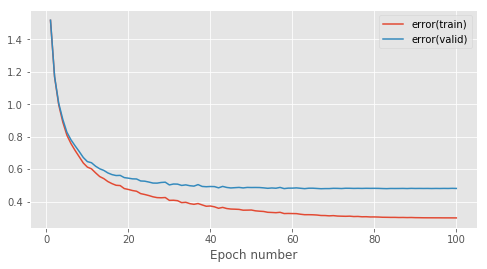

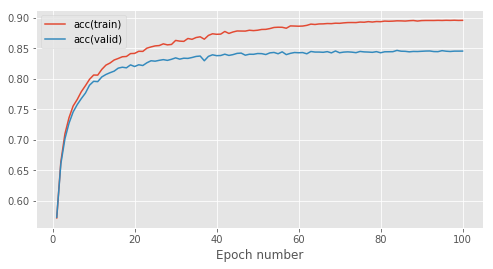

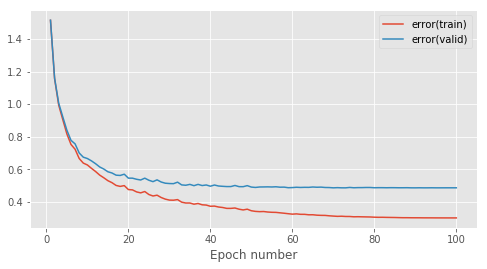

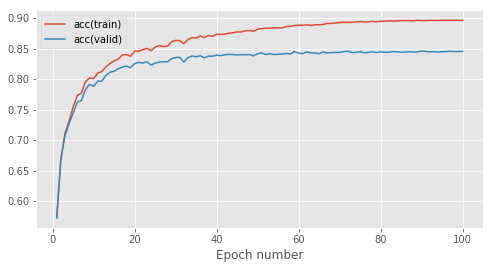

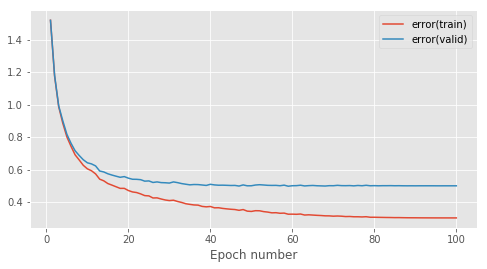

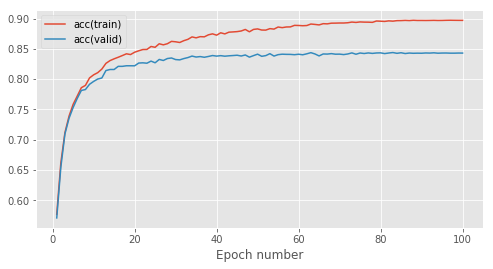

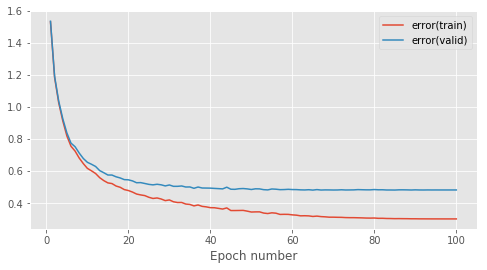

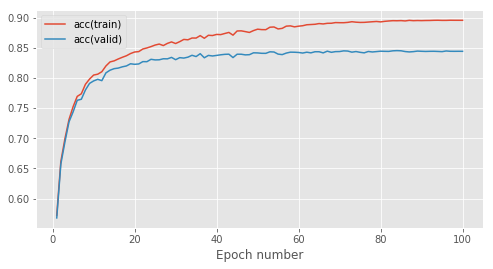

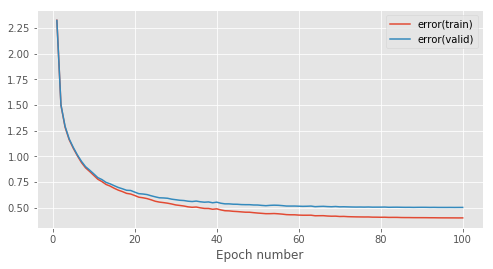

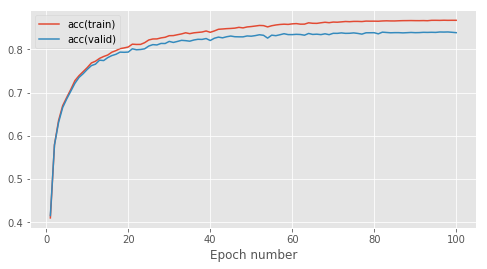

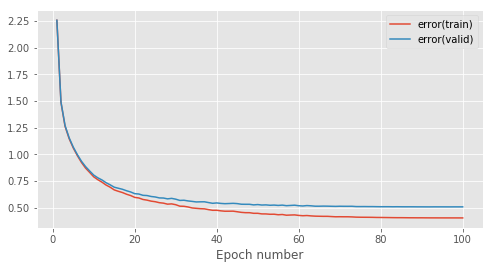

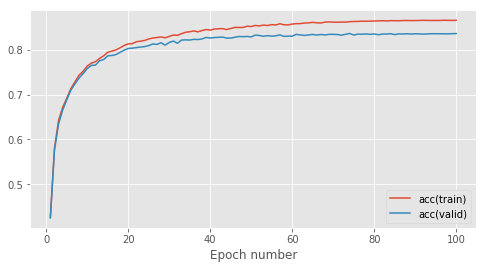

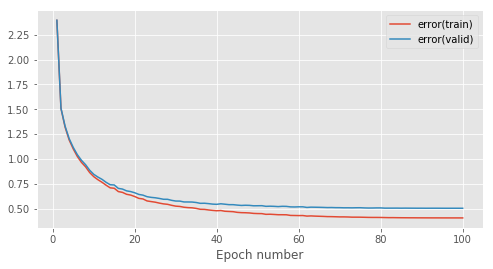

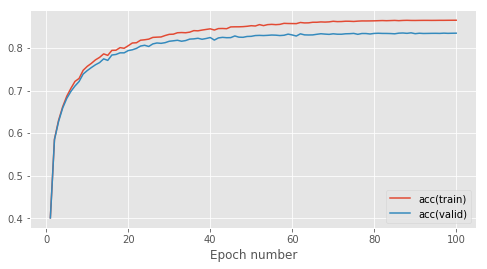

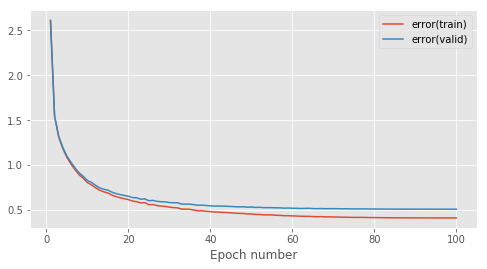

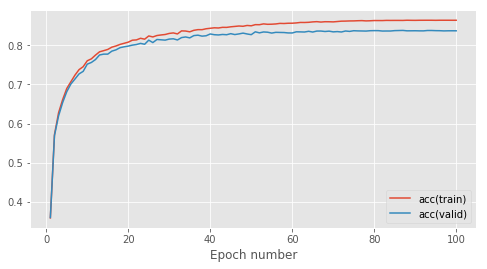

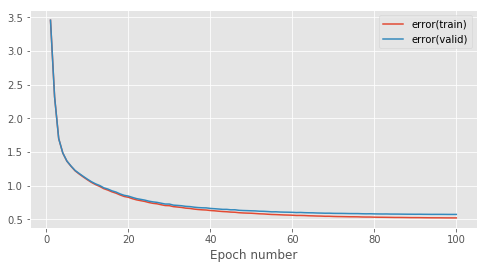

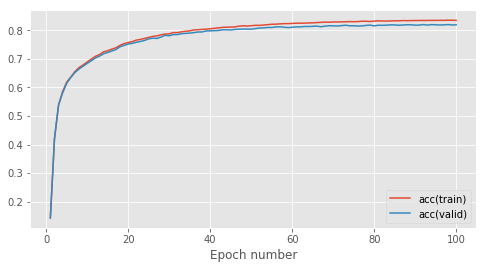

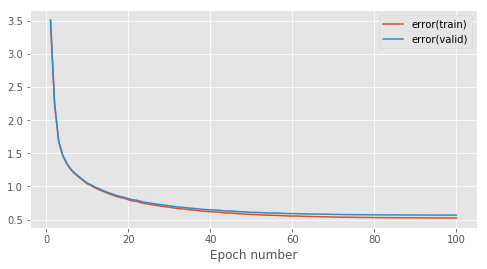

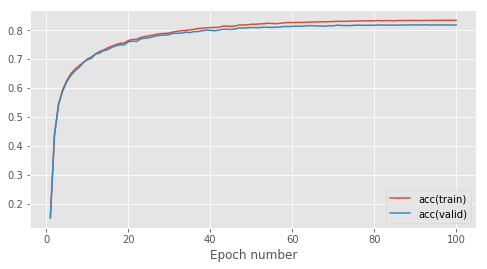

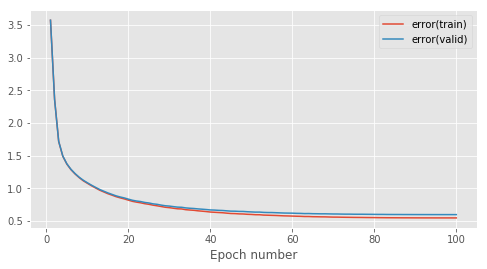

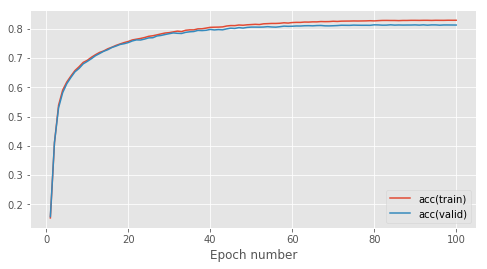

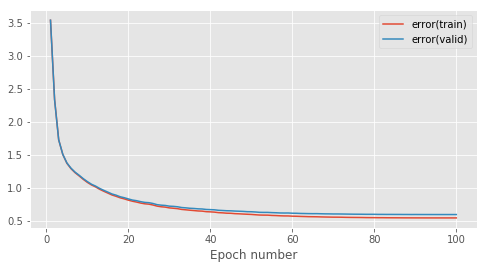

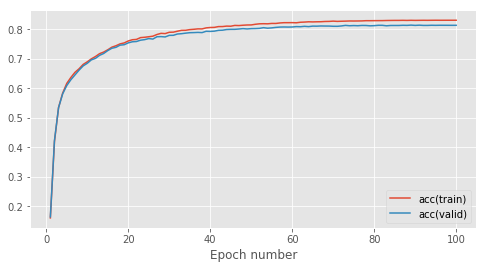

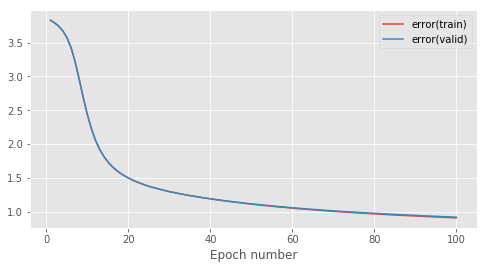

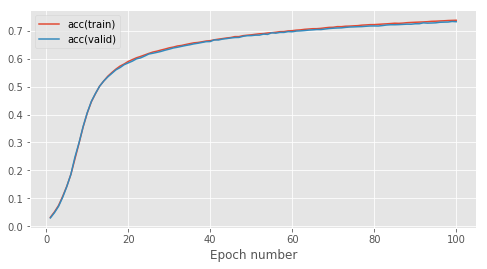

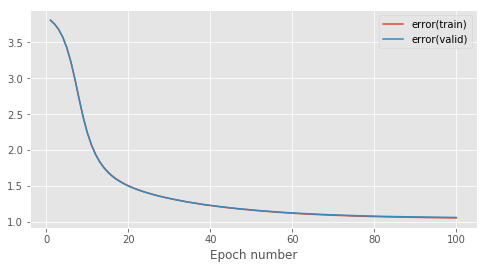

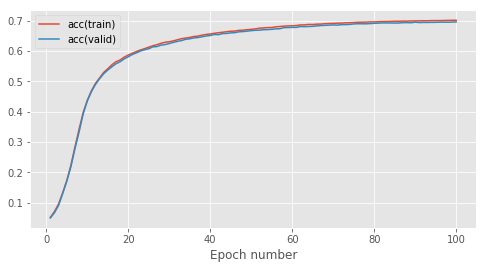

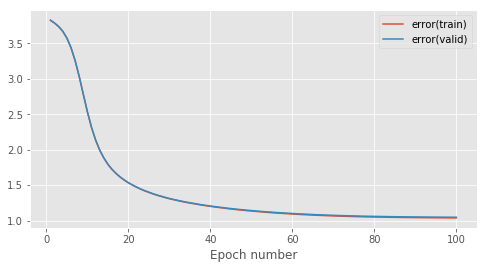

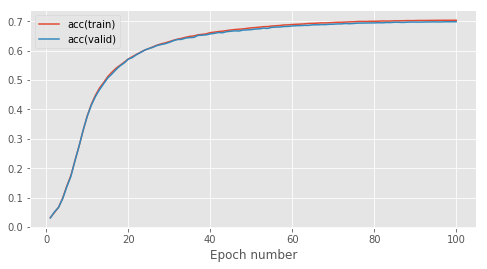

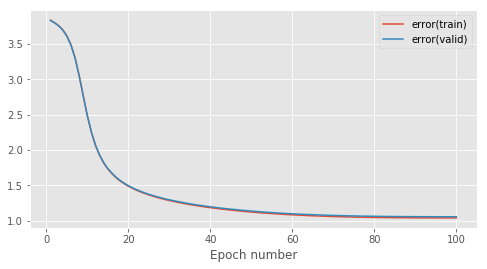

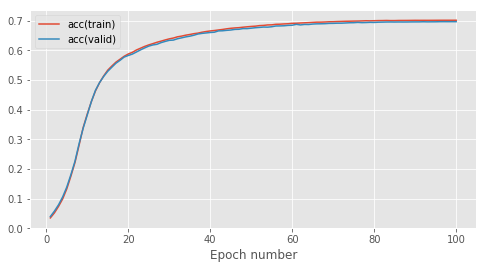

In [10]:
num_epochs = 100
max_learning_rates_1 = [0.02, 0.01, 0.005, 0.001]
min_learning_rates_1 = [0.0005, 0.0001, 0.00005, 0.00001]
sgd_without_restarts_models = OrderedDict()
sgd_without_restarts_stats = OrderedDict()
sgd_without_restarts_lrs = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for max_lr in max_learning_rates_1:
    for min_lr in min_learning_rates_1:
        
        layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
        
        model = MultipleLayerModel(layers)
        learning_rule = GradientDescentLearningRule(0.01)
        scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_lr, 
                                    max_learning_rate=max_lr,
                                    total_iters_per_period=100.,
                                    max_learning_rate_discount_factor=1.0,
                                    period_iteration_expansion_factor=1.0)
        
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
              model, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True)
        
        sgd_without_restarts_models[(max_lr, min_lr)] = model
        sgd_without_restarts_stats[(max_lr, min_lr)] = stats
        sgd_without_restarts_lrs[(max_lr, min_lr)] = optimiser.learning_rate_array
        
        final_train_errors.append(stats[-1, keys['error(train)']])
        final_valid_errors.append(stats[-1, keys['error(valid)']])
        final_train_accs.append(stats[-1, keys['acc(train)']])
        final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [11]:
print('| max lr | min lr | final train error | final train acc | best valid error | best valid acc | ith epoch |')
print('|--------|--------|-------------------|-----------------|------------------|----------------|-----------|')
i = 0
for max_lr in max_learning_rates_1:
    for min_lr in min_learning_rates_1:
        stats = sgd_without_restarts_stats[(max_lr, min_lr)]
        print('| {0:.4f} |{1:.5f} |     {2:.3e}     |     {3:.2f}       |     {4:.3e}    |     {5:.3f}     |     {6:2d}    |'
              .format(max_lr, min_lr,
                     final_train_errors[i], final_train_accs[i] * 100,
                     stats[1:, -2][np.argmax(stats[1:, -1])], np.max(stats[1:, -1]) * 100 , np.argmax(stats[1:, -1])))
        i += 1

| max lr | min lr | final train error | final train acc | best valid error | best valid acc | ith epoch |
|--------|--------|-------------------|-----------------|------------------|----------------|-----------|
| 0.0200 |0.00050 |     2.995e-01     |     89.58       |     4.809e-01    |     84.665     |     83    |
| 0.0200 |0.00010 |     3.013e-01     |     89.61       |     4.860e-01    |     84.589     |     89    |
| 0.0200 |0.00005 |     3.021e-01     |     89.69       |     5.005e-01    |     84.380     |     82    |
| 0.0200 |0.00001 |     3.022e-01     |     89.54       |     4.826e-01    |     84.513     |     83    |
| 0.0100 |0.00050 |     4.019e-01     |     86.73       |     5.035e-01    |     84.038     |     97    |
| 0.0100 |0.00010 |     4.054e-01     |     86.63       |     5.118e-01    |     83.696     |     73    |
| 0.0100 |0.00005 |     4.069e-01     |     86.52       |     5.045e-01    |     83.563     |     88    |
| 0.0100 |0.00001 |     4.109e-01     |     86

In [12]:
print('|    max lr     |   min lr    | final train error | final valid error | final train acc | final valid acc |')
print('|---------------|-------------|-------------------|-------------------|-----------------|-----------------|')
i = 0
for max_lr in max_learning_rates_1:
    for min_lr in min_learning_rates_1:
        print('| {0:.4f}        |   {1:.5f}   |     {2:.3e}     |     {3:.3e}     |      {4:.2f}      |      {5:.2f}      |'
              .format(max_lr, min_lr,
                     final_train_errors[i], final_valid_errors[i],
                     final_train_accs[i] * 100, final_valid_accs[i] * 100))
        i += 1

|    max lr     |   min lr    | final train error | final valid error | final train acc | final valid acc |
|---------------|-------------|-------------------|-------------------|-----------------|-----------------|
| 0.0200        |   0.00050   |     2.995e-01     |     4.811e-01     |      89.58      |      84.55      |
| 0.0200        |   0.00010   |     3.013e-01     |     4.862e-01     |      89.61      |      84.53      |
| 0.0200        |   0.00005   |     3.021e-01     |     4.998e-01     |      89.69      |      84.29      |
| 0.0200        |   0.00001   |     3.022e-01     |     4.829e-01     |      89.54      |      84.40      |
| 0.0100        |   0.00050   |     4.019e-01     |     5.039e-01     |      86.73      |      83.87      |
| 0.0100        |   0.00010   |     4.054e-01     |     5.091e-01     |      86.63      |      83.66      |
| 0.0100        |   0.00005   |     4.069e-01     |     5.040e-01     |      86.52      |      83.48      |
| 0.0100        |   0.00001 

In [45]:
sgd_without_restart_model = sgd_without_restarts_models[(0.02, 0.00001)]
sgd_without_restart_stats = sgd_without_restarts_stats[(0.02, 0.00001)]
sgd_without_restart_lrs = sgd_without_restarts_lrs[(0.02, 0.00001)]
acc = evaluation_acc(test_data, sgd_without_restart)
acc

0.8336075949367089

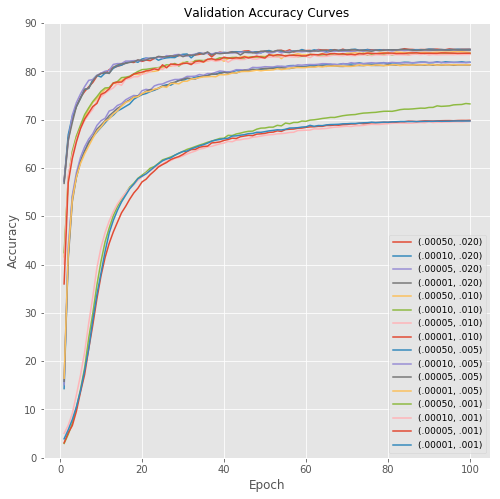

In [13]:
# plot validation acc
plt.figure(figsize=(8,8))

max_rates = ['.020', '.010', '.005', '.001']
min_rates = ['.00050', '.00010', '.00005', '.00001']

labels = []
for max_lr in max_rates:
    for min_lr in min_rates:
        labels.append('(' + min_lr + ', ' + max_lr + ')')
i = 0
for max_lr in max_learning_rates_1:
    for min_lr in min_learning_rates_1:
        stats = sgd_without_restarts_stats[(max_lr, min_lr)]
        plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, -1] * 100, label=labels[i])
        i+=1
plt.ylim((0, 90))
plt.legend(loc=0, fontsize=9)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.title('Validation Accuracy Curves', fontsize=12)
plt.show()

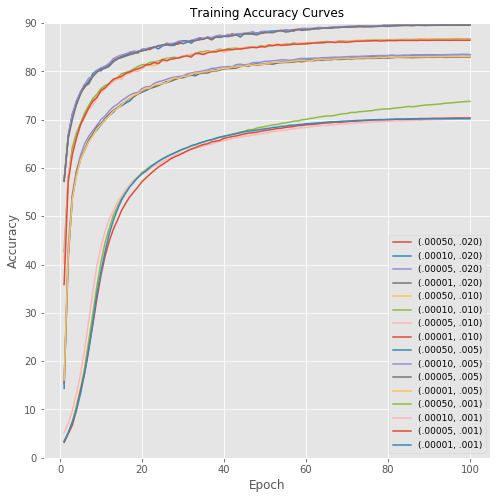

In [14]:
# plot validation acc
plt.figure(figsize=(8,8))

max_rates = ['.020', '.010', '.005', '.001']
min_rates = ['.00050', '.00010', '.00005', '.00001']

labels = []
for max_lr in max_rates:
    for min_lr in min_rates:
        labels.append('(' + min_lr + ', ' + max_lr + ')')
i = 0
for max_lr in max_learning_rates_1:
    for min_lr in min_learning_rates_1:
        stats = sgd_without_restarts_stats[(max_lr, min_lr)]
        plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, 1]  * 100 , label=labels[i])
        i+=1
plt.ylim((0, 90))
plt.legend(loc=0, fontsize=9)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.title('Training Accuracy Curves', fontsize=12)
plt.show()

### hyperparameters for cosine with restarts

In [ ]:
CHONG LAI

Epoch 1: 2.3s to complete
    error(train)=1.53e+00, acc(train)=5.73e-01, error(valid)=1.53e+00, acc(valid)=5.73e-01


Epoch 2: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.64e-01, error(valid)=1.18e+00, acc(valid)=6.62e-01


Epoch 3: 2.2s to complete
    error(train)=1.04e+00, acc(train)=6.95e-01, error(valid)=1.05e+00, acc(valid)=6.92e-01


Epoch 4: 2.3s to complete
    error(train)=9.21e-01, acc(train)=7.23e-01, error(valid)=9.33e-01, acc(valid)=7.19e-01


Epoch 5: 2.3s to complete
    error(train)=8.38e-01, acc(train)=7.48e-01, error(valid)=8.52e-01, acc(valid)=7.43e-01


Epoch 6: 2.2s to complete
    error(train)=7.70e-01, acc(train)=7.69e-01, error(valid)=7.90e-01, acc(valid)=7.62e-01


Epoch 7: 2.1s to complete
    error(train)=7.29e-01, acc(train)=7.77e-01, error(valid)=7.50e-01, acc(valid)=7.69e-01


Epoch 8: 2.6s to complete
    error(train)=6.94e-01, acc(train)=7.87e-01, error(valid)=7.20e-01, acc(valid)=7.78e-01


Epoch 9: 2.4s to complete
    error(train)=6.62e-01, acc(train)=7.94e-01, error(valid)=6.88e-01, acc(valid)=7.85e-01


Epoch 10: 2.4s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=6.74e-01, acc(valid)=7.92e-01


Epoch 11: 2.9s to complete
    error(train)=6.26e-01, acc(train)=8.05e-01, error(valid)=6.60e-01, acc(valid)=7.93e-01


Epoch 12: 2.4s to complete
    error(train)=6.10e-01, acc(train)=8.08e-01, error(valid)=6.44e-01, acc(valid)=7.97e-01


Epoch 13: 2.2s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


Epoch 14: 2.1s to complete
    error(train)=5.80e-01, acc(train)=8.19e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


Epoch 15: 2.1s to complete
    error(train)=5.69e-01, acc(train)=8.21e-01, error(valid)=6.13e-01, acc(valid)=8.06e-01


Epoch 16: 2.1s to complete
    error(train)=5.59e-01, acc(train)=8.24e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


Epoch 17: 2.3s to complete
    error(train)=5.54e-01, acc(train)=8.26e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 18: 2.3s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


Epoch 19: 2.2s to complete
    error(train)=5.45e-01, acc(train)=8.29e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 20: 2.2s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


Epoch 21: 2.2s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


Epoch 22: 2.7s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 23: 2.3s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


Epoch 24: 2.1s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 25: 1.2s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 26: 1.4s to complete
    error(train)=5.54e-01, acc(train)=8.22e-01, error(valid)=6.01e-01, acc(valid)=8.07e-01


Epoch 27: 1.2s to complete
    error(train)=5.31e-01, acc(train)=8.29e-01, error(valid)=5.82e-01, acc(valid)=8.11e-01


Epoch 28: 1.2s to complete
    error(train)=5.19e-01, acc(train)=8.33e-01, error(valid)=5.73e-01, acc(valid)=8.15e-01


Epoch 29: 1.2s to complete
    error(train)=5.13e-01, acc(train)=8.34e-01, error(valid)=5.72e-01, acc(valid)=8.14e-01


Epoch 30: 1.3s to complete
    error(train)=5.01e-01, acc(train)=8.37e-01, error(valid)=5.59e-01, acc(valid)=8.17e-01


Epoch 31: 1.3s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


Epoch 32: 1.3s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 33: 1.3s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 34: 2.2s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


Epoch 35: 2.2s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 36: 2.3s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


Epoch 37: 1.3s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 38: 1.3s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 39: 1.3s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


Epoch 40: 2.1s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


Epoch 41: 2.4s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.24e-01, acc(valid)=8.27e-01


Epoch 42: 2.7s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 43: 2.4s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


Epoch 44: 2.6s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 45: 2.7s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 46: 2.8s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 47: 2.5s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 48: 2.8s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.31e-01


Epoch 49: 2.3s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 50: 2.9s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


Epoch 51: 2.3s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 52: 2.3s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 53: 2.4s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 54: 2.4s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 55: 2.4s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


Epoch 56: 2.3s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 57: 2.3s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


Epoch 58: 2.2s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 59: 2.2s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


Epoch 60: 2.2s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 61: 2.3s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


Epoch 62: 2.4s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


Epoch 63: 2.7s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 64: 2.3s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 65: 2.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


Epoch 66: 2.3s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 67: 2.4s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 68: 2.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 69: 2.4s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 70: 2.2s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 71: 2.4s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 72: 2.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 73: 2.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 74: 2.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 75: 2.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 76: 2.6s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 77: 2.4s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 78: 2.4s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


Epoch 79: 2.3s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 80: 2.3s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 81: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.60e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 82: 2.8s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 83: 2.6s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


Epoch 84: 2.3s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 85: 2.3s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 86: 2.2s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 87: 2.2s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 88: 2.3s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 89: 2.3s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 90: 2.4s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


Epoch 91: 3.0s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 92: 2.3s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.33e-01


Epoch 93: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 94: 2.3s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 95: 2.2s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 96: 2.3s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


Epoch 97: 2.2s to complete
    error(train)=3.54e-01, acc(train)=8.77e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 98: 2.3s to complete
    error(train)=3.53e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 99: 2.3s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 100: 2.3s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 1: 2.1s to complete
    error(train)=1.54e+00, acc(train)=5.74e-01, error(valid)=1.54e+00, acc(valid)=5.72e-01


Epoch 2: 2.3s to complete
    error(train)=1.20e+00, acc(train)=6.59e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


Epoch 3: 2.2s to complete
    error(train)=1.03e+00, acc(train)=7.01e-01, error(valid)=1.04e+00, acc(valid)=6.95e-01


Epoch 4: 2.5s to complete
    error(train)=9.09e-01, acc(train)=7.32e-01, error(valid)=9.21e-01, acc(valid)=7.26e-01


Epoch 5: 2.3s to complete
    error(train)=8.32e-01, acc(train)=7.51e-01, error(valid)=8.47e-01, acc(valid)=7.43e-01


Epoch 6: 2.3s to complete
    error(train)=7.77e-01, acc(train)=7.66e-01, error(valid)=7.95e-01, acc(valid)=7.60e-01


Epoch 7: 2.4s to complete
    error(train)=7.32e-01, acc(train)=7.77e-01, error(valid)=7.55e-01, acc(valid)=7.67e-01


Epoch 8: 2.3s to complete
    error(train)=6.99e-01, acc(train)=7.85e-01, error(valid)=7.26e-01, acc(valid)=7.74e-01


Epoch 9: 2.3s to complete
    error(train)=6.68e-01, acc(train)=7.94e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


Epoch 10: 2.2s to complete
    error(train)=6.55e-01, acc(train)=7.97e-01, error(valid)=6.87e-01, acc(valid)=7.84e-01


Epoch 11: 2.2s to complete
    error(train)=6.32e-01, acc(train)=8.02e-01, error(valid)=6.69e-01, acc(valid)=7.89e-01


Epoch 12: 2.3s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.43e-01, acc(valid)=7.98e-01


Epoch 13: 2.3s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


Epoch 14: 2.3s to complete
    error(train)=5.82e-01, acc(train)=8.17e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


Epoch 15: 2.7s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


Epoch 16: 2.9s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 17: 2.8s to complete
    error(train)=5.52e-01, acc(train)=8.25e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


Epoch 18: 2.5s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


Epoch 19: 2.2s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


Epoch 20: 2.3s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


Epoch 21: 2.2s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


Epoch 22: 2.3s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 23: 2.4s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 24: 2.4s to complete
    error(train)=5.34e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 25: 2.3s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.16e-01


Epoch 26: 2.3s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.07e-01


Epoch 27: 2.7s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.13e-01


Epoch 28: 2.6s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 29: 2.4s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 30: 2.3s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


Epoch 31: 2.4s to complete
    error(train)=4.94e-01, acc(train)=8.41e-01, error(valid)=5.57e-01, acc(valid)=8.19e-01


Epoch 32: 2.3s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


Epoch 33: 2.3s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 34: 2.3s to complete
    error(train)=4.79e-01, acc(train)=8.43e-01, error(valid)=5.47e-01, acc(valid)=8.21e-01


Epoch 35: 2.4s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


Epoch 36: 2.4s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 37: 2.4s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


Epoch 38: 2.4s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 39: 2.2s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


Epoch 40: 2.3s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 41: 2.3s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 42: 2.3s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


Epoch 43: 2.2s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 44: 2.3s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 45: 2.3s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 46: 2.1s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 47: 2.2s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 48: 2.6s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 49: 2.3s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 50: 2.3s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 51: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 52: 3.0s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 53: 2.2s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 54: 2.3s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 55: 2.2s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 56: 2.3s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 57: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 58: 2.3s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 59: 2.4s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 60: 2.3s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 61: 2.3s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 62: 2.6s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 63: 2.3s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 64: 2.5s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 65: 2.6s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 66: 2.6s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 67: 2.3s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 68: 2.3s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 69: 2.3s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 70: 3.5s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 71: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 72: 2.4s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 73: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 74: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 75: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 76: 2.4s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 77: 2.3s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 78: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 79: 2.4s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 80: 2.3s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 81: 2.3s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 82: 2.4s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 83: 2.3s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


Epoch 84: 2.6s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 85: 2.3s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 86: 2.7s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 87: 2.5s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 88: 2.4s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 89: 2.3s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 90: 2.6s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


Epoch 91: 2.3s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 92: 2.3s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 93: 2.4s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 94: 2.3s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 95: 2.2s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 96: 2.1s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 97: 2.1s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 98: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 99: 2.1s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 100: 2.3s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


Epoch 1: 2.1s to complete
    error(train)=1.48e+00, acc(train)=5.77e-01, error(valid)=1.49e+00, acc(valid)=5.75e-01


Epoch 2: 2.2s to complete
    error(train)=1.16e+00, acc(train)=6.69e-01, error(valid)=1.17e+00, acc(valid)=6.64e-01


Epoch 3: 2.1s to complete
    error(train)=9.97e-01, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.05e-01


Epoch 4: 2.2s to complete
    error(train)=8.93e-01, acc(train)=7.37e-01, error(valid)=9.09e-01, acc(valid)=7.30e-01


Epoch 5: 2.2s to complete
    error(train)=8.18e-01, acc(train)=7.55e-01, error(valid)=8.36e-01, acc(valid)=7.47e-01


Epoch 6: 2.2s to complete
    error(train)=7.63e-01, acc(train)=7.67e-01, error(valid)=7.85e-01, acc(valid)=7.63e-01


Epoch 7: 2.1s to complete
    error(train)=7.17e-01, acc(train)=7.80e-01, error(valid)=7.42e-01, acc(valid)=7.75e-01


Epoch 8: 2.0s to complete
    error(train)=6.82e-01, acc(train)=7.89e-01, error(valid)=7.10e-01, acc(valid)=7.79e-01


Epoch 9: 2.1s to complete
    error(train)=6.55e-01, acc(train)=7.97e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


Epoch 10: 2.2s to complete
    error(train)=6.39e-01, acc(train)=8.01e-01, error(valid)=6.71e-01, acc(valid)=7.91e-01


Epoch 11: 2.5s to complete
    error(train)=6.14e-01, acc(train)=8.09e-01, error(valid)=6.47e-01, acc(valid)=7.99e-01


Epoch 12: 2.2s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=6.37e-01, acc(valid)=7.98e-01


Epoch 13: 2.2s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=6.24e-01, acc(valid)=8.06e-01


Epoch 14: 2.4s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


Epoch 15: 3.1s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


Epoch 16: 2.3s to complete
    error(train)=5.59e-01, acc(train)=8.23e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


Epoch 17: 2.1s to complete
    error(train)=5.52e-01, acc(train)=8.25e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


Epoch 18: 2.2s to complete
    error(train)=5.47e-01, acc(train)=8.27e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


Epoch 19: 2.6s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 20: 2.4s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 21: 2.6s to complete
    error(train)=5.36e-01, acc(train)=8.29e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 22: 2.3s to complete
    error(train)=5.33e-01, acc(train)=8.30e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 23: 2.5s to complete
    error(train)=5.33e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


Epoch 24: 2.2s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 25: 2.3s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


Epoch 26: 2.2s to complete
    error(train)=5.47e-01, acc(train)=8.24e-01, error(valid)=5.93e-01, acc(valid)=8.10e-01


Epoch 27: 2.3s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 28: 2.7s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


Epoch 29: 2.2s to complete
    error(train)=5.13e-01, acc(train)=8.34e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


Epoch 30: 2.2s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


Epoch 31: 2.3s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 32: 2.7s to complete
    error(train)=4.91e-01, acc(train)=8.41e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


Epoch 33: 2.2s to complete
    error(train)=4.85e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 34: 2.7s to complete
    error(train)=4.82e-01, acc(train)=8.40e-01, error(valid)=5.48e-01, acc(valid)=8.20e-01


Epoch 35: 2.3s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 36: 2.1s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 37: 2.3s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 38: 2.3s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 39: 2.3s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 40: 2.3s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 41: 2.3s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 42: 2.3s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 43: 2.2s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 44: 2.4s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 45: 2.4s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 46: 2.4s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 47: 2.3s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 48: 2.4s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 49: 2.3s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 50: 2.3s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 51: 2.2s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 52: 2.3s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 53: 2.5s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 54: 2.4s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 55: 2.7s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 56: 2.4s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 57: 2.8s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 58: 2.7s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 59: 2.5s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 60: 2.7s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 61: 2.7s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 62: 2.3s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 63: 2.3s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 64: 2.3s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 65: 2.5s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 66: 2.7s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 67: 2.4s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 68: 2.2s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 69: 2.2s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 70: 2.4s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 71: 2.3s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 72: 2.3s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 73: 2.2s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 74: 2.3s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 75: 2.4s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 76: 2.3s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 77: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 78: 2.2s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


Epoch 79: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 80: 2.3s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 81: 2.3s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 82: 2.3s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 83: 2.4s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 84: 2.4s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 85: 2.3s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 86: 2.3s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 87: 2.7s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 88: 3.1s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


Epoch 89: 2.9s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 90: 2.5s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 91: 2.7s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 92: 2.3s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 93: 2.4s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 94: 2.4s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


Epoch 95: 2.2s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 96: 2.4s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 97: 2.3s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 98: 2.3s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


Epoch 99: 2.3s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 100: 2.3s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 1: 2.2s to complete
    error(train)=1.47e+00, acc(train)=5.91e-01, error(valid)=1.47e+00, acc(valid)=5.86e-01


Epoch 2: 2.2s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.15e+00, acc(valid)=6.70e-01


Epoch 3: 2.3s to complete
    error(train)=9.96e-01, acc(train)=7.06e-01, error(valid)=1.01e+00, acc(valid)=7.02e-01


Epoch 4: 2.3s to complete
    error(train)=8.93e-01, acc(train)=7.37e-01, error(valid)=9.10e-01, acc(valid)=7.32e-01


Epoch 5: 2.3s to complete
    error(train)=8.12e-01, acc(train)=7.58e-01, error(valid)=8.33e-01, acc(valid)=7.51e-01


Epoch 6: 2.3s to complete
    error(train)=7.50e-01, acc(train)=7.73e-01, error(valid)=7.72e-01, acc(valid)=7.67e-01


Epoch 7: 2.4s to complete
    error(train)=7.16e-01, acc(train)=7.80e-01, error(valid)=7.43e-01, acc(valid)=7.72e-01


Epoch 8: 2.4s to complete
    error(train)=6.81e-01, acc(train)=7.89e-01, error(valid)=7.09e-01, acc(valid)=7.77e-01


Epoch 9: 2.3s to complete
    error(train)=6.54e-01, acc(train)=7.98e-01, error(valid)=6.84e-01, acc(valid)=7.87e-01


Epoch 10: 2.3s to complete
    error(train)=6.33e-01, acc(train)=8.02e-01, error(valid)=6.65e-01, acc(valid)=7.92e-01


Epoch 11: 2.8s to complete
    error(train)=6.13e-01, acc(train)=8.09e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


Epoch 12: 2.4s to complete
    error(train)=5.97e-01, acc(train)=8.13e-01, error(valid)=6.36e-01, acc(valid)=7.99e-01


Epoch 13: 2.7s to complete
    error(train)=5.82e-01, acc(train)=8.16e-01, error(valid)=6.24e-01, acc(valid)=8.04e-01


Epoch 14: 2.5s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


Epoch 15: 2.4s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.07e-01


Epoch 16: 2.3s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


Epoch 17: 2.3s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=5.98e-01, acc(valid)=8.08e-01


Epoch 18: 2.5s to complete
    error(train)=5.43e-01, acc(train)=8.28e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 19: 2.4s to complete
    error(train)=5.40e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


Epoch 20: 2.4s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


Epoch 21: 2.3s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


Epoch 22: 2.6s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


Epoch 23: 2.4s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 24: 2.4s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


Epoch 25: 2.6s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 26: 2.7s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


Epoch 27: 2.3s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


Epoch 28: 2.3s to complete
    error(train)=5.20e-01, acc(train)=8.32e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


Epoch 29: 2.4s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.15e-01


Epoch 30: 2.3s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


Epoch 31: 2.3s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 32: 2.4s to complete
    error(train)=4.92e-01, acc(train)=8.42e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 33: 2.2s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 34: 2.3s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


Epoch 35: 2.4s to complete
    error(train)=4.79e-01, acc(train)=8.43e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 36: 2.4s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 37: 2.3s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 38: 2.4s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.39e-01, acc(valid)=8.30e-01


Epoch 39: 2.3s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 40: 2.3s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 41: 2.3s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


Epoch 42: 2.4s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 43: 1.9s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 44: 1.3s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 45: 1.3s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 46: 1.3s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


Epoch 47: 1.3s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 48: 1.3s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


Epoch 49: 1.2s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 50: 1.2s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 51: 1.2s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 52: 1.4s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 53: 1.2s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 54: 1.2s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 55: 1.3s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 56: 1.2s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 57: 1.4s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 58: 1.3s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 59: 1.3s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 60: 1.3s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 61: 1.3s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 62: 1.3s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 63: 1.5s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 64: 1.2s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 65: 1.2s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 66: 1.3s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 67: 1.3s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 68: 1.2s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 69: 1.3s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 70: 1.3s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 71: 1.2s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 72: 1.3s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 73: 1.2s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 74: 1.2s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 75: 1.3s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 76: 1.3s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 77: 1.3s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 78: 1.2s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 79: 1.3s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 80: 1.3s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 81: 1.3s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 82: 1.3s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


Epoch 83: 1.3s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 84: 1.2s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 85: 1.2s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 86: 1.3s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 87: 1.2s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 88: 1.5s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 89: 1.3s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 90: 1.3s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 91: 1.3s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


Epoch 92: 1.3s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 93: 1.2s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


Epoch 94: 1.3s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 95: 1.3s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 96: 1.3s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 97: 1.3s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 98: 1.3s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 99: 1.3s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 100: 1.3s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 1: 1.2s to complete
    error(train)=1.52e+00, acc(train)=5.73e-01, error(valid)=1.53e+00, acc(valid)=5.68e-01


Epoch 2: 1.2s to complete
    error(train)=1.16e+00, acc(train)=6.68e-01, error(valid)=1.16e+00, acc(valid)=6.64e-01


Epoch 3: 1.2s to complete
    error(train)=9.87e-01, acc(train)=7.09e-01, error(valid)=9.99e-01, acc(valid)=7.03e-01


Epoch 4: 1.4s to complete
    error(train)=8.82e-01, acc(train)=7.36e-01, error(valid)=8.94e-01, acc(valid)=7.30e-01


Epoch 5: 1.2s to complete
    error(train)=7.99e-01, acc(train)=7.62e-01, error(valid)=8.11e-01, acc(valid)=7.57e-01


Epoch 6: 1.3s to complete
    error(train)=7.49e-01, acc(train)=7.73e-01, error(valid)=7.71e-01, acc(valid)=7.65e-01


Epoch 7: 1.4s to complete
    error(train)=7.09e-01, acc(train)=7.83e-01, error(valid)=7.32e-01, acc(valid)=7.71e-01


Epoch 8: 1.2s to complete
    error(train)=6.77e-01, acc(train)=7.91e-01, error(valid)=7.04e-01, acc(valid)=7.82e-01


Epoch 9: 1.3s to complete
    error(train)=6.57e-01, acc(train)=7.97e-01, error(valid)=6.86e-01, acc(valid)=7.87e-01


Epoch 10: 1.2s to complete
    error(train)=6.30e-01, acc(train)=8.02e-01, error(valid)=6.62e-01, acc(valid)=7.89e-01


Epoch 11: 1.3s to complete
    error(train)=6.14e-01, acc(train)=8.08e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 12: 1.2s to complete
    error(train)=5.97e-01, acc(train)=8.11e-01, error(valid)=6.33e-01, acc(valid)=7.99e-01


Epoch 13: 1.2s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=6.23e-01, acc(valid)=8.04e-01


Epoch 14: 1.2s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=6.12e-01, acc(valid)=8.06e-01


Epoch 15: 1.3s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=6.04e-01, acc(valid)=8.09e-01


Epoch 16: 1.4s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


Epoch 17: 1.3s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


Epoch 18: 1.2s to complete
    error(train)=5.45e-01, acc(train)=8.27e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


Epoch 19: 1.2s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 20: 1.2s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


Epoch 21: 1.3s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


Epoch 22: 1.2s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 23: 1.2s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


Epoch 24: 1.2s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 25: 1.3s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 26: 1.3s to complete
    error(train)=5.38e-01, acc(train)=8.28e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


Epoch 27: 1.3s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


Epoch 28: 1.4s to complete
    error(train)=5.19e-01, acc(train)=8.32e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


Epoch 29: 1.4s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


Epoch 30: 1.3s to complete
    error(train)=5.12e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.16e-01


Epoch 31: 1.3s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 32: 1.2s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 33: 1.3s to complete
    error(train)=4.94e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


Epoch 34: 1.2s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


Epoch 35: 1.2s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=5.48e-01, acc(valid)=8.22e-01


Epoch 36: 1.3s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


Epoch 37: 1.4s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


Epoch 38: 1.5s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


Epoch 39: 1.2s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


Epoch 40: 1.3s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


Epoch 41: 1.3s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


Epoch 42: 1.2s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


Epoch 43: 1.3s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 44: 1.3s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 45: 1.3s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 46: 1.3s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


Epoch 47: 1.4s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 48: 1.2s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 49: 1.3s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


Epoch 50: 1.5s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


Epoch 51: 1.3s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


Epoch 52: 1.2s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


Epoch 53: 1.3s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 54: 1.2s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 55: 1.2s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 56: 1.3s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 57: 1.3s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 58: 1.4s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 59: 1.4s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 60: 1.5s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 61: 1.3s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 62: 1.2s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 63: 1.3s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 64: 1.3s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 65: 1.3s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 66: 1.3s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 67: 1.3s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 68: 1.4s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 69: 1.6s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 70: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 71: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 72: 1.2s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 73: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 74: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 75: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 76: 1.2s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


Epoch 77: 1.3s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 78: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 79: 1.2s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


Epoch 80: 1.2s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 81: 1.3s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 82: 1.3s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


Epoch 83: 1.4s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 84: 1.3s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 85: 1.3s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 86: 1.3s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 87: 1.3s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 88: 1.3s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 89: 1.3s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 90: 1.2s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=5.15e-01, acc(valid)=8.29e-01


Epoch 91: 1.3s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 92: 1.3s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 93: 1.5s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 94: 1.2s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 95: 1.3s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


Epoch 96: 1.3s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 97: 1.3s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 98: 1.3s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 99: 1.3s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 100: 1.3s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 1: 1.2s to complete
    error(train)=1.52e+00, acc(train)=5.71e-01, error(valid)=1.53e+00, acc(valid)=5.68e-01


Epoch 2: 1.4s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


Epoch 3: 1.5s to complete
    error(train)=1.01e+00, acc(train)=7.03e-01, error(valid)=1.02e+00, acc(valid)=7.00e-01


Epoch 4: 1.4s to complete
    error(train)=9.00e-01, acc(train)=7.32e-01, error(valid)=9.21e-01, acc(valid)=7.25e-01


Epoch 5: 1.2s to complete
    error(train)=8.26e-01, acc(train)=7.48e-01, error(valid)=8.49e-01, acc(valid)=7.42e-01


Epoch 6: 1.4s to complete
    error(train)=7.60e-01, acc(train)=7.69e-01, error(valid)=7.86e-01, acc(valid)=7.64e-01


Epoch 7: 1.4s to complete
    error(train)=7.15e-01, acc(train)=7.80e-01, error(valid)=7.46e-01, acc(valid)=7.74e-01


Epoch 8: 1.2s to complete
    error(train)=6.80e-01, acc(train)=7.91e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


Epoch 9: 1.2s to complete
    error(train)=6.52e-01, acc(train)=7.96e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


Epoch 10: 1.3s to complete
    error(train)=6.32e-01, acc(train)=8.02e-01, error(valid)=6.74e-01, acc(valid)=7.92e-01


Epoch 11: 1.2s to complete
    error(train)=6.12e-01, acc(train)=8.08e-01, error(valid)=6.54e-01, acc(valid)=7.99e-01


Epoch 12: 1.2s to complete
    error(train)=5.96e-01, acc(train)=8.13e-01, error(valid)=6.42e-01, acc(valid)=8.02e-01


Epoch 13: 1.2s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


Epoch 14: 1.2s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=6.16e-01, acc(valid)=8.05e-01


Epoch 15: 1.3s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


Epoch 16: 1.3s to complete
    error(train)=5.53e-01, acc(train)=8.24e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


Epoch 17: 1.3s to complete
    error(train)=5.44e-01, acc(train)=8.27e-01, error(valid)=5.97e-01, acc(valid)=8.11e-01


Epoch 18: 1.4s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


Epoch 19: 1.3s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


Epoch 20: 1.3s to complete
    error(train)=5.33e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 21: 1.3s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 22: 1.4s to complete
    error(train)=5.29e-01, acc(train)=8.31e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 23: 1.2s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.84e-01, acc(valid)=8.17e-01


Epoch 24: 1.3s to complete
    error(train)=5.27e-01, acc(train)=8.32e-01, error(valid)=5.84e-01, acc(valid)=8.18e-01


Epoch 25: 1.3s to complete
    error(train)=5.27e-01, acc(train)=8.32e-01, error(valid)=5.84e-01, acc(valid)=8.18e-01


Epoch 26: 1.2s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


Epoch 27: 1.2s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.14e-01


Epoch 28: 1.3s to complete
    error(train)=5.17e-01, acc(train)=8.33e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 29: 1.3s to complete
    error(train)=5.16e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


Epoch 30: 1.3s to complete
    error(train)=5.11e-01, acc(train)=8.35e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 31: 1.3s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 32: 1.2s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


Epoch 33: 1.4s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 34: 1.3s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 35: 1.2s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 36: 1.3s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 37: 1.3s to complete
    error(train)=4.85e-01, acc(train)=8.43e-01, error(valid)=5.55e-01, acc(valid)=8.26e-01


Epoch 38: 1.5s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.52e-01, acc(valid)=8.27e-01


Epoch 39: 1.3s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


Epoch 40: 1.3s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


Epoch 41: 1.3s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 42: 1.2s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.46e-01, acc(valid)=8.29e-01


Epoch 43: 1.2s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


Epoch 44: 1.2s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


Epoch 45: 1.3s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 46: 1.4s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 47: 1.4s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 48: 1.3s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


Epoch 49: 1.3s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


Epoch 50: 1.3s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 51: 1.2s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 52: 1.5s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 53: 1.3s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 54: 1.3s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 55: 1.5s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 56: 1.4s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


Epoch 57: 1.3s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 58: 1.5s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 59: 1.3s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 60: 1.3s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


Epoch 61: 1.3s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


Epoch 62: 1.3s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 63: 1.4s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 64: 1.3s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 65: 1.2s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 66: 1.5s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 67: 1.3s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 68: 1.3s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 69: 1.3s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


Epoch 70: 1.3s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 71: 1.4s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


Epoch 72: 1.3s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 73: 1.3s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 74: 1.5s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 75: 1.3s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 76: 1.4s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 77: 1.3s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


Epoch 78: 1.3s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 79: 1.2s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


Epoch 80: 1.2s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


Epoch 81: 1.3s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


Epoch 82: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.25e-01, acc(valid)=8.37e-01


Epoch 83: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 84: 1.5s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 85: 1.3s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


Epoch 86: 1.3s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 87: 1.2s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 88: 1.3s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


Epoch 89: 1.2s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


Epoch 90: 1.3s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


Epoch 91: 1.3s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


Epoch 92: 1.3s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


Epoch 93: 1.3s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


Epoch 94: 1.3s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 95: 1.5s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01


Epoch 96: 1.3s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 97: 1.3s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


Epoch 98: 1.3s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 99: 1.3s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


Epoch 100: 1.3s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


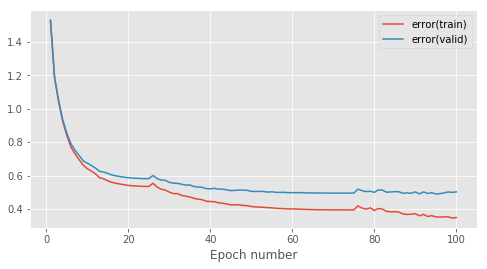

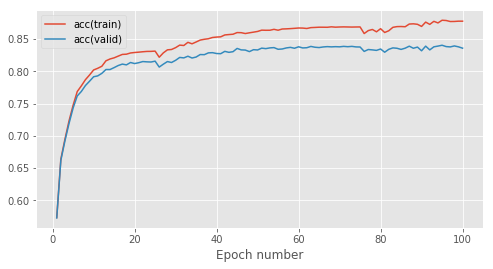

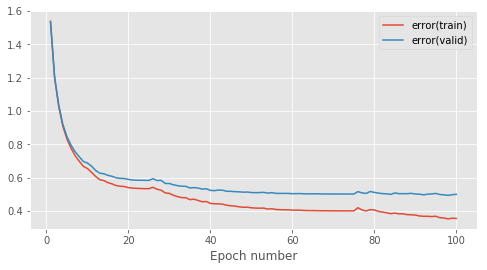

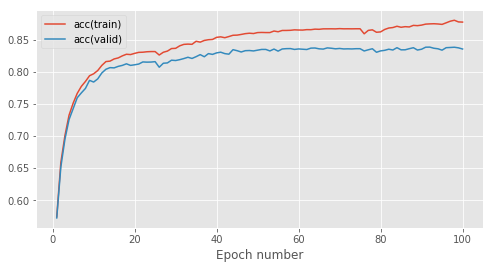

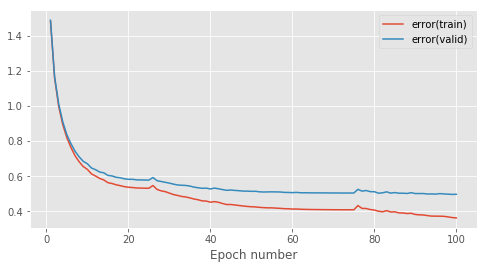

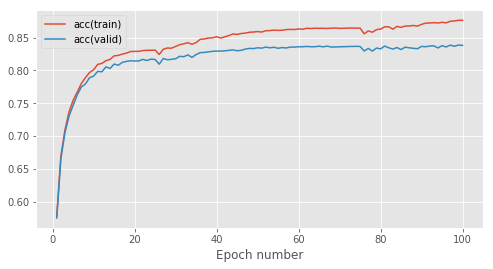

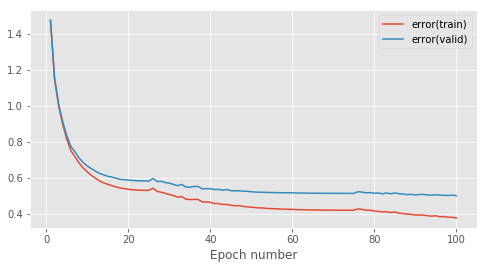

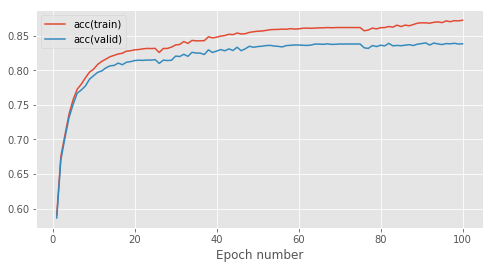

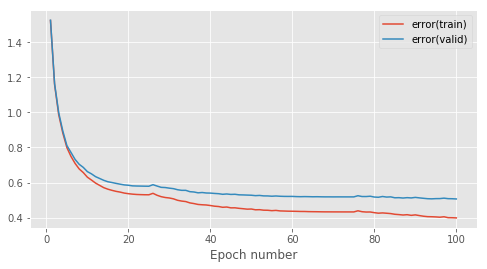

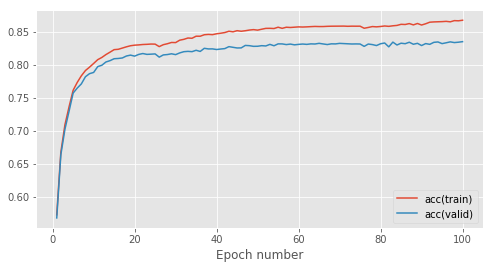

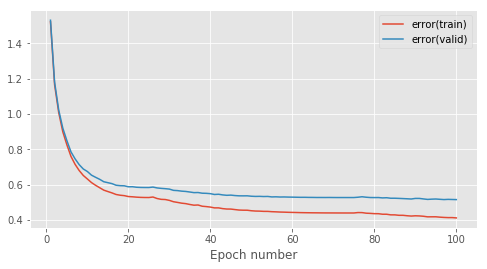

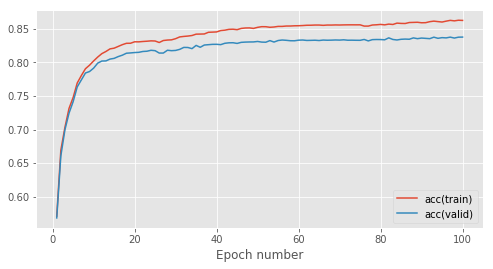

In [33]:
num_epochs = 100
max_learning_rates_2 = [0.02]
min_learning_rates_2 = [0.00001]
discount_factors_2 = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
sgd_with_restarts_models = OrderedDict()
sgd_with_restarts_stats = OrderedDict()
sgd_with_restarts_lrs = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for max_lr in max_learning_rates_2:
    for min_lr in min_learning_rates_2:
        for discount_factor in discount_factors_2:
            layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

            model = MultipleLayerModel(layers)
            learning_rule = GradientDescentLearningRule(0.01)
            scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_lr, 
                                        max_learning_rate=max_lr,
                                        total_iters_per_period=25.,
                                        max_learning_rate_discount_factor=discount_factor,
                                        period_iteration_expansion_factor=3)

            stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
                  model, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True)

            sgd_with_restarts_models[(max_lr, discount_factor)] = model
            sgd_with_restarts_stats[(max_lr, discount_factor)] = stats
            sgd_with_restarts_lrs[(max_lr, discount_factor)] = optimiser.learning_rate_array

            final_train_errors.append(stats[-1, keys['error(train)']])
            final_valid_errors.append(stats[-1, keys['error(valid)']])
            final_train_accs.append(stats[-1, keys['acc(train)']])
            final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [34]:
print('|    max lr     |   min lr    | final train error | final valid error | final train acc | final valid acc |')
print('|---------------|-------------|-------------------|-------------------|-----------------|-----------------|')
i = 0
for max_lr in max_learning_rates_2:
    for min_lr in min_learning_rates_2:
        for d in discount_factors_2:
            stats = sgd_with_restarts_stats[(max_lr, d)]
            print('| {0:.4f}        |   {1:.4f}    |     {2:.3e}     |     {3:.3e}     |      {4:.3f}      |      {5:.3f}      |'
              .format(max_lr, min_lr,
                     final_train_errors[i], final_valid_errors[i],
                     final_train_accs[i], final_valid_accs[i]))
            i += 1

|    max lr     |   min lr    | final train error | final valid error | final train acc | final valid acc |
|---------------|-------------|-------------------|-------------------|-----------------|-----------------|
| 0.0200        |   0.0000    |     3.491e-01     |     5.027e-01     |      0.878      |      0.836      |
| 0.0200        |   0.0000    |     3.547e-01     |     4.998e-01     |      0.878      |      0.836      |
| 0.0200        |   0.0000    |     3.633e-01     |     4.976e-01     |      0.877      |      0.838      |
| 0.0200        |   0.0000    |     3.774e-01     |     5.006e-01     |      0.873      |      0.838      |
| 0.0200        |   0.0000    |     3.981e-01     |     5.062e-01     |      0.868      |      0.835      |
| 0.0200        |   0.0000    |     4.115e-01     |     5.153e-01     |      0.863      |      0.838      |


In [46]:
sgd_with_restart_model = sgd_with_restarts_models[(0.02, 0.8)]
sgd_with_restart_stats = sgd_with_restarts_stats[(0.02, 0.8)]
sgd_with_restart_lrs = sgd_with_restarts_lrs[(0.02, 0.8)]
acc = evaluation_acc(test_data, sgd_with_restart_model)
acc

0.8256962025316456

In [17]:
# plot validation acc
plt.figure(figsize=(8,8))

labels = []
for max_lr in max_learning_rates:
    for min_lr in min_learning_rates:
        labels.append('max_lr={0:.4f}, min_lr={1:.4f}'
                      .format(max_lr, min_lr))
i = 0
for max_lr in max_learning_rates:
    for min_lr in min_learning_rates:
        stats = sgd_with_restarts_stats[(max_lr, min_lr)]
        plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, -1], label=labels[i])
        i+=1
plt.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Validation Accuracy Curves')
plt.show()

NameError: name 'max_learning_rates' is not defined

<Figure size 576x576 with 0 Axes>

## Adam

fixed learning rate

Epoch 1: 1.9s to complete
    error(train)=1.45e+00, acc(train)=6.02e-01, error(valid)=1.45e+00, acc(valid)=5.98e-01


Epoch 2: 1.9s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.20e+00, acc(valid)=6.60e-01


Epoch 3: 2.0s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


Epoch 4: 1.9s to complete
    error(train)=9.80e-01, acc(train)=7.17e-01, error(valid)=9.92e-01, acc(valid)=7.12e-01


Epoch 5: 2.1s to complete
    error(train)=9.11e-01, acc(train)=7.35e-01, error(valid)=9.24e-01, acc(valid)=7.31e-01


Epoch 6: 1.9s to complete
    error(train)=8.50e-01, acc(train)=7.51e-01, error(valid)=8.65e-01, acc(valid)=7.43e-01


Epoch 7: 2.1s to complete
    error(train)=8.04e-01, acc(train)=7.62e-01, error(valid)=8.21e-01, acc(valid)=7.59e-01


Epoch 8: 1.9s to complete
    error(train)=7.67e-01, acc(train)=7.72e-01, error(valid)=7.87e-01, acc(valid)=7.67e-01


Epoch 9: 1.9s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.61e-01, acc(valid)=7.72e-01


Epoch 10: 1.9s to complete
    error(train)=7.06e-01, acc(train)=7.87e-01, error(valid)=7.30e-01, acc(valid)=7.78e-01


Epoch 11: 2.0s to complete
    error(train)=6.81e-01, acc(train)=7.94e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


Epoch 12: 2.0s to complete
    error(train)=6.62e-01, acc(train)=7.98e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


Epoch 13: 2.1s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.77e-01, acc(valid)=7.92e-01


Epoch 14: 1.9s to complete
    error(train)=6.25e-01, acc(train)=8.08e-01, error(valid)=6.60e-01, acc(valid)=7.97e-01


Epoch 15: 1.9s to complete
    error(train)=6.11e-01, acc(train)=8.11e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 16: 1.9s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=6.35e-01, acc(valid)=8.03e-01


Epoch 17: 1.9s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


Epoch 18: 2.1s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


Epoch 19: 1.9s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.09e-01


Epoch 20: 2.1s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 21: 2.0s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


Epoch 22: 2.0s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 23: 1.9s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


Epoch 24: 1.9s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 25: 1.9s to complete
    error(train)=5.18e-01, acc(train)=8.35e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 26: 1.9s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 27: 1.9s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 28: 2.1s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 29: 2.0s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 30: 1.9s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


Epoch 31: 1.9s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 32: 2.0s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 33: 2.0s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


Epoch 34: 2.0s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 35: 2.3s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 36: 2.0s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 37: 1.9s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 38: 1.9s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 39: 2.0s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 40: 1.9s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 41: 2.0s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 42: 1.9s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 43: 1.9s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 44: 2.0s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 45: 1.9s to complete
    error(train)=4.33e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.24e-01


Epoch 46: 1.9s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


Epoch 47: 1.9s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 48: 2.1s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 49: 2.0s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 50: 2.0s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


Epoch 51: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 52: 2.0s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 53: 1.9s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 54: 2.0s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 55: 2.2s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 56: 2.2s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 57: 2.1s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 58: 2.0s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 59: 2.0s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 60: 2.2s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 61: 2.2s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 62: 1.9s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 63: 1.9s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 64: 1.9s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 65: 1.9s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 66: 1.9s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 67: 2.1s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 68: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 69: 1.9s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 70: 2.0s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 71: 1.9s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 72: 2.1s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 73: 3.7s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 74: 4.0s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 75: 4.4s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 76: 4.7s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 77: 4.4s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 78: 4.2s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 79: 3.9s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 80: 3.8s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 81: 3.8s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 82: 3.5s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 83: 3.5s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 84: 3.5s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 85: 3.5s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


Epoch 86: 3.5s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 87: 3.5s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


Epoch 88: 3.4s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 89: 3.4s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 90: 3.4s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


Epoch 91: 3.4s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 92: 3.4s to complete
    error(train)=3.32e-01, acc(train)=8.88e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 93: 3.4s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 94: 3.3s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


Epoch 95: 3.3s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 96: 3.4s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 97: 3.4s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 98: 3.4s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 99: 3.4s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 100: 3.5s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


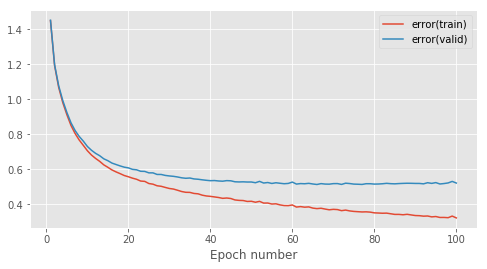

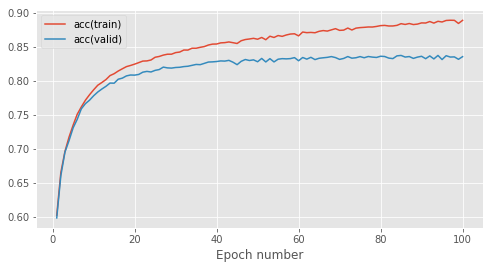

In [18]:
num_epochs = 100
learning_rate = 0.0001

layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

adam_fixed_lr_model = MultipleLayerModel(layers)
learning_rule = AdamLearningRule(learning_rate, 0.5, 0.999)
adam_fixed_lr_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        adam_fixed_lr_model, error, learning_rule, None, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

adam_fixed_lr_lrs = optimiser.learning_rate_array

cosine with not restart

In [ ]:
keneng yao chong lai

Epoch 1: 3.3s to complete
    error(train)=9.50e-01, acc(train)=7.19e-01, error(valid)=9.75e-01, acc(valid)=7.12e-01


Epoch 2: 4.2s to complete
    error(train)=7.27e-01, acc(train)=7.76e-01, error(valid)=7.56e-01, acc(valid)=7.68e-01


Epoch 3: 3.4s to complete
    error(train)=6.44e-01, acc(train)=7.94e-01, error(valid)=6.79e-01, acc(valid)=7.85e-01


Epoch 4: 3.8s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


Epoch 5: 3.8s to complete
    error(train)=5.32e-01, acc(train)=8.27e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


Epoch 6: 4.0s to complete
    error(train)=5.08e-01, acc(train)=8.34e-01, error(valid)=5.78e-01, acc(valid)=8.13e-01


Epoch 7: 4.5s to complete
    error(train)=4.75e-01, acc(train)=8.41e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


Epoch 8: 3.8s to complete
    error(train)=4.61e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


Epoch 9: 3.4s to complete
    error(train)=4.37e-01, acc(train)=8.52e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


Epoch 10: 3.5s to complete
    error(train)=4.23e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.27e-01


Epoch 11: 3.5s to complete
    error(train)=4.01e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


Epoch 12: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 13: 3.6s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 14: 3.6s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 15: 3.6s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 16: 3.4s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


Epoch 17: 3.6s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=4.99e-01, acc(valid)=8.40e-01


Epoch 18: 3.6s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 19: 3.5s to complete
    error(train)=3.32e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 20: 3.5s to complete
    error(train)=3.21e-01, acc(train)=8.84e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 21: 3.6s to complete
    error(train)=3.11e-01, acc(train)=8.88e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 22: 3.5s to complete
    error(train)=3.23e-01, acc(train)=8.80e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 23: 3.3s to complete
    error(train)=2.93e-01, acc(train)=8.94e-01, error(valid)=4.99e-01, acc(valid)=8.45e-01


Epoch 24: 3.5s to complete
    error(train)=2.92e-01, acc(train)=8.93e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 25: 3.6s to complete
    error(train)=2.89e-01, acc(train)=8.94e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 26: 3.5s to complete
    error(train)=2.86e-01, acc(train)=8.96e-01, error(valid)=5.16e-01, acc(valid)=8.39e-01


Epoch 27: 4.1s to complete
    error(train)=2.75e-01, acc(train)=8.98e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 28: 3.6s to complete
    error(train)=2.64e-01, acc(train)=9.03e-01, error(valid)=5.11e-01, acc(valid)=8.43e-01


Epoch 29: 4.2s to complete
    error(train)=2.58e-01, acc(train)=9.05e-01, error(valid)=5.12e-01, acc(valid)=8.44e-01


Epoch 30: 3.5s to complete
    error(train)=2.57e-01, acc(train)=9.06e-01, error(valid)=5.19e-01, acc(valid)=8.44e-01


Epoch 31: 3.6s to complete
    error(train)=2.61e-01, acc(train)=9.03e-01, error(valid)=5.40e-01, acc(valid)=8.37e-01


Epoch 32: 3.6s to complete
    error(train)=2.50e-01, acc(train)=9.07e-01, error(valid)=5.37e-01, acc(valid)=8.38e-01


Epoch 33: 3.8s to complete
    error(train)=2.36e-01, acc(train)=9.13e-01, error(valid)=5.30e-01, acc(valid)=8.40e-01


Epoch 34: 3.8s to complete
    error(train)=2.37e-01, acc(train)=9.13e-01, error(valid)=5.35e-01, acc(valid)=8.38e-01


Epoch 35: 3.9s to complete
    error(train)=2.35e-01, acc(train)=9.12e-01, error(valid)=5.45e-01, acc(valid)=8.38e-01


Epoch 36: 3.5s to complete
    error(train)=2.31e-01, acc(train)=9.14e-01, error(valid)=5.51e-01, acc(valid)=8.39e-01


Epoch 37: 3.6s to complete
    error(train)=2.28e-01, acc(train)=9.14e-01, error(valid)=5.59e-01, acc(valid)=8.39e-01


Epoch 38: 3.5s to complete
    error(train)=2.22e-01, acc(train)=9.17e-01, error(valid)=5.58e-01, acc(valid)=8.38e-01


Epoch 39: 3.4s to complete
    error(train)=2.22e-01, acc(train)=9.17e-01, error(valid)=5.68e-01, acc(valid)=8.37e-01


Epoch 40: 3.5s to complete
    error(train)=2.23e-01, acc(train)=9.15e-01, error(valid)=5.82e-01, acc(valid)=8.34e-01


Epoch 41: 3.5s to complete
    error(train)=2.10e-01, acc(train)=9.20e-01, error(valid)=5.73e-01, acc(valid)=8.39e-01


Epoch 42: 3.5s to complete
    error(train)=2.13e-01, acc(train)=9.18e-01, error(valid)=5.91e-01, acc(valid)=8.33e-01


Epoch 43: 3.6s to complete
    error(train)=2.01e-01, acc(train)=9.23e-01, error(valid)=5.79e-01, acc(valid)=8.39e-01


Epoch 44: 3.5s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.09e-01, acc(valid)=8.34e-01


Epoch 45: 3.6s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.06e-01, acc(valid)=8.31e-01


Epoch 46: 3.5s to complete
    error(train)=2.04e-01, acc(train)=9.21e-01, error(valid)=6.07e-01, acc(valid)=8.34e-01


Epoch 47: 3.5s to complete
    error(train)=1.89e-01, acc(train)=9.27e-01, error(valid)=6.07e-01, acc(valid)=8.37e-01


Epoch 48: 3.5s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=6.09e-01, acc(valid)=8.35e-01


Epoch 49: 3.6s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=6.17e-01, acc(valid)=8.37e-01


Epoch 50: 3.6s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=6.20e-01, acc(valid)=8.33e-01


Epoch 51: 3.6s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=6.34e-01, acc(valid)=8.31e-01


Epoch 52: 3.4s to complete
    error(train)=1.75e-01, acc(train)=9.32e-01, error(valid)=6.36e-01, acc(valid)=8.33e-01


Epoch 53: 3.5s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=6.49e-01, acc(valid)=8.33e-01


Epoch 54: 3.5s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=6.38e-01, acc(valid)=8.38e-01


Epoch 55: 3.5s to complete
    error(train)=1.73e-01, acc(train)=9.33e-01, error(valid)=6.47e-01, acc(valid)=8.33e-01


Epoch 56: 3.4s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=6.55e-01, acc(valid)=8.36e-01


Epoch 57: 3.4s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=6.67e-01, acc(valid)=8.31e-01


Epoch 58: 3.9s to complete
    error(train)=1.66e-01, acc(train)=9.37e-01, error(valid)=6.75e-01, acc(valid)=8.30e-01


Epoch 59: 3.8s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=6.78e-01, acc(valid)=8.31e-01


Epoch 60: 4.1s to complete
    error(train)=1.56e-01, acc(train)=9.41e-01, error(valid)=6.79e-01, acc(valid)=8.31e-01


Epoch 61: 4.0s to complete
    error(train)=1.60e-01, acc(train)=9.39e-01, error(valid)=6.93e-01, acc(valid)=8.30e-01


Epoch 62: 3.4s to complete
    error(train)=1.53e-01, acc(train)=9.42e-01, error(valid)=6.89e-01, acc(valid)=8.32e-01


Epoch 63: 3.5s to complete
    error(train)=1.52e-01, acc(train)=9.43e-01, error(valid)=6.97e-01, acc(valid)=8.31e-01


Epoch 64: 3.5s to complete
    error(train)=1.49e-01, acc(train)=9.44e-01, error(valid)=7.00e-01, acc(valid)=8.32e-01


Epoch 65: 3.5s to complete
    error(train)=1.50e-01, acc(train)=9.43e-01, error(valid)=7.13e-01, acc(valid)=8.29e-01


Epoch 66: 4.9s to complete
    error(train)=1.44e-01, acc(train)=9.47e-01, error(valid)=7.09e-01, acc(valid)=8.30e-01


Epoch 67: 3.5s to complete
    error(train)=1.43e-01, acc(train)=9.46e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01


Epoch 68: 3.6s to complete
    error(train)=1.43e-01, acc(train)=9.46e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


Epoch 69: 3.6s to complete
    error(train)=1.41e-01, acc(train)=9.47e-01, error(valid)=7.29e-01, acc(valid)=8.31e-01


Epoch 70: 3.5s to complete
    error(train)=1.38e-01, acc(train)=9.48e-01, error(valid)=7.31e-01, acc(valid)=8.30e-01


Epoch 71: 3.7s to complete
    error(train)=1.36e-01, acc(train)=9.49e-01, error(valid)=7.35e-01, acc(valid)=8.32e-01


Epoch 72: 3.6s to complete
    error(train)=1.35e-01, acc(train)=9.50e-01, error(valid)=7.40e-01, acc(valid)=8.32e-01


Epoch 73: 3.6s to complete
    error(train)=1.32e-01, acc(train)=9.52e-01, error(valid)=7.42e-01, acc(valid)=8.31e-01


Epoch 74: 3.6s to complete
    error(train)=1.30e-01, acc(train)=9.52e-01, error(valid)=7.47e-01, acc(valid)=8.29e-01


Epoch 75: 3.5s to complete
    error(train)=1.29e-01, acc(train)=9.53e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 76: 3.5s to complete
    error(train)=1.29e-01, acc(train)=9.52e-01, error(valid)=7.55e-01, acc(valid)=8.30e-01


Epoch 77: 3.6s to complete
    error(train)=1.29e-01, acc(train)=9.52e-01, error(valid)=7.58e-01, acc(valid)=8.28e-01


Epoch 78: 4.4s to complete
    error(train)=1.27e-01, acc(train)=9.53e-01, error(valid)=7.65e-01, acc(valid)=8.30e-01


Epoch 79: 3.6s to complete
    error(train)=1.25e-01, acc(train)=9.54e-01, error(valid)=7.66e-01, acc(valid)=8.31e-01


Epoch 80: 3.6s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.75e-01, acc(valid)=8.29e-01


Epoch 81: 3.6s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.76e-01, acc(valid)=8.25e-01


Epoch 82: 3.6s to complete
    error(train)=1.24e-01, acc(train)=9.54e-01, error(valid)=7.82e-01, acc(valid)=8.27e-01


Epoch 83: 4.7s to complete
    error(train)=1.21e-01, acc(train)=9.56e-01, error(valid)=7.84e-01, acc(valid)=8.28e-01


Epoch 84: 4.1s to complete
    error(train)=1.20e-01, acc(train)=9.56e-01, error(valid)=7.83e-01, acc(valid)=8.30e-01


Epoch 85: 4.0s to complete
    error(train)=1.20e-01, acc(train)=9.57e-01, error(valid)=7.95e-01, acc(valid)=8.29e-01


Epoch 86: 3.5s to complete
    error(train)=1.18e-01, acc(train)=9.57e-01, error(valid)=7.95e-01, acc(valid)=8.29e-01


Epoch 87: 3.6s to complete
    error(train)=1.17e-01, acc(train)=9.58e-01, error(valid)=7.96e-01, acc(valid)=8.28e-01


Epoch 88: 3.5s to complete
    error(train)=1.18e-01, acc(train)=9.57e-01, error(valid)=8.03e-01, acc(valid)=8.30e-01


Epoch 89: 3.4s to complete
    error(train)=1.17e-01, acc(train)=9.58e-01, error(valid)=8.04e-01, acc(valid)=8.28e-01


Epoch 90: 3.7s to complete
    error(train)=1.15e-01, acc(train)=9.58e-01, error(valid)=8.04e-01, acc(valid)=8.30e-01


Epoch 91: 4.0s to complete
    error(train)=1.14e-01, acc(train)=9.59e-01, error(valid)=8.08e-01, acc(valid)=8.28e-01


Epoch 92: 3.7s to complete
    error(train)=1.14e-01, acc(train)=9.58e-01, error(valid)=8.12e-01, acc(valid)=8.26e-01


Epoch 93: 3.8s to complete
    error(train)=1.14e-01, acc(train)=9.58e-01, error(valid)=8.12e-01, acc(valid)=8.28e-01


Epoch 94: 3.7s to complete
    error(train)=1.12e-01, acc(train)=9.59e-01, error(valid)=8.17e-01, acc(valid)=8.28e-01


Epoch 95: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.59e-01, error(valid)=8.22e-01, acc(valid)=8.27e-01


Epoch 96: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.59e-01, error(valid)=8.20e-01, acc(valid)=8.28e-01


Epoch 97: 3.5s to complete
    error(train)=1.11e-01, acc(train)=9.60e-01, error(valid)=8.24e-01, acc(valid)=8.27e-01


Epoch 98: 3.6s to complete
    error(train)=1.11e-01, acc(train)=9.60e-01, error(valid)=8.29e-01, acc(valid)=8.28e-01


Epoch 99: 3.5s to complete
    error(train)=1.10e-01, acc(train)=9.60e-01, error(valid)=8.31e-01, acc(valid)=8.26e-01


Epoch 100: 3.6s to complete
    error(train)=1.10e-01, acc(train)=9.60e-01, error(valid)=8.32e-01, acc(valid)=8.27e-01


Epoch 1: 3.5s to complete
    error(train)=9.14e-01, acc(train)=7.29e-01, error(valid)=9.28e-01, acc(valid)=7.24e-01


Epoch 2: 3.7s to complete
    error(train)=7.17e-01, acc(train)=7.79e-01, error(valid)=7.43e-01, acc(valid)=7.72e-01


Epoch 3: 4.1s to complete
    error(train)=6.25e-01, acc(train)=8.04e-01, error(valid)=6.58e-01, acc(valid)=7.94e-01


Epoch 4: 3.7s to complete
    error(train)=5.93e-01, acc(train)=8.10e-01, error(valid)=6.39e-01, acc(valid)=7.96e-01


Epoch 5: 3.7s to complete
    error(train)=5.38e-01, acc(train)=8.25e-01, error(valid)=5.93e-01, acc(valid)=8.10e-01


Epoch 6: 3.7s to complete
    error(train)=4.92e-01, acc(train)=8.38e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 7: 4.0s to complete
    error(train)=4.76e-01, acc(train)=8.41e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


Epoch 8: 3.5s to complete
    error(train)=4.51e-01, acc(train)=8.48e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


Epoch 9: 4.1s to complete
    error(train)=4.30e-01, acc(train)=8.54e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


Epoch 10: 3.7s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 11: 3.5s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 12: 3.4s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


Epoch 13: 3.5s to complete
    error(train)=3.99e-01, acc(train)=8.61e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 14: 3.5s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 15: 3.6s to complete
    error(train)=3.64e-01, acc(train)=8.69e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


Epoch 16: 3.5s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 17: 3.5s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 18: 3.5s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 19: 3.8s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 20: 3.7s to complete
    error(train)=3.30e-01, acc(train)=8.82e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 21: 3.7s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 22: 3.5s to complete
    error(train)=3.17e-01, acc(train)=8.85e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 23: 3.6s to complete
    error(train)=3.04e-01, acc(train)=8.90e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 24: 3.6s to complete
    error(train)=2.93e-01, acc(train)=8.92e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 25: 3.9s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 26: 3.7s to complete
    error(train)=2.85e-01, acc(train)=8.97e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


Epoch 27: 3.5s to complete
    error(train)=2.80e-01, acc(train)=8.97e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01


Epoch 28: 3.5s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 29: 3.4s to complete
    error(train)=2.69e-01, acc(train)=9.01e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 30: 3.5s to complete
    error(train)=2.58e-01, acc(train)=9.05e-01, error(valid)=5.30e-01, acc(valid)=8.38e-01


Epoch 31: 3.7s to complete
    error(train)=2.53e-01, acc(train)=9.07e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


Epoch 32: 3.8s to complete
    error(train)=2.51e-01, acc(train)=9.08e-01, error(valid)=5.36e-01, acc(valid)=8.39e-01


Epoch 33: 4.3s to complete
    error(train)=2.46e-01, acc(train)=9.09e-01, error(valid)=5.40e-01, acc(valid)=8.40e-01


Epoch 34: 3.8s to complete
    error(train)=2.43e-01, acc(train)=9.09e-01, error(valid)=5.47e-01, acc(valid)=8.38e-01


Epoch 35: 3.9s to complete
    error(train)=2.52e-01, acc(train)=9.03e-01, error(valid)=5.65e-01, acc(valid)=8.30e-01


Epoch 36: 3.9s to complete
    error(train)=2.38e-01, acc(train)=9.11e-01, error(valid)=5.57e-01, acc(valid)=8.36e-01


Epoch 37: 3.5s to complete
    error(train)=2.32e-01, acc(train)=9.13e-01, error(valid)=5.71e-01, acc(valid)=8.35e-01


Epoch 38: 3.5s to complete
    error(train)=2.23e-01, acc(train)=9.17e-01, error(valid)=5.60e-01, acc(valid)=8.37e-01


Epoch 39: 3.6s to complete
    error(train)=2.24e-01, acc(train)=9.15e-01, error(valid)=5.74e-01, acc(valid)=8.34e-01


Epoch 40: 3.4s to complete
    error(train)=2.20e-01, acc(train)=9.17e-01, error(valid)=5.76e-01, acc(valid)=8.35e-01


Epoch 41: 3.8s to complete
    error(train)=2.21e-01, acc(train)=9.18e-01, error(valid)=5.94e-01, acc(valid)=8.29e-01


Epoch 42: 3.5s to complete
    error(train)=2.15e-01, acc(train)=9.19e-01, error(valid)=5.92e-01, acc(valid)=8.34e-01


Epoch 43: 3.6s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=6.04e-01, acc(valid)=8.31e-01


Epoch 44: 3.6s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=5.95e-01, acc(valid)=8.35e-01


Epoch 45: 3.7s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=5.97e-01, acc(valid)=8.35e-01


Epoch 46: 3.7s to complete
    error(train)=2.05e-01, acc(train)=9.23e-01, error(valid)=6.13e-01, acc(valid)=8.30e-01


Epoch 47: 3.6s to complete
    error(train)=2.04e-01, acc(train)=9.23e-01, error(valid)=6.27e-01, acc(valid)=8.29e-01


Epoch 48: 3.5s to complete
    error(train)=1.94e-01, acc(train)=9.26e-01, error(valid)=6.24e-01, acc(valid)=8.29e-01


Epoch 49: 3.5s to complete
    error(train)=1.88e-01, acc(train)=9.30e-01, error(valid)=6.19e-01, acc(valid)=8.31e-01


Epoch 50: 3.5s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=6.29e-01, acc(valid)=8.34e-01


Epoch 51: 3.5s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=6.35e-01, acc(valid)=8.33e-01


Epoch 52: 3.4s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=6.45e-01, acc(valid)=8.29e-01


Epoch 53: 3.5s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=6.47e-01, acc(valid)=8.31e-01


Epoch 54: 4.1s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=6.54e-01, acc(valid)=8.31e-01


Epoch 55: 4.0s to complete
    error(train)=1.71e-01, acc(train)=9.36e-01, error(valid)=6.60e-01, acc(valid)=8.33e-01


Epoch 56: 3.8s to complete
    error(train)=1.71e-01, acc(train)=9.36e-01, error(valid)=6.65e-01, acc(valid)=8.31e-01


Epoch 57: 3.5s to complete
    error(train)=1.65e-01, acc(train)=9.38e-01, error(valid)=6.65e-01, acc(valid)=8.31e-01


Epoch 58: 3.5s to complete
    error(train)=1.68e-01, acc(train)=9.37e-01, error(valid)=6.72e-01, acc(valid)=8.29e-01


Epoch 59: 3.4s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=6.79e-01, acc(valid)=8.30e-01


Epoch 60: 3.7s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=6.80e-01, acc(valid)=8.31e-01


Epoch 61: 3.7s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=7.00e-01, acc(valid)=8.31e-01


Epoch 62: 3.7s to complete
    error(train)=1.59e-01, acc(train)=9.41e-01, error(valid)=6.94e-01, acc(valid)=8.27e-01


Epoch 63: 3.7s to complete
    error(train)=1.56e-01, acc(train)=9.42e-01, error(valid)=7.04e-01, acc(valid)=8.24e-01


Epoch 64: 3.7s to complete
    error(train)=1.52e-01, acc(train)=9.43e-01, error(valid)=7.08e-01, acc(valid)=8.29e-01


Epoch 65: 3.5s to complete
    error(train)=1.51e-01, acc(train)=9.43e-01, error(valid)=7.07e-01, acc(valid)=8.28e-01


Epoch 66: 3.6s to complete
    error(train)=1.50e-01, acc(train)=9.44e-01, error(valid)=7.15e-01, acc(valid)=8.28e-01


Epoch 67: 3.7s to complete
    error(train)=1.51e-01, acc(train)=9.42e-01, error(valid)=7.22e-01, acc(valid)=8.28e-01


Epoch 68: 3.4s to complete
    error(train)=1.49e-01, acc(train)=9.45e-01, error(valid)=7.27e-01, acc(valid)=8.28e-01


Epoch 69: 3.4s to complete
    error(train)=1.44e-01, acc(train)=9.47e-01, error(valid)=7.34e-01, acc(valid)=8.26e-01


Epoch 70: 4.2s to complete
    error(train)=1.42e-01, acc(train)=9.47e-01, error(valid)=7.30e-01, acc(valid)=8.28e-01


Epoch 71: 3.5s to complete
    error(train)=1.44e-01, acc(train)=9.46e-01, error(valid)=7.40e-01, acc(valid)=8.26e-01


Epoch 72: 3.6s to complete
    error(train)=1.39e-01, acc(train)=9.48e-01, error(valid)=7.43e-01, acc(valid)=8.26e-01


Epoch 73: 3.5s to complete
    error(train)=1.39e-01, acc(train)=9.49e-01, error(valid)=7.45e-01, acc(valid)=8.26e-01


Epoch 74: 4.0s to complete
    error(train)=1.37e-01, acc(train)=9.50e-01, error(valid)=7.49e-01, acc(valid)=8.27e-01


Epoch 75: 3.9s to complete
    error(train)=1.40e-01, acc(train)=9.48e-01, error(valid)=7.57e-01, acc(valid)=8.23e-01


Epoch 76: 3.6s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=7.57e-01, acc(valid)=8.27e-01


Epoch 77: 3.4s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=7.57e-01, acc(valid)=8.26e-01


Epoch 78: 3.4s to complete
    error(train)=1.33e-01, acc(train)=9.51e-01, error(valid)=7.61e-01, acc(valid)=8.26e-01


Epoch 79: 4.2s to complete
    error(train)=1.33e-01, acc(train)=9.51e-01, error(valid)=7.65e-01, acc(valid)=8.26e-01


Epoch 80: 5.4s to complete
    error(train)=1.32e-01, acc(train)=9.51e-01, error(valid)=7.70e-01, acc(valid)=8.25e-01


Epoch 81: 3.9s to complete
    error(train)=1.30e-01, acc(train)=9.53e-01, error(valid)=7.73e-01, acc(valid)=8.26e-01


Epoch 82: 3.6s to complete
    error(train)=1.30e-01, acc(train)=9.52e-01, error(valid)=7.75e-01, acc(valid)=8.26e-01


Epoch 83: 3.6s to complete
    error(train)=1.29e-01, acc(train)=9.53e-01, error(valid)=7.74e-01, acc(valid)=8.26e-01


Epoch 84: 3.5s to complete
    error(train)=1.28e-01, acc(train)=9.53e-01, error(valid)=7.80e-01, acc(valid)=8.26e-01


Epoch 85: 3.5s to complete
    error(train)=1.27e-01, acc(train)=9.54e-01, error(valid)=7.79e-01, acc(valid)=8.26e-01


Epoch 86: 3.7s to complete
    error(train)=1.27e-01, acc(train)=9.53e-01, error(valid)=7.83e-01, acc(valid)=8.26e-01


Epoch 87: 3.5s to complete
    error(train)=1.27e-01, acc(train)=9.54e-01, error(valid)=7.83e-01, acc(valid)=8.27e-01


Epoch 88: 3.6s to complete
    error(train)=1.26e-01, acc(train)=9.55e-01, error(valid)=7.84e-01, acc(valid)=8.26e-01


Epoch 89: 3.6s to complete
    error(train)=1.26e-01, acc(train)=9.54e-01, error(valid)=7.87e-01, acc(valid)=8.26e-01


Epoch 90: 3.4s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.86e-01, acc(valid)=8.24e-01


Epoch 91: 3.5s to complete
    error(train)=1.25e-01, acc(train)=9.54e-01, error(valid)=7.89e-01, acc(valid)=8.24e-01


Epoch 92: 3.6s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.90e-01, acc(valid)=8.26e-01


Epoch 93: 3.6s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.91e-01, acc(valid)=8.25e-01


Epoch 94: 4.3s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.93e-01, acc(valid)=8.25e-01


Epoch 95: 3.8s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.92e-01, acc(valid)=8.26e-01


Epoch 96: 3.9s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.94e-01, acc(valid)=8.25e-01


Epoch 97: 3.6s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.94e-01, acc(valid)=8.26e-01


Epoch 98: 3.6s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.94e-01, acc(valid)=8.26e-01


Epoch 99: 3.7s to complete
    error(train)=1.23e-01, acc(train)=9.55e-01, error(valid)=7.96e-01, acc(valid)=8.26e-01


Epoch 100: 3.6s to complete
    error(train)=1.23e-01, acc(train)=9.55e-01, error(valid)=7.96e-01, acc(valid)=8.25e-01


Epoch 1: 3.3s to complete
    error(train)=9.15e-01, acc(train)=7.32e-01, error(valid)=9.27e-01, acc(valid)=7.25e-01


Epoch 2: 3.4s to complete
    error(train)=7.40e-01, acc(train)=7.76e-01, error(valid)=7.66e-01, acc(valid)=7.67e-01


Epoch 3: 4.0s to complete
    error(train)=6.44e-01, acc(train)=7.94e-01, error(valid)=6.80e-01, acc(valid)=7.85e-01


Epoch 4: 3.5s to complete
    error(train)=5.83e-01, acc(train)=8.15e-01, error(valid)=6.30e-01, acc(valid)=8.03e-01


Epoch 5: 3.4s to complete
    error(train)=5.33e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 6: 3.9s to complete
    error(train)=5.03e-01, acc(train)=8.33e-01, error(valid)=5.67e-01, acc(valid)=8.16e-01


Epoch 7: 3.8s to complete
    error(train)=4.81e-01, acc(train)=8.41e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


Epoch 8: 3.5s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 9: 3.6s to complete
    error(train)=4.35e-01, acc(train)=8.54e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 10: 3.7s to complete
    error(train)=4.34e-01, acc(train)=8.53e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 11: 3.5s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 12: 3.5s to complete
    error(train)=3.97e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.26e-01


Epoch 13: 3.4s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 14: 3.5s to complete
    error(train)=3.73e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 15: 3.5s to complete
    error(train)=3.59e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 16: 3.6s to complete
    error(train)=3.48e-01, acc(train)=8.78e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 17: 3.6s to complete
    error(train)=3.44e-01, acc(train)=8.78e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 18: 4.7s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 19: 3.7s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 20: 3.4s to complete
    error(train)=3.24e-01, acc(train)=8.82e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 21: 3.5s to complete
    error(train)=3.13e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 22: 4.0s to complete
    error(train)=3.08e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 23: 4.5s to complete
    error(train)=3.03e-01, acc(train)=8.90e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


Epoch 24: 3.5s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


Epoch 25: 3.4s to complete
    error(train)=2.89e-01, acc(train)=8.95e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


Epoch 26: 3.5s to complete
    error(train)=2.82e-01, acc(train)=8.97e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 27: 3.9s to complete
    error(train)=2.75e-01, acc(train)=8.99e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 28: 3.9s to complete
    error(train)=2.71e-01, acc(train)=9.01e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


Epoch 29: 3.8s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=5.43e-01, acc(valid)=8.37e-01


Epoch 30: 3.5s to complete
    error(train)=2.50e-01, acc(train)=9.08e-01, error(valid)=5.22e-01, acc(valid)=8.41e-01


Epoch 31: 3.6s to complete
    error(train)=2.64e-01, acc(train)=9.02e-01, error(valid)=5.46e-01, acc(valid)=8.37e-01


Epoch 32: 3.4s to complete
    error(train)=2.51e-01, acc(train)=9.07e-01, error(valid)=5.45e-01, acc(valid)=8.37e-01


Epoch 33: 3.5s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.48e-01, acc(valid)=8.36e-01


Epoch 34: 3.5s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=5.41e-01, acc(valid)=8.40e-01


Epoch 35: 3.6s to complete
    error(train)=2.38e-01, acc(train)=9.12e-01, error(valid)=5.49e-01, acc(valid)=8.37e-01


Epoch 36: 3.6s to complete
    error(train)=2.37e-01, acc(train)=9.11e-01, error(valid)=5.63e-01, acc(valid)=8.34e-01


Epoch 37: 3.5s to complete
    error(train)=2.28e-01, acc(train)=9.15e-01, error(valid)=5.59e-01, acc(valid)=8.39e-01


Epoch 38: 3.5s to complete
    error(train)=2.32e-01, acc(train)=9.12e-01, error(valid)=5.70e-01, acc(valid)=8.33e-01


Epoch 39: 3.6s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=5.65e-01, acc(valid)=8.37e-01


Epoch 40: 3.5s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=5.72e-01, acc(valid)=8.38e-01


Epoch 41: 3.5s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=5.77e-01, acc(valid)=8.39e-01


Epoch 42: 3.7s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=5.79e-01, acc(valid)=8.38e-01


Epoch 43: 3.6s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=5.90e-01, acc(valid)=8.34e-01


Epoch 44: 3.7s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=5.90e-01, acc(valid)=8.39e-01


Epoch 45: 3.9s to complete
    error(train)=2.00e-01, acc(train)=9.24e-01, error(valid)=5.95e-01, acc(valid)=8.34e-01


Epoch 46: 3.7s to complete
    error(train)=1.94e-01, acc(train)=9.26e-01, error(valid)=6.01e-01, acc(valid)=8.37e-01


Epoch 47: 3.7s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=6.04e-01, acc(valid)=8.37e-01


Epoch 48: 3.7s to complete
    error(train)=1.90e-01, acc(train)=9.27e-01, error(valid)=6.13e-01, acc(valid)=8.32e-01


Epoch 49: 3.8s to complete
    error(train)=1.89e-01, acc(train)=9.27e-01, error(valid)=6.19e-01, acc(valid)=8.34e-01


Epoch 50: 4.6s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=6.28e-01, acc(valid)=8.32e-01


Epoch 51: 4.2s to complete
    error(train)=1.79e-01, acc(train)=9.33e-01, error(valid)=6.21e-01, acc(valid)=8.35e-01


Epoch 52: 3.9s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=6.37e-01, acc(valid)=8.35e-01


Epoch 53: 3.7s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=6.40e-01, acc(valid)=8.33e-01


Epoch 54: 3.8s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=6.47e-01, acc(valid)=8.35e-01


Epoch 55: 3.4s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=6.50e-01, acc(valid)=8.33e-01


Epoch 56: 3.5s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=6.49e-01, acc(valid)=8.32e-01


Epoch 57: 3.5s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=6.62e-01, acc(valid)=8.33e-01


Epoch 58: 4.4s to complete
    error(train)=1.69e-01, acc(train)=9.37e-01, error(valid)=6.74e-01, acc(valid)=8.31e-01


Epoch 59: 3.6s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=6.72e-01, acc(valid)=8.33e-01


Epoch 60: 3.7s to complete
    error(train)=1.58e-01, acc(train)=9.41e-01, error(valid)=6.72e-01, acc(valid)=8.31e-01


Epoch 61: 3.5s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=6.81e-01, acc(valid)=8.31e-01


Epoch 62: 3.7s to complete
    error(train)=1.56e-01, acc(train)=9.41e-01, error(valid)=6.87e-01, acc(valid)=8.32e-01


Epoch 63: 3.7s to complete
    error(train)=1.52e-01, acc(train)=9.45e-01, error(valid)=6.85e-01, acc(valid)=8.31e-01


Epoch 64: 3.4s to complete
    error(train)=1.51e-01, acc(train)=9.44e-01, error(valid)=6.99e-01, acc(valid)=8.28e-01


Epoch 65: 3.5s to complete
    error(train)=1.48e-01, acc(train)=9.45e-01, error(valid)=6.99e-01, acc(valid)=8.30e-01


Epoch 66: 3.4s to complete
    error(train)=1.48e-01, acc(train)=9.45e-01, error(valid)=7.08e-01, acc(valid)=8.31e-01


Epoch 67: 3.5s to complete
    error(train)=1.45e-01, acc(train)=9.46e-01, error(valid)=7.09e-01, acc(valid)=8.30e-01


Epoch 68: 3.5s to complete
    error(train)=1.42e-01, acc(train)=9.47e-01, error(valid)=7.14e-01, acc(valid)=8.31e-01


Epoch 69: 3.8s to complete
    error(train)=1.43e-01, acc(train)=9.46e-01, error(valid)=7.19e-01, acc(valid)=8.30e-01


Epoch 70: 4.2s to complete
    error(train)=1.43e-01, acc(train)=9.47e-01, error(valid)=7.24e-01, acc(valid)=8.30e-01


Epoch 71: 4.1s to complete
    error(train)=1.40e-01, acc(train)=9.48e-01, error(valid)=7.25e-01, acc(valid)=8.32e-01


Epoch 72: 4.1s to complete
    error(train)=1.40e-01, acc(train)=9.48e-01, error(valid)=7.33e-01, acc(valid)=8.30e-01


Epoch 73: 4.1s to complete
    error(train)=1.36e-01, acc(train)=9.50e-01, error(valid)=7.36e-01, acc(valid)=8.28e-01


Epoch 74: 4.9s to complete
    error(train)=1.35e-01, acc(train)=9.51e-01, error(valid)=7.40e-01, acc(valid)=8.29e-01


Epoch 75: 4.2s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=7.43e-01, acc(valid)=8.29e-01


Epoch 76: 4.0s to complete
    error(train)=1.33e-01, acc(train)=9.51e-01, error(valid)=7.44e-01, acc(valid)=8.30e-01


Epoch 77: 3.6s to complete
    error(train)=1.32e-01, acc(train)=9.52e-01, error(valid)=7.49e-01, acc(valid)=8.29e-01


Epoch 78: 3.7s to complete
    error(train)=1.30e-01, acc(train)=9.53e-01, error(valid)=7.49e-01, acc(valid)=8.30e-01


Epoch 79: 3.8s to complete
    error(train)=1.30e-01, acc(train)=9.53e-01, error(valid)=7.52e-01, acc(valid)=8.30e-01


Epoch 80: 3.8s to complete
    error(train)=1.29e-01, acc(train)=9.53e-01, error(valid)=7.55e-01, acc(valid)=8.32e-01


Epoch 81: 3.9s to complete
    error(train)=1.28e-01, acc(train)=9.53e-01, error(valid)=7.60e-01, acc(valid)=8.31e-01


Epoch 82: 3.8s to complete
    error(train)=1.28e-01, acc(train)=9.53e-01, error(valid)=7.62e-01, acc(valid)=8.30e-01


Epoch 83: 3.6s to complete
    error(train)=1.27e-01, acc(train)=9.54e-01, error(valid)=7.62e-01, acc(valid)=8.30e-01


Epoch 84: 3.7s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.65e-01, acc(valid)=8.29e-01


Epoch 85: 3.6s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.68e-01, acc(valid)=8.30e-01


Epoch 86: 3.6s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.66e-01, acc(valid)=8.30e-01


Epoch 87: 3.6s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.68e-01, acc(valid)=8.29e-01


Epoch 88: 3.5s to complete
    error(train)=1.24e-01, acc(train)=9.56e-01, error(valid)=7.71e-01, acc(valid)=8.30e-01


Epoch 89: 3.8s to complete
    error(train)=1.24e-01, acc(train)=9.55e-01, error(valid)=7.72e-01, acc(valid)=8.31e-01


Epoch 90: 3.8s to complete
    error(train)=1.24e-01, acc(train)=9.56e-01, error(valid)=7.73e-01, acc(valid)=8.28e-01


Epoch 91: 3.7s to complete
    error(train)=1.23e-01, acc(train)=9.55e-01, error(valid)=7.74e-01, acc(valid)=8.30e-01


Epoch 92: 3.8s to complete
    error(train)=1.23e-01, acc(train)=9.56e-01, error(valid)=7.75e-01, acc(valid)=8.30e-01


Epoch 93: 3.9s to complete
    error(train)=1.23e-01, acc(train)=9.56e-01, error(valid)=7.74e-01, acc(valid)=8.30e-01


Epoch 94: 5.4s to complete
    error(train)=1.23e-01, acc(train)=9.56e-01, error(valid)=7.75e-01, acc(valid)=8.29e-01


Epoch 95: 3.8s to complete
    error(train)=1.22e-01, acc(train)=9.56e-01, error(valid)=7.76e-01, acc(valid)=8.30e-01


Epoch 96: 3.8s to complete
    error(train)=1.22e-01, acc(train)=9.56e-01, error(valid)=7.77e-01, acc(valid)=8.30e-01


Epoch 97: 4.0s to complete
    error(train)=1.22e-01, acc(train)=9.56e-01, error(valid)=7.77e-01, acc(valid)=8.30e-01


Epoch 98: 4.2s to complete
    error(train)=1.22e-01, acc(train)=9.56e-01, error(valid)=7.77e-01, acc(valid)=8.30e-01


Epoch 99: 3.9s to complete
    error(train)=1.22e-01, acc(train)=9.56e-01, error(valid)=7.77e-01, acc(valid)=8.30e-01


Epoch 100: 3.7s to complete
    error(train)=1.22e-01, acc(train)=9.56e-01, error(valid)=7.78e-01, acc(valid)=8.30e-01


Epoch 1: 3.7s to complete
    error(train)=9.41e-01, acc(train)=7.24e-01, error(valid)=9.57e-01, acc(valid)=7.19e-01


Epoch 2: 3.7s to complete
    error(train)=7.26e-01, acc(train)=7.78e-01, error(valid)=7.55e-01, acc(valid)=7.71e-01


Epoch 3: 3.7s to complete
    error(train)=6.35e-01, acc(train)=8.02e-01, error(valid)=6.69e-01, acc(valid)=7.91e-01


Epoch 4: 3.9s to complete
    error(train)=5.76e-01, acc(train)=8.15e-01, error(valid)=6.18e-01, acc(valid)=8.02e-01


Epoch 5: 3.8s to complete
    error(train)=5.27e-01, acc(train)=8.28e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


Epoch 6: 3.8s to complete
    error(train)=5.11e-01, acc(train)=8.28e-01, error(valid)=5.76e-01, acc(valid)=8.11e-01


Epoch 7: 3.7s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=5.62e-01, acc(valid)=8.12e-01


Epoch 8: 3.8s to complete
    error(train)=4.61e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 9: 3.9s to complete
    error(train)=4.41e-01, acc(train)=8.49e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


Epoch 10: 3.9s to complete
    error(train)=4.24e-01, acc(train)=8.54e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 11: 3.8s to complete
    error(train)=4.10e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


Epoch 12: 3.7s to complete
    error(train)=3.95e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 13: 3.9s to complete
    error(train)=3.90e-01, acc(train)=8.63e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 14: 4.0s to complete
    error(train)=3.76e-01, acc(train)=8.66e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 15: 3.8s to complete
    error(train)=3.53e-01, acc(train)=8.77e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


Epoch 16: 3.9s to complete
    error(train)=3.49e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 17: 4.5s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 18: 3.8s to complete
    error(train)=3.35e-01, acc(train)=8.81e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 19: 3.9s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


Epoch 20: 3.8s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 21: 4.2s to complete
    error(train)=3.07e-01, acc(train)=8.89e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


Epoch 22: 4.0s to complete
    error(train)=3.10e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 23: 3.8s to complete
    error(train)=3.03e-01, acc(train)=8.90e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


Epoch 24: 3.8s to complete
    error(train)=2.91e-01, acc(train)=8.93e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


Epoch 25: 3.9s to complete
    error(train)=2.85e-01, acc(train)=8.95e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 26: 3.7s to complete
    error(train)=2.85e-01, acc(train)=8.95e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 27: 4.3s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


Epoch 28: 4.3s to complete
    error(train)=2.72e-01, acc(train)=8.99e-01, error(valid)=5.29e-01, acc(valid)=8.36e-01


Epoch 29: 3.8s to complete
    error(train)=2.75e-01, acc(train)=8.98e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


Epoch 30: 4.8s to complete
    error(train)=2.66e-01, acc(train)=9.02e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


Epoch 31: 3.9s to complete
    error(train)=2.51e-01, acc(train)=9.08e-01, error(valid)=5.32e-01, acc(valid)=8.42e-01


Epoch 32: 3.9s to complete
    error(train)=2.49e-01, acc(train)=9.08e-01, error(valid)=5.33e-01, acc(valid)=8.39e-01


Epoch 33: 4.0s to complete
    error(train)=2.48e-01, acc(train)=9.07e-01, error(valid)=5.46e-01, acc(valid)=8.40e-01


Epoch 34: 3.9s to complete
    error(train)=2.43e-01, acc(train)=9.09e-01, error(valid)=5.45e-01, acc(valid)=8.37e-01


Epoch 35: 3.9s to complete
    error(train)=2.36e-01, acc(train)=9.12e-01, error(valid)=5.44e-01, acc(valid)=8.41e-01


Epoch 36: 4.0s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=5.57e-01, acc(valid)=8.37e-01


Epoch 37: 3.7s to complete
    error(train)=2.30e-01, acc(train)=9.13e-01, error(valid)=5.56e-01, acc(valid)=8.35e-01


Epoch 38: 4.0s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=5.48e-01, acc(valid)=8.39e-01


Epoch 39: 4.2s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=5.67e-01, acc(valid)=8.36e-01


Epoch 40: 4.0s to complete
    error(train)=2.23e-01, acc(train)=9.16e-01, error(valid)=5.76e-01, acc(valid)=8.37e-01


Epoch 41: 4.8s to complete
    error(train)=2.16e-01, acc(train)=9.19e-01, error(valid)=5.71e-01, acc(valid)=8.34e-01


Epoch 42: 5.0s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=5.72e-01, acc(valid)=8.40e-01


Epoch 43: 4.7s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=5.92e-01, acc(valid)=8.33e-01


Epoch 44: 4.6s to complete
    error(train)=2.10e-01, acc(train)=9.21e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01


Epoch 45: 4.1s to complete
    error(train)=2.04e-01, acc(train)=9.23e-01, error(valid)=6.00e-01, acc(valid)=8.34e-01


Epoch 46: 3.9s to complete
    error(train)=1.95e-01, acc(train)=9.27e-01, error(valid)=5.89e-01, acc(valid)=8.37e-01


Epoch 47: 3.9s to complete
    error(train)=2.02e-01, acc(train)=9.24e-01, error(valid)=6.11e-01, acc(valid)=8.36e-01


Epoch 48: 3.9s to complete
    error(train)=1.95e-01, acc(train)=9.26e-01, error(valid)=6.09e-01, acc(valid)=8.37e-01


Epoch 49: 4.1s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=6.15e-01, acc(valid)=8.36e-01


Epoch 50: 4.0s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=6.15e-01, acc(valid)=8.34e-01


Epoch 51: 4.0s to complete
    error(train)=1.83e-01, acc(train)=9.32e-01, error(valid)=6.22e-01, acc(valid)=8.33e-01


Epoch 52: 3.9s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=6.28e-01, acc(valid)=8.34e-01


Epoch 53: 3.8s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=6.40e-01, acc(valid)=8.35e-01


Epoch 54: 3.8s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=6.40e-01, acc(valid)=8.33e-01


Epoch 55: 3.8s to complete
    error(train)=1.70e-01, acc(train)=9.37e-01, error(valid)=6.40e-01, acc(valid)=8.34e-01


Epoch 56: 3.8s to complete
    error(train)=1.69e-01, acc(train)=9.37e-01, error(valid)=6.44e-01, acc(valid)=8.33e-01


Epoch 57: 3.6s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=6.50e-01, acc(valid)=8.33e-01


Epoch 58: 3.6s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=6.66e-01, acc(valid)=8.30e-01


Epoch 59: 4.1s to complete
    error(train)=1.64e-01, acc(train)=9.39e-01, error(valid)=6.62e-01, acc(valid)=8.32e-01


Epoch 60: 3.8s to complete
    error(train)=1.60e-01, acc(train)=9.41e-01, error(valid)=6.66e-01, acc(valid)=8.34e-01


Epoch 61: 4.5s to complete
    error(train)=1.60e-01, acc(train)=9.41e-01, error(valid)=6.76e-01, acc(valid)=8.31e-01


Epoch 62: 3.7s to complete
    error(train)=1.56e-01, acc(train)=9.42e-01, error(valid)=6.76e-01, acc(valid)=8.33e-01


Epoch 63: 3.7s to complete
    error(train)=1.55e-01, acc(train)=9.42e-01, error(valid)=6.82e-01, acc(valid)=8.33e-01


Epoch 64: 4.1s to complete
    error(train)=1.52e-01, acc(train)=9.44e-01, error(valid)=6.83e-01, acc(valid)=8.33e-01


Epoch 65: 5.0s to complete
    error(train)=1.51e-01, acc(train)=9.43e-01, error(valid)=6.87e-01, acc(valid)=8.32e-01


Epoch 66: 3.9s to complete
    error(train)=1.49e-01, acc(train)=9.45e-01, error(valid)=6.93e-01, acc(valid)=8.31e-01


Epoch 67: 4.0s to complete
    error(train)=1.48e-01, acc(train)=9.45e-01, error(valid)=6.93e-01, acc(valid)=8.33e-01


Epoch 68: 3.9s to complete
    error(train)=1.45e-01, acc(train)=9.48e-01, error(valid)=6.98e-01, acc(valid)=8.31e-01


Epoch 69: 3.7s to complete
    error(train)=1.43e-01, acc(train)=9.48e-01, error(valid)=6.98e-01, acc(valid)=8.33e-01


Epoch 70: 3.7s to complete
    error(train)=1.44e-01, acc(train)=9.47e-01, error(valid)=7.09e-01, acc(valid)=8.30e-01


Epoch 71: 3.8s to complete
    error(train)=1.42e-01, acc(train)=9.48e-01, error(valid)=7.10e-01, acc(valid)=8.32e-01


Epoch 72: 3.9s to complete
    error(train)=1.41e-01, acc(train)=9.49e-01, error(valid)=7.11e-01, acc(valid)=8.32e-01


Epoch 73: 3.9s to complete
    error(train)=1.39e-01, acc(train)=9.49e-01, error(valid)=7.15e-01, acc(valid)=8.29e-01


Epoch 74: 3.8s to complete
    error(train)=1.38e-01, acc(train)=9.50e-01, error(valid)=7.22e-01, acc(valid)=8.30e-01


Epoch 75: 5.1s to complete
    error(train)=1.36e-01, acc(train)=9.51e-01, error(valid)=7.24e-01, acc(valid)=8.31e-01


Epoch 76: 3.8s to complete
    error(train)=1.36e-01, acc(train)=9.52e-01, error(valid)=7.26e-01, acc(valid)=8.30e-01


Epoch 77: 3.8s to complete
    error(train)=1.35e-01, acc(train)=9.52e-01, error(valid)=7.31e-01, acc(valid)=8.30e-01


Epoch 78: 3.9s to complete
    error(train)=1.32e-01, acc(train)=9.52e-01, error(valid)=7.31e-01, acc(valid)=8.31e-01


Epoch 79: 3.8s to complete
    error(train)=1.32e-01, acc(train)=9.52e-01, error(valid)=7.34e-01, acc(valid)=8.31e-01


Epoch 80: 3.8s to complete
    error(train)=1.31e-01, acc(train)=9.53e-01, error(valid)=7.34e-01, acc(valid)=8.31e-01


Epoch 81: 3.8s to complete
    error(train)=1.30e-01, acc(train)=9.53e-01, error(valid)=7.37e-01, acc(valid)=8.31e-01


Epoch 82: 4.1s to complete
    error(train)=1.31e-01, acc(train)=9.53e-01, error(valid)=7.41e-01, acc(valid)=8.30e-01


Epoch 83: 3.9s to complete
    error(train)=1.29e-01, acc(train)=9.54e-01, error(valid)=7.43e-01, acc(valid)=8.31e-01


Epoch 84: 3.7s to complete
    error(train)=1.29e-01, acc(train)=9.54e-01, error(valid)=7.43e-01, acc(valid)=8.31e-01


Epoch 85: 3.9s to complete
    error(train)=1.28e-01, acc(train)=9.55e-01, error(valid)=7.45e-01, acc(valid)=8.30e-01


Epoch 86: 3.9s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.46e-01, acc(valid)=8.31e-01


Epoch 87: 3.8s to complete
    error(train)=1.28e-01, acc(train)=9.55e-01, error(valid)=7.47e-01, acc(valid)=8.31e-01


Epoch 88: 4.7s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.48e-01, acc(valid)=8.31e-01


Epoch 89: 4.0s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.49e-01, acc(valid)=8.30e-01


Epoch 90: 4.0s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.50e-01, acc(valid)=8.30e-01


Epoch 91: 3.8s to complete
    error(train)=1.26e-01, acc(train)=9.55e-01, error(valid)=7.49e-01, acc(valid)=8.31e-01


Epoch 92: 3.7s to complete
    error(train)=1.26e-01, acc(train)=9.55e-01, error(valid)=7.51e-01, acc(valid)=8.30e-01


Epoch 93: 3.6s to complete
    error(train)=1.26e-01, acc(train)=9.56e-01, error(valid)=7.51e-01, acc(valid)=8.31e-01


Epoch 94: 3.8s to complete
    error(train)=1.26e-01, acc(train)=9.55e-01, error(valid)=7.52e-01, acc(valid)=8.30e-01


Epoch 95: 3.7s to complete
    error(train)=1.26e-01, acc(train)=9.56e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 96: 3.9s to complete
    error(train)=1.26e-01, acc(train)=9.55e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 97: 3.8s to complete
    error(train)=1.25e-01, acc(train)=9.56e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 98: 3.9s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 99: 3.8s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 100: 3.7s to complete
    error(train)=1.25e-01, acc(train)=9.55e-01, error(valid)=7.52e-01, acc(valid)=8.31e-01


Epoch 1: 5.3s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


Epoch 2: 3.8s to complete
    error(train)=9.05e-01, acc(train)=7.35e-01, error(valid)=9.22e-01, acc(valid)=7.32e-01


Epoch 3: 3.5s to complete
    error(train)=7.85e-01, acc(train)=7.66e-01, error(valid)=8.11e-01, acc(valid)=7.59e-01


Epoch 4: 3.5s to complete
    error(train)=7.22e-01, acc(train)=7.75e-01, error(valid)=7.50e-01, acc(valid)=7.66e-01


Epoch 5: 3.6s to complete
    error(train)=6.69e-01, acc(train)=7.92e-01, error(valid)=7.02e-01, acc(valid)=7.82e-01


Epoch 6: 3.6s to complete
    error(train)=6.23e-01, acc(train)=8.05e-01, error(valid)=6.59e-01, acc(valid)=7.96e-01


Epoch 7: 4.1s to complete
    error(train)=5.94e-01, acc(train)=8.11e-01, error(valid)=6.38e-01, acc(valid)=7.99e-01


Epoch 8: 3.9s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


Epoch 9: 3.6s to complete
    error(train)=5.38e-01, acc(train)=8.28e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 10: 3.9s to complete
    error(train)=5.29e-01, acc(train)=8.28e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 11: 3.8s to complete
    error(train)=5.04e-01, acc(train)=8.36e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 12: 4.0s to complete
    error(train)=4.90e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 13: 3.9s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 14: 3.6s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 15: 3.6s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


Epoch 16: 3.6s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 17: 3.5s to complete
    error(train)=4.38e-01, acc(train)=8.53e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 18: 3.6s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 19: 3.7s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 20: 3.7s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 21: 3.8s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 22: 3.7s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 23: 3.8s to complete
    error(train)=3.95e-01, acc(train)=8.65e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 24: 3.8s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 25: 3.7s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 26: 3.8s to complete
    error(train)=3.82e-01, acc(train)=8.65e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


Epoch 27: 3.8s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 28: 3.8s to complete
    error(train)=3.66e-01, acc(train)=8.74e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 29: 3.8s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 30: 3.7s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 31: 3.6s to complete
    error(train)=3.54e-01, acc(train)=8.77e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


Epoch 32: 3.8s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 33: 3.8s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 34: 3.7s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 35: 3.7s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 36: 3.9s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.43e-01


Epoch 37: 4.2s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.43e-01


Epoch 38: 3.9s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


Epoch 39: 4.4s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 40: 3.7s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 41: 3.8s to complete
    error(train)=3.15e-01, acc(train)=8.89e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


Epoch 42: 3.7s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 43: 3.8s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 44: 3.7s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.14e-01, acc(valid)=8.39e-01


Epoch 45: 3.6s to complete
    error(train)=2.97e-01, acc(train)=8.96e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


Epoch 46: 3.8s to complete
    error(train)=2.96e-01, acc(train)=8.96e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 47: 4.0s to complete
    error(train)=2.91e-01, acc(train)=8.99e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 48: 3.8s to complete
    error(train)=2.91e-01, acc(train)=8.98e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


Epoch 49: 3.6s to complete
    error(train)=2.91e-01, acc(train)=8.98e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


Epoch 50: 3.7s to complete
    error(train)=2.85e-01, acc(train)=9.00e-01, error(valid)=5.08e-01, acc(valid)=8.42e-01


Epoch 51: 3.8s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=5.12e-01, acc(valid)=8.41e-01


Epoch 52: 3.8s to complete
    error(train)=2.81e-01, acc(train)=9.01e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


Epoch 53: 3.8s to complete
    error(train)=2.81e-01, acc(train)=9.01e-01, error(valid)=5.17e-01, acc(valid)=8.42e-01


Epoch 54: 4.3s to complete
    error(train)=2.76e-01, acc(train)=9.03e-01, error(valid)=5.15e-01, acc(valid)=8.41e-01


Epoch 55: 4.1s to complete
    error(train)=2.76e-01, acc(train)=9.02e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


Epoch 56: 3.8s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=5.20e-01, acc(valid)=8.38e-01


Epoch 57: 3.7s to complete
    error(train)=2.70e-01, acc(train)=9.05e-01, error(valid)=5.18e-01, acc(valid)=8.41e-01


Epoch 58: 3.7s to complete
    error(train)=2.67e-01, acc(train)=9.07e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


Epoch 59: 3.6s to complete
    error(train)=2.65e-01, acc(train)=9.07e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


Epoch 60: 4.4s to complete
    error(train)=2.64e-01, acc(train)=9.08e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


Epoch 61: 4.1s to complete
    error(train)=2.62e-01, acc(train)=9.08e-01, error(valid)=5.21e-01, acc(valid)=8.37e-01


Epoch 62: 4.2s to complete
    error(train)=2.60e-01, acc(train)=9.09e-01, error(valid)=5.26e-01, acc(valid)=8.40e-01


Epoch 63: 3.9s to complete
    error(train)=2.59e-01, acc(train)=9.09e-01, error(valid)=5.24e-01, acc(valid)=8.41e-01


Epoch 64: 3.7s to complete
    error(train)=2.55e-01, acc(train)=9.11e-01, error(valid)=5.24e-01, acc(valid)=8.38e-01


Epoch 65: 3.7s to complete
    error(train)=2.53e-01, acc(train)=9.11e-01, error(valid)=5.24e-01, acc(valid)=8.41e-01


Epoch 66: 3.7s to complete
    error(train)=2.58e-01, acc(train)=9.08e-01, error(valid)=5.32e-01, acc(valid)=8.38e-01


Epoch 67: 3.9s to complete
    error(train)=2.52e-01, acc(train)=9.11e-01, error(valid)=5.29e-01, acc(valid)=8.40e-01


Epoch 68: 3.8s to complete
    error(train)=2.50e-01, acc(train)=9.12e-01, error(valid)=5.27e-01, acc(valid)=8.39e-01


Epoch 69: 3.8s to complete
    error(train)=2.47e-01, acc(train)=9.13e-01, error(valid)=5.32e-01, acc(valid)=8.38e-01


Epoch 70: 3.8s to complete
    error(train)=2.45e-01, acc(train)=9.14e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


Epoch 71: 3.8s to complete
    error(train)=2.46e-01, acc(train)=9.14e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


Epoch 72: 3.8s to complete
    error(train)=2.44e-01, acc(train)=9.14e-01, error(valid)=5.34e-01, acc(valid)=8.41e-01


Epoch 73: 3.9s to complete
    error(train)=2.45e-01, acc(train)=9.14e-01, error(valid)=5.36e-01, acc(valid)=8.39e-01


Epoch 74: 3.8s to complete
    error(train)=2.41e-01, acc(train)=9.16e-01, error(valid)=5.34e-01, acc(valid)=8.39e-01


Epoch 75: 4.1s to complete
    error(train)=2.41e-01, acc(train)=9.16e-01, error(valid)=5.38e-01, acc(valid)=8.38e-01


Epoch 76: 5.4s to complete
    error(train)=2.40e-01, acc(train)=9.16e-01, error(valid)=5.40e-01, acc(valid)=8.36e-01


Epoch 77: 3.6s to complete
    error(train)=2.38e-01, acc(train)=9.17e-01, error(valid)=5.39e-01, acc(valid)=8.38e-01


Epoch 78: 3.7s to complete
    error(train)=2.38e-01, acc(train)=9.17e-01, error(valid)=5.40e-01, acc(valid)=8.37e-01


Epoch 79: 3.7s to complete
    error(train)=2.35e-01, acc(train)=9.18e-01, error(valid)=5.40e-01, acc(valid)=8.39e-01


Epoch 80: 3.8s to complete
    error(train)=2.35e-01, acc(train)=9.18e-01, error(valid)=5.41e-01, acc(valid)=8.38e-01


Epoch 81: 3.8s to complete
    error(train)=2.34e-01, acc(train)=9.18e-01, error(valid)=5.44e-01, acc(valid)=8.36e-01


Epoch 82: 3.9s to complete
    error(train)=2.32e-01, acc(train)=9.19e-01, error(valid)=5.44e-01, acc(valid)=8.39e-01


Epoch 83: 4.2s to complete
    error(train)=2.34e-01, acc(train)=9.18e-01, error(valid)=5.48e-01, acc(valid)=8.37e-01


Epoch 84: 3.8s to complete
    error(train)=2.29e-01, acc(train)=9.20e-01, error(valid)=5.45e-01, acc(valid)=8.38e-01


Epoch 85: 4.1s to complete
    error(train)=2.32e-01, acc(train)=9.18e-01, error(valid)=5.51e-01, acc(valid)=8.37e-01


Epoch 86: 4.0s to complete
    error(train)=2.28e-01, acc(train)=9.20e-01, error(valid)=5.47e-01, acc(valid)=8.38e-01


Epoch 87: 3.6s to complete
    error(train)=2.29e-01, acc(train)=9.20e-01, error(valid)=5.51e-01, acc(valid)=8.35e-01


Epoch 88: 3.7s to complete
    error(train)=2.27e-01, acc(train)=9.21e-01, error(valid)=5.49e-01, acc(valid)=8.37e-01


Epoch 89: 4.0s to complete
    error(train)=2.26e-01, acc(train)=9.21e-01, error(valid)=5.50e-01, acc(valid)=8.39e-01


Epoch 90: 4.2s to complete
    error(train)=2.26e-01, acc(train)=9.21e-01, error(valid)=5.50e-01, acc(valid)=8.37e-01


Epoch 91: 4.2s to complete
    error(train)=2.24e-01, acc(train)=9.21e-01, error(valid)=5.52e-01, acc(valid)=8.37e-01


Epoch 92: 3.6s to complete
    error(train)=2.24e-01, acc(train)=9.22e-01, error(valid)=5.52e-01, acc(valid)=8.37e-01


Epoch 93: 3.5s to complete
    error(train)=2.24e-01, acc(train)=9.22e-01, error(valid)=5.53e-01, acc(valid)=8.37e-01


Epoch 94: 3.4s to complete
    error(train)=2.22e-01, acc(train)=9.22e-01, error(valid)=5.54e-01, acc(valid)=8.37e-01


Epoch 95: 3.5s to complete
    error(train)=2.23e-01, acc(train)=9.23e-01, error(valid)=5.54e-01, acc(valid)=8.37e-01


Epoch 96: 3.5s to complete
    error(train)=2.23e-01, acc(train)=9.22e-01, error(valid)=5.58e-01, acc(valid)=8.38e-01


Epoch 97: 3.5s to complete
    error(train)=2.21e-01, acc(train)=9.23e-01, error(valid)=5.58e-01, acc(valid)=8.37e-01


Epoch 98: 3.9s to complete
    error(train)=2.21e-01, acc(train)=9.23e-01, error(valid)=5.58e-01, acc(valid)=8.36e-01


Epoch 99: 3.8s to complete
    error(train)=2.22e-01, acc(train)=9.22e-01, error(valid)=5.59e-01, acc(valid)=8.35e-01


Epoch 100: 3.7s to complete
    error(train)=2.19e-01, acc(train)=9.24e-01, error(valid)=5.61e-01, acc(valid)=8.37e-01


Epoch 1: 3.9s to complete
    error(train)=1.10e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.82e-01


Epoch 2: 3.7s to complete
    error(train)=8.88e-01, acc(train)=7.40e-01, error(valid)=9.05e-01, acc(valid)=7.32e-01


Epoch 3: 3.6s to complete
    error(train)=7.80e-01, acc(train)=7.67e-01, error(valid)=8.02e-01, acc(valid)=7.59e-01


Epoch 4: 3.5s to complete
    error(train)=7.12e-01, acc(train)=7.83e-01, error(valid)=7.43e-01, acc(valid)=7.70e-01


Epoch 5: 3.5s to complete
    error(train)=6.55e-01, acc(train)=7.97e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


Epoch 6: 3.6s to complete
    error(train)=6.28e-01, acc(train)=8.03e-01, error(valid)=6.67e-01, acc(valid)=7.89e-01


Epoch 7: 3.5s to complete
    error(train)=5.93e-01, acc(train)=8.12e-01, error(valid)=6.39e-01, acc(valid)=7.95e-01


Epoch 8: 3.5s to complete
    error(train)=5.68e-01, acc(train)=8.21e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


Epoch 9: 3.7s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=6.06e-01, acc(valid)=8.04e-01


Epoch 10: 3.9s to complete
    error(train)=5.27e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.08e-01


Epoch 11: 4.1s to complete
    error(train)=5.11e-01, acc(train)=8.34e-01, error(valid)=5.79e-01, acc(valid)=8.14e-01


Epoch 12: 3.5s to complete
    error(train)=5.05e-01, acc(train)=8.36e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 13: 3.4s to complete
    error(train)=4.82e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 14: 4.2s to complete
    error(train)=4.88e-01, acc(train)=8.41e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


Epoch 15: 2.0s to complete
    error(train)=4.67e-01, acc(train)=8.44e-01, error(valid)=5.57e-01, acc(valid)=8.18e-01


Epoch 16: 2.0s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


Epoch 17: 2.0s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


Epoch 18: 2.0s to complete
    error(train)=4.44e-01, acc(train)=8.51e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 19: 2.0s to complete
    error(train)=4.34e-01, acc(train)=8.54e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


Epoch 20: 2.0s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.27e-01


Epoch 21: 1.9s to complete
    error(train)=4.18e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


Epoch 22: 1.9s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 23: 2.0s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


Epoch 24: 2.0s to complete
    error(train)=4.06e-01, acc(train)=8.61e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


Epoch 25: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 26: 2.0s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 27: 2.0s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 28: 2.1s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 29: 2.0s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 30: 2.0s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 31: 2.0s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 32: 2.0s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 33: 2.1s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 34: 2.0s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 35: 2.0s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


Epoch 36: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 37: 2.1s to complete
    error(train)=3.35e-01, acc(train)=8.82e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 38: 2.0s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 39: 2.0s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 40: 2.2s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


Epoch 41: 2.0s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 42: 2.0s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 43: 2.0s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


Epoch 44: 2.0s to complete
    error(train)=3.06e-01, acc(train)=8.93e-01, error(valid)=5.06e-01, acc(valid)=8.41e-01


Epoch 45: 2.0s to complete
    error(train)=3.05e-01, acc(train)=8.93e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 46: 2.0s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


Epoch 47: 2.0s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 48: 2.2s to complete
    error(train)=2.99e-01, acc(train)=8.96e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 49: 2.0s to complete
    error(train)=2.93e-01, acc(train)=8.98e-01, error(valid)=5.11e-01, acc(valid)=8.41e-01


Epoch 50: 2.1s to complete
    error(train)=2.95e-01, acc(train)=8.97e-01, error(valid)=5.14e-01, acc(valid)=8.39e-01


Epoch 51: 2.0s to complete
    error(train)=2.89e-01, acc(train)=8.99e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 52: 2.2s to complete
    error(train)=2.87e-01, acc(train)=9.00e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01


Epoch 53: 2.0s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


Epoch 54: 2.0s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 55: 2.0s to complete
    error(train)=2.80e-01, acc(train)=9.02e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


Epoch 56: 2.0s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


Epoch 57: 2.0s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=5.19e-01, acc(valid)=8.40e-01


Epoch 58: 4.5s to complete
    error(train)=2.76e-01, acc(train)=9.03e-01, error(valid)=5.19e-01, acc(valid)=8.40e-01


Epoch 59: 4.3s to complete
    error(train)=2.75e-01, acc(train)=9.03e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


Epoch 60: 3.8s to complete
    error(train)=2.71e-01, acc(train)=9.06e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


Epoch 61: 3.8s to complete
    error(train)=2.70e-01, acc(train)=9.06e-01, error(valid)=5.21e-01, acc(valid)=8.41e-01


Epoch 62: 3.7s to complete
    error(train)=2.70e-01, acc(train)=9.05e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


Epoch 63: 3.8s to complete
    error(train)=2.67e-01, acc(train)=9.06e-01, error(valid)=5.22e-01, acc(valid)=8.40e-01


Epoch 64: 3.8s to complete
    error(train)=2.65e-01, acc(train)=9.08e-01, error(valid)=5.22e-01, acc(valid)=8.41e-01


Epoch 65: 3.7s to complete
    error(train)=2.62e-01, acc(train)=9.09e-01, error(valid)=5.21e-01, acc(valid)=8.41e-01


Epoch 66: 3.7s to complete
    error(train)=2.66e-01, acc(train)=9.07e-01, error(valid)=5.28e-01, acc(valid)=8.38e-01


Epoch 67: 3.7s to complete
    error(train)=2.62e-01, acc(train)=9.09e-01, error(valid)=5.24e-01, acc(valid)=8.41e-01


Epoch 68: 4.1s to complete
    error(train)=2.64e-01, acc(train)=9.08e-01, error(valid)=5.28e-01, acc(valid)=8.39e-01


Epoch 69: 4.0s to complete
    error(train)=2.59e-01, acc(train)=9.10e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 70: 4.4s to complete
    error(train)=2.58e-01, acc(train)=9.10e-01, error(valid)=5.27e-01, acc(valid)=8.40e-01


Epoch 71: 4.7s to complete
    error(train)=2.58e-01, acc(train)=9.10e-01, error(valid)=5.28e-01, acc(valid)=8.40e-01


Epoch 72: 4.3s to complete
    error(train)=2.55e-01, acc(train)=9.11e-01, error(valid)=5.26e-01, acc(valid)=8.42e-01


Epoch 73: 4.4s to complete
    error(train)=2.56e-01, acc(train)=9.11e-01, error(valid)=5.29e-01, acc(valid)=8.39e-01


Epoch 74: 4.3s to complete
    error(train)=2.56e-01, acc(train)=9.11e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


Epoch 75: 4.3s to complete
    error(train)=2.55e-01, acc(train)=9.10e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


Epoch 76: 4.4s to complete
    error(train)=2.52e-01, acc(train)=9.12e-01, error(valid)=5.29e-01, acc(valid)=8.41e-01


Epoch 77: 4.5s to complete
    error(train)=2.52e-01, acc(train)=9.13e-01, error(valid)=5.30e-01, acc(valid)=8.40e-01


Epoch 78: 4.5s to complete
    error(train)=2.51e-01, acc(train)=9.13e-01, error(valid)=5.31e-01, acc(valid)=8.40e-01


Epoch 79: 4.0s to complete
    error(train)=2.50e-01, acc(train)=9.14e-01, error(valid)=5.31e-01, acc(valid)=8.40e-01


Epoch 80: 3.9s to complete
    error(train)=2.49e-01, acc(train)=9.14e-01, error(valid)=5.30e-01, acc(valid)=8.39e-01


Epoch 81: 3.7s to complete
    error(train)=2.48e-01, acc(train)=9.14e-01, error(valid)=5.30e-01, acc(valid)=8.41e-01


Epoch 82: 3.7s to complete
    error(train)=2.48e-01, acc(train)=9.14e-01, error(valid)=5.31e-01, acc(valid)=8.41e-01


Epoch 83: 3.7s to complete
    error(train)=2.47e-01, acc(train)=9.14e-01, error(valid)=5.31e-01, acc(valid)=8.41e-01


Epoch 84: 3.8s to complete
    error(train)=2.47e-01, acc(train)=9.14e-01, error(valid)=5.31e-01, acc(valid)=8.41e-01


Epoch 85: 3.6s to complete
    error(train)=2.47e-01, acc(train)=9.15e-01, error(valid)=5.32e-01, acc(valid)=8.41e-01


Epoch 86: 3.7s to complete
    error(train)=2.46e-01, acc(train)=9.15e-01, error(valid)=5.33e-01, acc(valid)=8.39e-01


Epoch 87: 3.8s to complete
    error(train)=2.46e-01, acc(train)=9.15e-01, error(valid)=5.33e-01, acc(valid)=8.41e-01


Epoch 88: 3.8s to complete
    error(train)=2.45e-01, acc(train)=9.15e-01, error(valid)=5.33e-01, acc(valid)=8.40e-01


Epoch 89: 3.8s to complete
    error(train)=2.45e-01, acc(train)=9.15e-01, error(valid)=5.34e-01, acc(valid)=8.39e-01


Epoch 90: 3.6s to complete
    error(train)=2.44e-01, acc(train)=9.16e-01, error(valid)=5.33e-01, acc(valid)=8.41e-01


Epoch 91: 3.7s to complete
    error(train)=2.44e-01, acc(train)=9.15e-01, error(valid)=5.34e-01, acc(valid)=8.40e-01


Epoch 92: 3.7s to complete
    error(train)=2.44e-01, acc(train)=9.16e-01, error(valid)=5.33e-01, acc(valid)=8.40e-01


Epoch 93: 3.7s to complete
    error(train)=2.44e-01, acc(train)=9.16e-01, error(valid)=5.34e-01, acc(valid)=8.39e-01


Epoch 94: 3.6s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.34e-01, acc(valid)=8.40e-01


Epoch 95: 3.7s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


Epoch 96: 3.9s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.34e-01, acc(valid)=8.40e-01


Epoch 97: 3.8s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


Epoch 98: 3.7s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.35e-01, acc(valid)=8.41e-01


Epoch 99: 3.7s to complete
    error(train)=2.42e-01, acc(train)=9.16e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


Epoch 100: 3.7s to complete
    error(train)=2.42e-01, acc(train)=9.16e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


Epoch 1: 3.7s to complete
    error(train)=1.10e+00, acc(train)=6.84e-01, error(valid)=1.11e+00, acc(valid)=6.78e-01


Epoch 2: 3.9s to complete
    error(train)=8.83e-01, acc(train)=7.40e-01, error(valid)=8.96e-01, acc(valid)=7.33e-01


Epoch 3: 3.7s to complete
    error(train)=7.71e-01, acc(train)=7.69e-01, error(valid)=7.90e-01, acc(valid)=7.58e-01


Epoch 4: 3.9s to complete
    error(train)=7.21e-01, acc(train)=7.78e-01, error(valid)=7.48e-01, acc(valid)=7.69e-01


Epoch 5: 3.7s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=6.78e-01, acc(valid)=7.90e-01


Epoch 6: 3.7s to complete
    error(train)=6.14e-01, acc(train)=8.07e-01, error(valid)=6.51e-01, acc(valid)=7.95e-01


Epoch 7: 3.8s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=6.26e-01, acc(valid)=8.03e-01


Epoch 8: 4.0s to complete
    error(train)=5.55e-01, acc(train)=8.22e-01, error(valid)=6.06e-01, acc(valid)=8.05e-01


Epoch 9: 3.6s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


Epoch 10: 3.7s to complete
    error(train)=5.07e-01, acc(train)=8.35e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 11: 4.2s to complete
    error(train)=4.96e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


Epoch 12: 3.8s to complete
    error(train)=4.76e-01, acc(train)=8.43e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


Epoch 13: 3.7s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


Epoch 14: 3.7s to complete
    error(train)=4.53e-01, acc(train)=8.49e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 15: 4.7s to complete
    error(train)=4.46e-01, acc(train)=8.51e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 16: 3.8s to complete
    error(train)=4.33e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 17: 3.7s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 18: 3.8s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 19: 3.8s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 20: 3.7s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 21: 4.0s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 22: 4.0s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 23: 4.3s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 24: 4.4s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 25: 3.8s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 26: 3.9s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 27: 3.7s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 28: 3.7s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 29: 3.8s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 30: 3.7s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 31: 3.7s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 32: 3.7s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 33: 3.8s to complete
    error(train)=3.30e-01, acc(train)=8.85e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


Epoch 34: 3.6s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 35: 3.8s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 36: 3.7s to complete
    error(train)=3.21e-01, acc(train)=8.87e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 37: 4.0s to complete
    error(train)=3.20e-01, acc(train)=8.87e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 38: 3.6s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


Epoch 39: 3.8s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


Epoch 40: 3.6s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 41: 3.7s to complete
    error(train)=2.99e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


Epoch 42: 3.8s to complete
    error(train)=3.03e-01, acc(train)=8.94e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


Epoch 43: 3.5s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


Epoch 44: 4.1s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


Epoch 45: 4.5s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


Epoch 46: 4.4s to complete
    error(train)=2.87e-01, acc(train)=9.00e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


Epoch 47: 4.4s to complete
    error(train)=2.85e-01, acc(train)=9.01e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


Epoch 48: 3.7s to complete
    error(train)=2.85e-01, acc(train)=9.00e-01, error(valid)=5.14e-01, acc(valid)=8.39e-01


Epoch 49: 3.7s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 50: 3.7s to complete
    error(train)=2.77e-01, acc(train)=9.03e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


Epoch 51: 3.8s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01


Epoch 52: 3.7s to complete
    error(train)=2.73e-01, acc(train)=9.05e-01, error(valid)=5.17e-01, acc(valid)=8.40e-01


Epoch 53: 3.6s to complete
    error(train)=2.72e-01, acc(train)=9.04e-01, error(valid)=5.19e-01, acc(valid)=8.42e-01


Epoch 54: 3.8s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=5.23e-01, acc(valid)=8.39e-01


Epoch 55: 3.8s to complete
    error(train)=2.68e-01, acc(train)=9.06e-01, error(valid)=5.22e-01, acc(valid)=8.39e-01


Epoch 56: 3.8s to complete
    error(train)=2.66e-01, acc(train)=9.06e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


Epoch 57: 4.0s to complete
    error(train)=2.63e-01, acc(train)=9.08e-01, error(valid)=5.20e-01, acc(valid)=8.38e-01


Epoch 58: 3.9s to complete
    error(train)=2.61e-01, acc(train)=9.09e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


Epoch 59: 3.7s to complete
    error(train)=2.63e-01, acc(train)=9.07e-01, error(valid)=5.27e-01, acc(valid)=8.41e-01


Epoch 60: 3.6s to complete
    error(train)=2.59e-01, acc(train)=9.09e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 61: 3.9s to complete
    error(train)=2.56e-01, acc(train)=9.11e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 62: 3.7s to complete
    error(train)=2.57e-01, acc(train)=9.10e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


Epoch 63: 3.7s to complete
    error(train)=2.52e-01, acc(train)=9.12e-01, error(valid)=5.26e-01, acc(valid)=8.41e-01


Epoch 64: 3.7s to complete
    error(train)=2.52e-01, acc(train)=9.12e-01, error(valid)=5.29e-01, acc(valid)=8.39e-01


Epoch 65: 3.7s to complete
    error(train)=2.51e-01, acc(train)=9.12e-01, error(valid)=5.30e-01, acc(valid)=8.40e-01


Epoch 66: 3.8s to complete
    error(train)=2.50e-01, acc(train)=9.12e-01, error(valid)=5.30e-01, acc(valid)=8.39e-01


Epoch 67: 3.7s to complete
    error(train)=2.49e-01, acc(train)=9.12e-01, error(valid)=5.32e-01, acc(valid)=8.39e-01


Epoch 68: 3.7s to complete
    error(train)=2.48e-01, acc(train)=9.13e-01, error(valid)=5.31e-01, acc(valid)=8.39e-01


Epoch 69: 3.9s to complete
    error(train)=2.46e-01, acc(train)=9.14e-01, error(valid)=5.33e-01, acc(valid)=8.38e-01


Epoch 70: 4.3s to complete
    error(train)=2.47e-01, acc(train)=9.13e-01, error(valid)=5.32e-01, acc(valid)=8.39e-01


Epoch 71: 4.3s to complete
    error(train)=2.45e-01, acc(train)=9.15e-01, error(valid)=5.33e-01, acc(valid)=8.40e-01


Epoch 72: 4.9s to complete
    error(train)=2.44e-01, acc(train)=9.14e-01, error(valid)=5.35e-01, acc(valid)=8.39e-01


Epoch 73: 3.9s to complete
    error(train)=2.42e-01, acc(train)=9.16e-01, error(valid)=5.34e-01, acc(valid)=8.39e-01


Epoch 74: 3.7s to complete
    error(train)=2.42e-01, acc(train)=9.16e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


Epoch 75: 3.7s to complete
    error(train)=2.41e-01, acc(train)=9.16e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


Epoch 76: 3.5s to complete
    error(train)=2.39e-01, acc(train)=9.16e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


Epoch 77: 3.8s to complete
    error(train)=2.39e-01, acc(train)=9.17e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


Epoch 78: 3.8s to complete
    error(train)=2.37e-01, acc(train)=9.18e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


Epoch 79: 3.8s to complete
    error(train)=2.38e-01, acc(train)=9.18e-01, error(valid)=5.38e-01, acc(valid)=8.39e-01


Epoch 80: 3.6s to complete
    error(train)=2.36e-01, acc(train)=9.18e-01, error(valid)=5.38e-01, acc(valid)=8.38e-01


Epoch 81: 3.9s to complete
    error(train)=2.36e-01, acc(train)=9.18e-01, error(valid)=5.38e-01, acc(valid)=8.39e-01


Epoch 82: 3.8s to complete
    error(train)=2.36e-01, acc(train)=9.18e-01, error(valid)=5.40e-01, acc(valid)=8.38e-01


Epoch 83: 3.8s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.38e-01, acc(valid)=8.38e-01


Epoch 84: 3.8s to complete
    error(train)=2.35e-01, acc(train)=9.19e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


Epoch 85: 3.8s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


Epoch 86: 3.6s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


Epoch 87: 3.7s to complete
    error(train)=2.33e-01, acc(train)=9.19e-01, error(valid)=5.40e-01, acc(valid)=8.38e-01


Epoch 88: 3.7s to complete
    error(train)=2.33e-01, acc(train)=9.19e-01, error(valid)=5.40e-01, acc(valid)=8.38e-01


Epoch 89: 3.8s to complete
    error(train)=2.33e-01, acc(train)=9.19e-01, error(valid)=5.41e-01, acc(valid)=8.39e-01


Epoch 90: 3.6s to complete
    error(train)=2.32e-01, acc(train)=9.20e-01, error(valid)=5.40e-01, acc(valid)=8.38e-01


Epoch 91: 3.7s to complete
    error(train)=2.32e-01, acc(train)=9.20e-01, error(valid)=5.41e-01, acc(valid)=8.39e-01


Epoch 92: 3.8s to complete
    error(train)=2.32e-01, acc(train)=9.19e-01, error(valid)=5.41e-01, acc(valid)=8.39e-01


Epoch 93: 3.9s to complete
    error(train)=2.32e-01, acc(train)=9.20e-01, error(valid)=5.40e-01, acc(valid)=8.38e-01


Epoch 94: 4.4s to complete
    error(train)=2.32e-01, acc(train)=9.20e-01, error(valid)=5.41e-01, acc(valid)=8.38e-01


Epoch 95: 4.0s to complete
    error(train)=2.32e-01, acc(train)=9.20e-01, error(valid)=5.41e-01, acc(valid)=8.39e-01


Epoch 96: 4.1s to complete
    error(train)=2.32e-01, acc(train)=9.20e-01, error(valid)=5.41e-01, acc(valid)=8.39e-01


Epoch 97: 3.7s to complete
    error(train)=2.31e-01, acc(train)=9.20e-01, error(valid)=5.41e-01, acc(valid)=8.38e-01


Epoch 98: 3.7s to complete
    error(train)=2.31e-01, acc(train)=9.20e-01, error(valid)=5.42e-01, acc(valid)=8.39e-01


Epoch 99: 3.7s to complete
    error(train)=2.31e-01, acc(train)=9.20e-01, error(valid)=5.41e-01, acc(valid)=8.39e-01


Epoch 100: 3.8s to complete
    error(train)=2.31e-01, acc(train)=9.20e-01, error(valid)=5.42e-01, acc(valid)=8.39e-01


Epoch 1: 3.7s to complete
    error(train)=1.14e+00, acc(train)=6.73e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


Epoch 2: 3.7s to complete
    error(train)=9.10e-01, acc(train)=7.34e-01, error(valid)=9.29e-01, acc(valid)=7.26e-01


Epoch 3: 3.7s to complete
    error(train)=7.97e-01, acc(train)=7.60e-01, error(valid)=8.18e-01, acc(valid)=7.52e-01


Epoch 4: 3.7s to complete
    error(train)=7.12e-01, acc(train)=7.85e-01, error(valid)=7.38e-01, acc(valid)=7.73e-01


Epoch 5: 3.7s to complete
    error(train)=6.72e-01, acc(train)=7.93e-01, error(valid)=7.01e-01, acc(valid)=7.82e-01


Epoch 6: 3.6s to complete
    error(train)=6.23e-01, acc(train)=8.06e-01, error(valid)=6.60e-01, acc(valid)=7.94e-01


Epoch 7: 3.7s to complete
    error(train)=5.85e-01, acc(train)=8.17e-01, error(valid)=6.25e-01, acc(valid)=8.09e-01


Epoch 8: 3.8s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


Epoch 9: 4.0s to complete
    error(train)=5.42e-01, acc(train)=8.28e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 10: 3.7s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 11: 3.7s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 12: 4.1s to complete
    error(train)=4.91e-01, acc(train)=8.39e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 13: 4.3s to complete
    error(train)=4.80e-01, acc(train)=8.42e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


Epoch 14: 4.9s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 15: 4.9s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 16: 4.6s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 17: 5.1s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 18: 3.7s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 19: 3.8s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 20: 4.3s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 21: 3.9s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 22: 3.8s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 23: 3.8s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 24: 4.8s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 25: 3.7s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 26: 3.8s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 27: 3.8s to complete
    error(train)=3.73e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 28: 3.9s to complete
    error(train)=3.59e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 29: 3.7s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 30: 3.7s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


Epoch 31: 3.7s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


Epoch 32: 3.9s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 33: 3.7s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 34: 3.7s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


Epoch 35: 3.9s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 36: 3.9s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 37: 4.2s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


Epoch 38: 4.3s to complete
    error(train)=3.12e-01, acc(train)=8.90e-01, error(valid)=4.94e-01, acc(valid)=8.41e-01


Epoch 39: 3.8s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 40: 3.7s to complete
    error(train)=3.05e-01, acc(train)=8.93e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


Epoch 41: 3.6s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 42: 3.6s to complete
    error(train)=2.95e-01, acc(train)=8.97e-01, error(valid)=4.93e-01, acc(valid)=8.42e-01


Epoch 43: 3.8s to complete
    error(train)=2.96e-01, acc(train)=8.96e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 44: 3.6s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 45: 3.8s to complete
    error(train)=2.90e-01, acc(train)=8.99e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


Epoch 46: 4.0s to complete
    error(train)=2.89e-01, acc(train)=8.99e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 47: 3.6s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 48: 3.7s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


Epoch 49: 3.6s to complete
    error(train)=2.81e-01, acc(train)=9.02e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 50: 3.6s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


Epoch 51: 3.8s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


Epoch 52: 4.0s to complete
    error(train)=2.74e-01, acc(train)=9.03e-01, error(valid)=5.06e-01, acc(valid)=8.41e-01


Epoch 53: 5.5s to complete
    error(train)=2.71e-01, acc(train)=9.05e-01, error(valid)=5.06e-01, acc(valid)=8.41e-01


Epoch 54: 5.1s to complete
    error(train)=2.70e-01, acc(train)=9.06e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


Epoch 55: 5.1s to complete
    error(train)=2.70e-01, acc(train)=9.04e-01, error(valid)=5.08e-01, acc(valid)=8.42e-01


Epoch 56: 4.2s to complete
    error(train)=2.70e-01, acc(train)=9.04e-01, error(valid)=5.15e-01, acc(valid)=8.39e-01


Epoch 57: 4.1s to complete
    error(train)=2.66e-01, acc(train)=9.06e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


Epoch 58: 3.8s to complete
    error(train)=2.64e-01, acc(train)=9.08e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 59: 3.6s to complete
    error(train)=2.62e-01, acc(train)=9.09e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


Epoch 60: 3.6s to complete
    error(train)=2.62e-01, acc(train)=9.08e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 61: 3.5s to complete
    error(train)=2.57e-01, acc(train)=9.10e-01, error(valid)=5.13e-01, acc(valid)=8.41e-01


Epoch 62: 3.6s to complete
    error(train)=2.56e-01, acc(train)=9.10e-01, error(valid)=5.12e-01, acc(valid)=8.41e-01


Epoch 63: 4.0s to complete
    error(train)=2.56e-01, acc(train)=9.10e-01, error(valid)=5.14e-01, acc(valid)=8.41e-01


Epoch 64: 3.8s to complete
    error(train)=2.54e-01, acc(train)=9.10e-01, error(valid)=5.15e-01, acc(valid)=8.41e-01


Epoch 65: 3.7s to complete
    error(train)=2.52e-01, acc(train)=9.12e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


Epoch 66: 3.8s to complete
    error(train)=2.50e-01, acc(train)=9.13e-01, error(valid)=5.15e-01, acc(valid)=8.41e-01


Epoch 67: 3.8s to complete
    error(train)=2.51e-01, acc(train)=9.12e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


Epoch 68: 3.8s to complete
    error(train)=2.49e-01, acc(train)=9.12e-01, error(valid)=5.19e-01, acc(valid)=8.41e-01


Epoch 69: 3.8s to complete
    error(train)=2.47e-01, acc(train)=9.13e-01, error(valid)=5.17e-01, acc(valid)=8.42e-01


Epoch 70: 4.3s to complete
    error(train)=2.47e-01, acc(train)=9.14e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


Epoch 71: 3.8s to complete
    error(train)=2.47e-01, acc(train)=9.14e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


Epoch 72: 3.7s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.17e-01, acc(valid)=8.40e-01


Epoch 73: 3.8s to complete
    error(train)=2.43e-01, acc(train)=9.16e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


Epoch 74: 3.9s to complete
    error(train)=2.42e-01, acc(train)=9.15e-01, error(valid)=5.21e-01, acc(valid)=8.40e-01


Epoch 75: 3.8s to complete
    error(train)=2.41e-01, acc(train)=9.16e-01, error(valid)=5.21e-01, acc(valid)=8.40e-01


Epoch 76: 4.2s to complete
    error(train)=2.40e-01, acc(train)=9.16e-01, error(valid)=5.23e-01, acc(valid)=8.41e-01


Epoch 77: 5.1s to complete
    error(train)=2.40e-01, acc(train)=9.16e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 78: 4.1s to complete
    error(train)=2.39e-01, acc(train)=9.16e-01, error(valid)=5.20e-01, acc(valid)=8.41e-01


Epoch 79: 4.3s to complete
    error(train)=2.39e-01, acc(train)=9.17e-01, error(valid)=5.22e-01, acc(valid)=8.39e-01


Epoch 80: 3.8s to complete
    error(train)=2.39e-01, acc(train)=9.17e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


Epoch 81: 3.8s to complete
    error(train)=2.38e-01, acc(train)=9.17e-01, error(valid)=5.23e-01, acc(valid)=8.40e-01


Epoch 82: 3.8s to complete
    error(train)=2.37e-01, acc(train)=9.18e-01, error(valid)=5.23e-01, acc(valid)=8.41e-01


Epoch 83: 3.7s to complete
    error(train)=2.37e-01, acc(train)=9.17e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


Epoch 84: 3.8s to complete
    error(train)=2.36e-01, acc(train)=9.18e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 85: 3.8s to complete
    error(train)=2.36e-01, acc(train)=9.18e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 86: 3.9s to complete
    error(train)=2.35e-01, acc(train)=9.18e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 87: 4.0s to complete
    error(train)=2.35e-01, acc(train)=9.19e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 88: 3.8s to complete
    error(train)=2.35e-01, acc(train)=9.18e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 89: 3.6s to complete
    error(train)=2.35e-01, acc(train)=9.18e-01, error(valid)=5.25e-01, acc(valid)=8.41e-01


Epoch 90: 4.0s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


Epoch 91: 3.7s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


Epoch 92: 3.7s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.24e-01, acc(valid)=8.41e-01


Epoch 93: 3.7s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 94: 3.7s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.41e-01


Epoch 95: 3.8s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 96: 3.8s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.41e-01


Epoch 97: 3.7s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 98: 3.8s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 99: 3.7s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 100: 4.1s to complete
    error(train)=2.34e-01, acc(train)=9.19e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 1: 4.4s to complete
    error(train)=1.43e+00, acc(train)=6.06e-01, error(valid)=1.43e+00, acc(valid)=6.04e-01


Epoch 2: 3.8s to complete
    error(train)=1.17e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 3: 4.8s to complete
    error(train)=1.05e+00, acc(train)=6.97e-01, error(valid)=1.06e+00, acc(valid)=6.90e-01


Epoch 4: 3.8s to complete
    error(train)=9.64e-01, acc(train)=7.20e-01, error(valid)=9.76e-01, acc(valid)=7.14e-01


Epoch 5: 3.6s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=9.07e-01, acc(valid)=7.33e-01


Epoch 6: 3.7s to complete
    error(train)=8.33e-01, acc(train)=7.54e-01, error(valid)=8.52e-01, acc(valid)=7.49e-01


Epoch 7: 3.4s to complete
    error(train)=8.01e-01, acc(train)=7.62e-01, error(valid)=8.22e-01, acc(valid)=7.54e-01


Epoch 8: 3.7s to complete
    error(train)=7.57e-01, acc(train)=7.73e-01, error(valid)=7.81e-01, acc(valid)=7.67e-01


Epoch 9: 3.8s to complete
    error(train)=7.26e-01, acc(train)=7.80e-01, error(valid)=7.53e-01, acc(valid)=7.73e-01


Epoch 10: 3.7s to complete
    error(train)=6.99e-01, acc(train)=7.87e-01, error(valid)=7.30e-01, acc(valid)=7.75e-01


Epoch 11: 3.7s to complete
    error(train)=6.73e-01, acc(train)=7.93e-01, error(valid)=7.04e-01, acc(valid)=7.84e-01


Epoch 12: 3.7s to complete
    error(train)=6.53e-01, acc(train)=8.00e-01, error(valid)=6.87e-01, acc(valid)=7.89e-01


Epoch 13: 3.7s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.75e-01, acc(valid)=7.90e-01


Epoch 14: 3.7s to complete
    error(train)=6.19e-01, acc(train)=8.08e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


Epoch 15: 4.0s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


Epoch 16: 3.6s to complete
    error(train)=5.95e-01, acc(train)=8.14e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


Epoch 17: 3.6s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.26e-01, acc(valid)=8.08e-01


Epoch 18: 3.7s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.16e-01, acc(valid)=8.08e-01


Epoch 19: 3.5s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


Epoch 20: 3.5s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=6.03e-01, acc(valid)=8.13e-01


Epoch 21: 3.5s to complete
    error(train)=5.43e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 22: 3.6s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.91e-01, acc(valid)=8.15e-01


Epoch 23: 3.6s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.84e-01, acc(valid)=8.17e-01


Epoch 24: 3.7s to complete
    error(train)=5.19e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


Epoch 25: 3.7s to complete
    error(train)=5.13e-01, acc(train)=8.36e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


Epoch 26: 3.9s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 27: 4.1s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


Epoch 28: 6.2s to complete
    error(train)=4.95e-01, acc(train)=8.43e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 29: 3.7s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


Epoch 30: 3.6s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 31: 3.7s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 32: 3.8s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


Epoch 33: 3.7s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 34: 3.6s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


Epoch 35: 3.7s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 36: 3.6s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


Epoch 37: 3.7s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 38: 3.5s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 39: 3.5s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 40: 3.6s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 41: 3.6s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 42: 3.7s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


Epoch 43: 4.3s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 44: 3.8s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 45: 3.9s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 46: 3.5s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 47: 3.7s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 48: 4.5s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 49: 4.7s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 50: 4.4s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 51: 3.9s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 52: 3.5s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 53: 3.6s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 54: 3.6s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 55: 3.7s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 56: 3.6s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 57: 4.4s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 58: 3.6s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 59: 3.8s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 60: 3.6s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 61: 3.7s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 62: 3.6s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 63: 3.8s to complete
    error(train)=3.81e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 64: 3.6s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 65: 4.2s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 66: 3.9s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 67: 3.6s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 68: 3.6s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 69: 3.5s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 70: 3.6s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 71: 3.6s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 72: 3.9s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 73: 3.9s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 74: 4.0s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 75: 3.6s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 76: 3.5s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 77: 3.8s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 78: 3.6s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 79: 3.7s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 80: 3.7s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 81: 3.7s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 82: 3.7s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


Epoch 83: 3.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 84: 3.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 85: 3.8s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 86: 3.9s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 87: 3.6s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 88: 3.7s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 89: 3.9s to complete
    error(train)=3.44e-01, acc(train)=8.84e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 90: 3.5s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 91: 3.6s to complete
    error(train)=3.41e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 92: 3.7s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 93: 3.6s to complete
    error(train)=3.39e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 94: 3.7s to complete
    error(train)=3.38e-01, acc(train)=8.86e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 95: 4.5s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 96: 3.8s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 97: 4.1s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 98: 3.7s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 99: 4.3s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 100: 3.6s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 1: 3.7s to complete
    error(train)=1.44e+00, acc(train)=6.02e-01, error(valid)=1.44e+00, acc(valid)=6.01e-01


Epoch 2: 3.7s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 3: 5.0s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 4: 3.8s to complete
    error(train)=9.70e-01, acc(train)=7.20e-01, error(valid)=9.87e-01, acc(valid)=7.11e-01


Epoch 5: 3.7s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.19e-01, acc(valid)=7.29e-01


Epoch 6: 3.7s to complete
    error(train)=8.47e-01, acc(train)=7.51e-01, error(valid)=8.68e-01, acc(valid)=7.43e-01


Epoch 7: 4.1s to complete
    error(train)=8.03e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.52e-01


Epoch 8: 3.8s to complete
    error(train)=7.67e-01, acc(train)=7.72e-01, error(valid)=7.92e-01, acc(valid)=7.66e-01


Epoch 9: 3.7s to complete
    error(train)=7.38e-01, acc(train)=7.77e-01, error(valid)=7.63e-01, acc(valid)=7.72e-01


Epoch 10: 3.6s to complete
    error(train)=7.11e-01, acc(train)=7.85e-01, error(valid)=7.38e-01, acc(valid)=7.81e-01


Epoch 11: 3.7s to complete
    error(train)=6.83e-01, acc(train)=7.93e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


Epoch 12: 3.8s to complete
    error(train)=6.66e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.89e-01


Epoch 13: 3.7s to complete
    error(train)=6.47e-01, acc(train)=8.02e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


Epoch 14: 3.6s to complete
    error(train)=6.36e-01, acc(train)=8.03e-01, error(valid)=6.74e-01, acc(valid)=7.93e-01


Epoch 15: 3.7s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=6.56e-01, acc(valid)=7.97e-01


Epoch 16: 3.7s to complete
    error(train)=6.00e-01, acc(train)=8.15e-01, error(valid)=6.40e-01, acc(valid)=8.02e-01


Epoch 17: 3.8s to complete
    error(train)=5.89e-01, acc(train)=8.17e-01, error(valid)=6.32e-01, acc(valid)=8.06e-01


Epoch 18: 3.7s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


Epoch 19: 3.8s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


Epoch 20: 4.7s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


Epoch 21: 4.4s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=5.99e-01, acc(valid)=8.11e-01


Epoch 22: 4.1s to complete
    error(train)=5.42e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


Epoch 23: 3.7s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


Epoch 24: 3.8s to complete
    error(train)=5.29e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.17e-01


Epoch 25: 3.7s to complete
    error(train)=5.20e-01, acc(train)=8.35e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


Epoch 26: 3.6s to complete
    error(train)=5.18e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 27: 3.7s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


Epoch 28: 3.7s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 29: 3.7s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 30: 3.6s to complete
    error(train)=4.95e-01, acc(train)=8.41e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 31: 3.7s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 32: 3.6s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 33: 4.2s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 34: 3.7s to complete
    error(train)=4.78e-01, acc(train)=8.44e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 35: 3.6s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 36: 3.5s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 37: 3.8s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 38: 3.8s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 39: 3.6s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 40: 5.8s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.41e-01, acc(valid)=8.29e-01


Epoch 41: 4.1s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 42: 4.1s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 43: 4.2s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 44: 4.2s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 45: 3.8s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 46: 3.9s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 47: 3.6s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 48: 4.0s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 49: 3.5s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 50: 3.7s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 51: 3.6s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 52: 3.7s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 53: 3.5s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 54: 3.7s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 55: 3.7s to complete
    error(train)=4.19e-01, acc(train)=8.63e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 56: 3.8s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 57: 3.8s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 58: 3.6s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 59: 3.5s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 60: 3.7s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 61: 3.7s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 62: 3.6s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 63: 3.7s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 64: 3.8s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 65: 4.2s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 66: 4.2s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 67: 3.8s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 68: 4.2s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 69: 3.7s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 70: 3.7s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 71: 3.7s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 72: 3.6s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 73: 3.6s to complete
    error(train)=3.98e-01, acc(train)=8.69e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 74: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 75: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 76: 3.8s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 77: 4.1s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 78: 4.8s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 79: 3.5s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 80: 3.7s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 81: 3.7s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 82: 3.7s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 83: 3.8s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 84: 3.9s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 85: 4.1s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 86: 3.9s to complete
    error(train)=3.88e-01, acc(train)=8.72e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 87: 3.9s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 88: 3.8s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 89: 4.4s to complete
    error(train)=3.88e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 90: 4.1s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 91: 3.8s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 92: 3.6s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 93: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 94: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 95: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 96: 3.8s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 97: 3.9s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 98: 3.6s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 99: 3.7s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 100: 3.8s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 1: 3.8s to complete
    error(train)=1.44e+00, acc(train)=6.04e-01, error(valid)=1.44e+00, acc(valid)=5.95e-01


Epoch 2: 3.8s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


Epoch 3: 3.6s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 4: 3.6s to complete
    error(train)=9.72e-01, acc(train)=7.22e-01, error(valid)=9.84e-01, acc(valid)=7.18e-01


Epoch 5: 3.7s to complete
    error(train)=9.02e-01, acc(train)=7.39e-01, error(valid)=9.18e-01, acc(valid)=7.36e-01


Epoch 6: 3.6s to complete
    error(train)=8.48e-01, acc(train)=7.51e-01, error(valid)=8.67e-01, acc(valid)=7.43e-01


Epoch 7: 3.8s to complete
    error(train)=8.04e-01, acc(train)=7.62e-01, error(valid)=8.24e-01, acc(valid)=7.57e-01


Epoch 8: 3.8s to complete
    error(train)=7.68e-01, acc(train)=7.70e-01, error(valid)=7.92e-01, acc(valid)=7.65e-01


Epoch 9: 4.0s to complete
    error(train)=7.34e-01, acc(train)=7.79e-01, error(valid)=7.59e-01, acc(valid)=7.73e-01


Epoch 10: 4.0s to complete
    error(train)=7.04e-01, acc(train)=7.87e-01, error(valid)=7.31e-01, acc(valid)=7.79e-01


Epoch 11: 3.7s to complete
    error(train)=6.83e-01, acc(train)=7.92e-01, error(valid)=7.15e-01, acc(valid)=7.86e-01


Epoch 12: 3.8s to complete
    error(train)=6.55e-01, acc(train)=8.00e-01, error(valid)=6.87e-01, acc(valid)=7.91e-01


Epoch 13: 4.1s to complete
    error(train)=6.38e-01, acc(train)=8.05e-01, error(valid)=6.74e-01, acc(valid)=7.92e-01


Epoch 14: 5.3s to complete
    error(train)=6.30e-01, acc(train)=8.05e-01, error(valid)=6.67e-01, acc(valid)=7.94e-01


Epoch 15: 6.3s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


Epoch 16: 3.5s to complete
    error(train)=5.99e-01, acc(train)=8.14e-01, error(valid)=6.44e-01, acc(valid)=8.02e-01


Epoch 17: 3.6s to complete
    error(train)=5.83e-01, acc(train)=8.18e-01, error(valid)=6.28e-01, acc(valid)=8.03e-01


Epoch 18: 3.6s to complete
    error(train)=5.71e-01, acc(train)=8.23e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


Epoch 19: 3.6s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


Epoch 20: 3.7s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


Epoch 21: 3.7s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


Epoch 22: 3.7s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


Epoch 23: 3.7s to complete
    error(train)=5.28e-01, acc(train)=8.34e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 24: 3.7s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


Epoch 25: 3.7s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


Epoch 26: 3.7s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


Epoch 27: 3.8s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 28: 3.6s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 29: 3.7s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


Epoch 30: 3.8s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


Epoch 31: 3.7s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 32: 3.7s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 33: 3.6s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 34: 3.6s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


Epoch 35: 3.7s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


Epoch 36: 4.4s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 37: 4.3s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


Epoch 38: 4.5s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 39: 4.0s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


Epoch 40: 3.7s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 41: 3.9s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 42: 3.6s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 43: 3.7s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 44: 3.8s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 45: 3.7s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 46: 3.6s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 47: 3.6s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 48: 3.6s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 49: 3.6s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 50: 3.6s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 51: 3.6s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 52: 4.4s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 53: 3.8s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 54: 3.6s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 55: 3.6s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 56: 3.8s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 57: 3.4s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 58: 3.6s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 59: 3.7s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 60: 3.7s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 61: 4.0s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 62: 4.0s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 63: 3.9s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 64: 3.8s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 65: 4.2s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 66: 4.0s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 67: 3.7s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 68: 3.6s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 69: 3.8s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 70: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 71: 3.6s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 72: 3.5s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 73: 3.5s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 74: 3.6s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 75: 4.0s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 76: 3.8s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 77: 4.1s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 78: 3.9s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 79: 3.6s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 80: 3.9s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 81: 3.7s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 82: 3.5s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 83: 4.2s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 84: 4.1s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 85: 3.9s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 86: 4.5s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 87: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 88: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 89: 3.7s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 90: 3.8s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 91: 3.8s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 92: 3.7s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 93: 3.7s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 94: 3.7s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 95: 3.6s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 96: 3.6s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 97: 3.6s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 98: 3.8s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 99: 3.7s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 100: 3.6s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch 1: 4.1s to complete
    error(train)=1.42e+00, acc(train)=6.10e-01, error(valid)=1.41e+00, acc(valid)=6.09e-01


Epoch 2: 3.6s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.19e+00, acc(valid)=6.66e-01


Epoch 3: 3.5s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 4: 3.7s to complete
    error(train)=9.72e-01, acc(train)=7.18e-01, error(valid)=9.85e-01, acc(valid)=7.14e-01


Epoch 5: 4.2s to complete
    error(train)=9.09e-01, acc(train)=7.33e-01, error(valid)=9.24e-01, acc(valid)=7.29e-01


Epoch 6: 4.3s to complete
    error(train)=8.54e-01, acc(train)=7.50e-01, error(valid)=8.70e-01, acc(valid)=7.45e-01


Epoch 7: 3.9s to complete
    error(train)=8.09e-01, acc(train)=7.61e-01, error(valid)=8.30e-01, acc(valid)=7.55e-01


Epoch 8: 3.8s to complete
    error(train)=7.77e-01, acc(train)=7.69e-01, error(valid)=7.99e-01, acc(valid)=7.64e-01


Epoch 9: 4.2s to complete
    error(train)=7.43e-01, acc(train)=7.78e-01, error(valid)=7.68e-01, acc(valid)=7.73e-01


Epoch 10: 3.8s to complete
    error(train)=7.13e-01, acc(train)=7.86e-01, error(valid)=7.41e-01, acc(valid)=7.79e-01


Epoch 11: 3.7s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.24e-01, acc(valid)=7.84e-01


Epoch 12: 3.7s to complete
    error(train)=6.69e-01, acc(train)=7.96e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


Epoch 13: 3.7s to complete
    error(train)=6.53e-01, acc(train)=8.01e-01, error(valid)=6.88e-01, acc(valid)=7.93e-01


Epoch 14: 3.6s to complete
    error(train)=6.38e-01, acc(train)=8.02e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


Epoch 15: 3.9s to complete
    error(train)=6.19e-01, acc(train)=8.09e-01, error(valid)=6.60e-01, acc(valid)=8.00e-01


Epoch 16: 3.8s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.50e-01, acc(valid)=8.00e-01


Epoch 17: 3.6s to complete
    error(train)=5.95e-01, acc(train)=8.15e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


Epoch 18: 3.7s to complete
    error(train)=5.86e-01, acc(train)=8.17e-01, error(valid)=6.35e-01, acc(valid)=8.00e-01


Epoch 19: 3.7s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=6.24e-01, acc(valid)=8.05e-01


Epoch 20: 3.7s to complete
    error(train)=5.61e-01, acc(train)=8.23e-01, error(valid)=6.13e-01, acc(valid)=8.11e-01


Epoch 21: 3.6s to complete
    error(train)=5.53e-01, acc(train)=8.26e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


Epoch 22: 3.8s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=6.01e-01, acc(valid)=8.13e-01


Epoch 23: 3.7s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 24: 3.8s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 25: 3.8s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


Epoch 26: 3.7s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


Epoch 27: 3.7s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


Epoch 28: 4.1s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 29: 3.8s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 30: 3.9s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 31: 4.0s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 32: 3.6s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 33: 3.6s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 34: 3.8s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 35: 3.6s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 36: 3.5s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 37: 4.2s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


Epoch 38: 4.6s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 39: 3.7s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 40: 3.7s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 41: 3.7s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 42: 3.9s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 43: 3.7s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 44: 3.7s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 45: 3.7s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 46: 3.7s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 47: 3.7s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 48: 3.6s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 49: 3.8s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 50: 3.6s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 51: 3.7s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 52: 3.7s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 53: 3.8s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 54: 3.9s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 55: 4.3s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 56: 4.5s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 57: 4.0s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 58: 3.8s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 59: 3.6s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 60: 3.6s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 61: 3.7s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 62: 3.6s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 63: 3.8s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 64: 3.7s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 65: 3.6s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 66: 3.6s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 67: 3.8s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 68: 3.6s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 69: 3.8s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 70: 3.6s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 71: 3.6s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 72: 3.6s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 73: 3.8s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 74: 3.8s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 75: 3.7s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 76: 4.9s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 77: 3.9s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 78: 4.5s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 79: 4.2s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 80: 3.9s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 81: 4.7s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 82: 3.5s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 83: 3.5s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 84: 4.2s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 85: 3.6s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 86: 3.6s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 87: 3.7s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 88: 3.7s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 89: 4.1s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 90: 3.6s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 91: 3.8s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 92: 3.6s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 93: 2.5s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 94: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 95: 2.1s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 96: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 97: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 98: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 99: 2.1s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 100: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


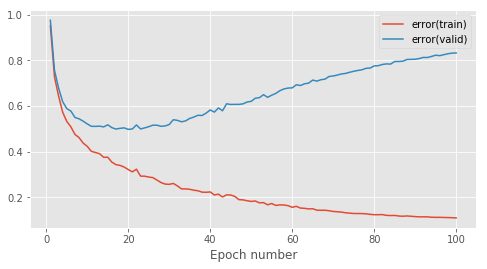

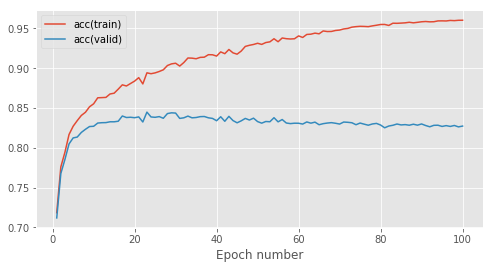

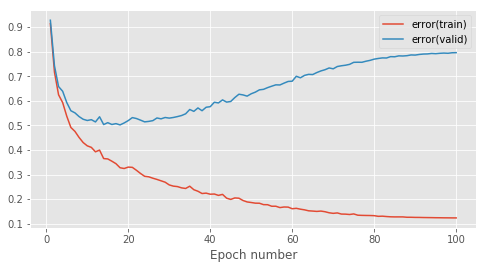

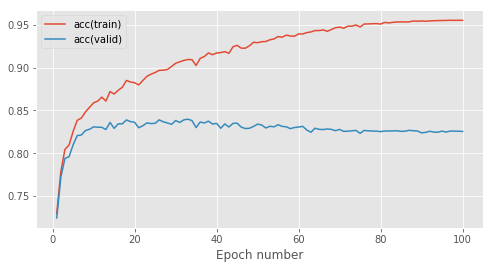

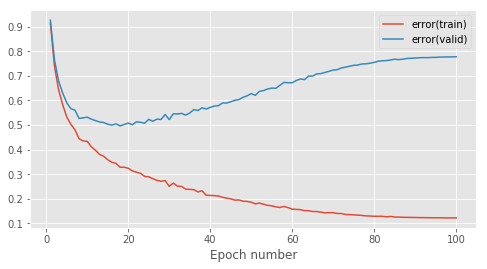

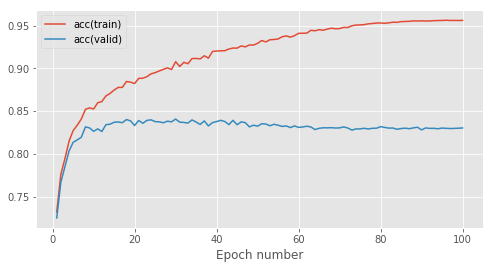

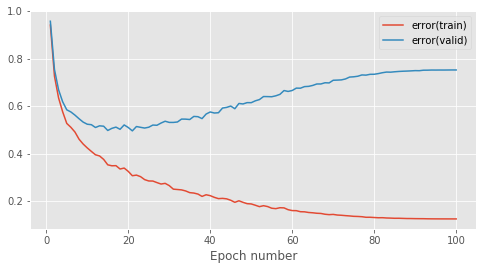

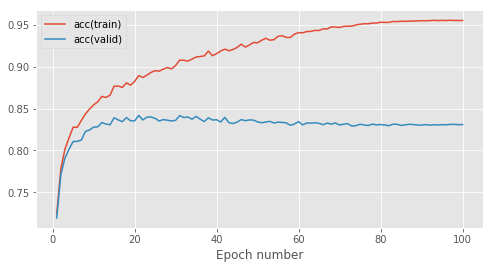

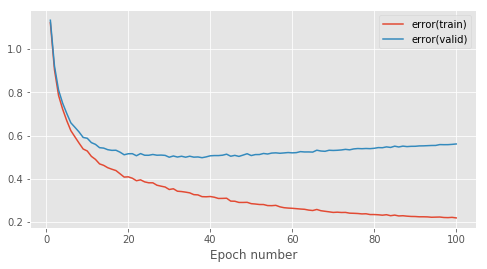

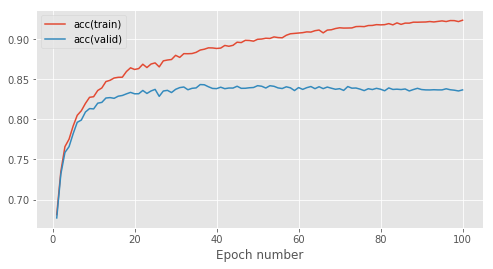

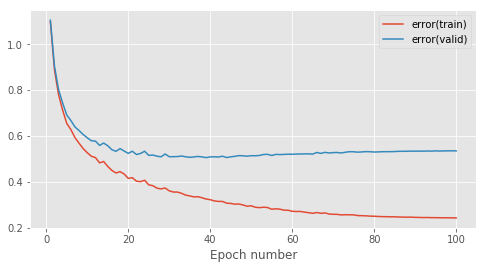

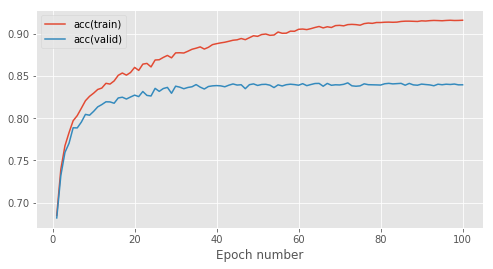

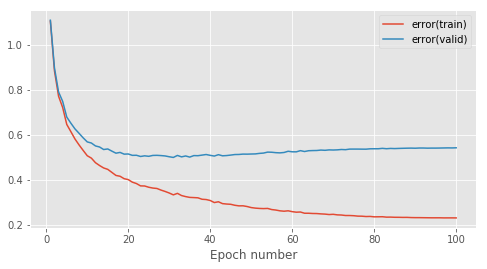

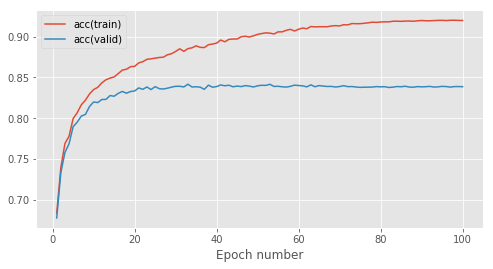

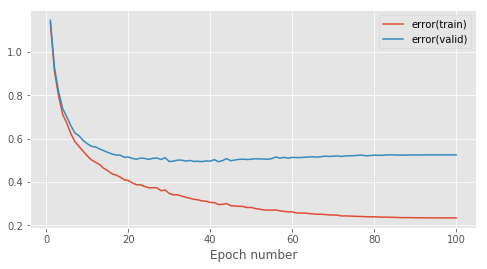

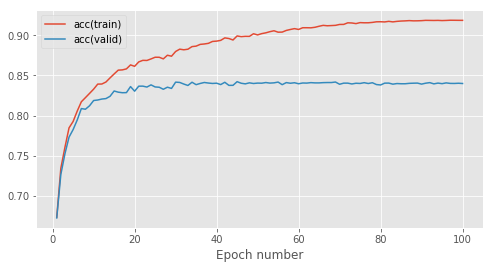

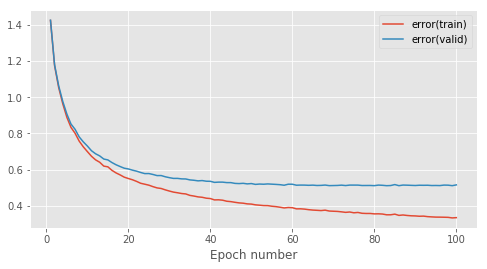

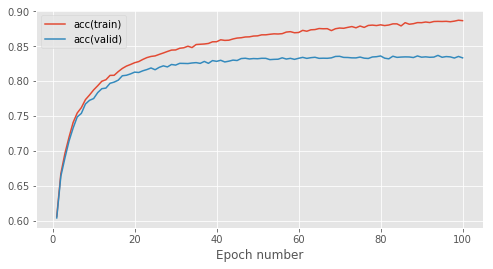

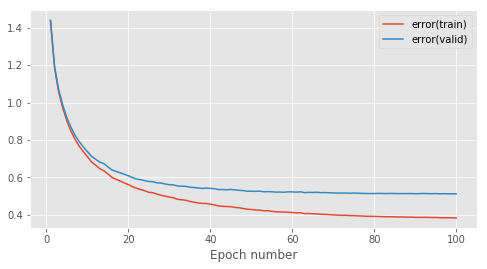

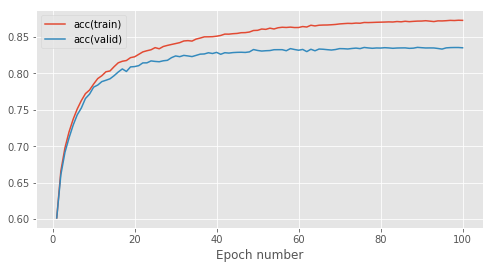

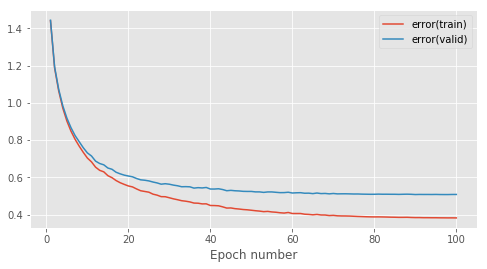

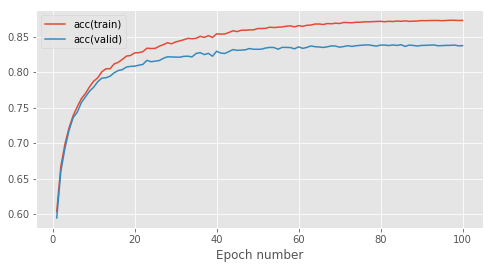

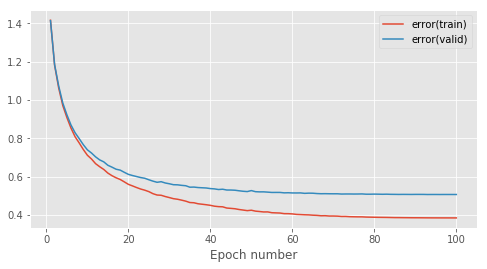

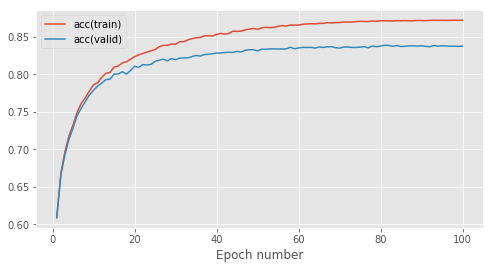

In [22]:
num_epochs = 100
max_learning_rates_3 = [0.0005, 0.00025, 0.0001]
min_learning_rates_3 = [0.00005, 0.00001, 5e-6, 1e-6]
adam_without_restarts_models = OrderedDict()
adam_without_restarts_stats = OrderedDict()
adam_without_restarts_lrs = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for max_lr in max_learning_rates_3:
    for min_lr in min_learning_rates_3:
        
        layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
        
        model = MultipleLayerModel(layers)
        learning_rule = AdamLearningRule(0.0001, 0.5, 0.999)
        scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_lr, 
                                    max_learning_rate=max_lr,
                                    total_iters_per_period=100.,
                                    max_learning_rate_discount_factor=1.0,
                                    period_iteration_expansion_factor=1.0)
        
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
              model, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True)
        
        adam_without_restarts_models[(max_lr, min_lr)] = model
        adam_without_restarts_stats[(max_lr, min_lr)] = stats
        adam_without_restarts_lrs[(max_lr, min_lr)] = optimiser.learning_rate_array
        
        final_train_errors.append(stats[-1, keys['error(train)']])
        final_valid_errors.append(stats[-1, keys['error(valid)']])
        final_train_accs.append(stats[-1, keys['acc(train)']])
        final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [25]:
print('| max lr | min lr | final train error | final train acc | best valid error | best valid acc | ith epoch |')
print('|--------|--------|-------------------|-----------------|------------------|----------------|-----------|')
i = 0
for max_lr in max_learning_rates_3:
    for min_lr in min_learning_rates_3:
        stats = adam_without_restarts_stats[(max_lr, min_lr)]
        print('| {0:.4f} |{1:.7f} |     {2:.3e}     |     {3:.2f}       |     {4:.3e}    |     {5:.3f}     |     {6:2d}    |'
              .format(max_lr, min_lr,
                     final_train_errors[i], final_train_accs[i] * 100,
                     stats[1:, -2][np.argmax(stats[1:, -1])], np.max(stats[1:, -1]) * 100 , np.argmax(stats[1:, -1])))
        i += 1

| max lr | min lr | final train error | final train acc | best valid error | best valid acc | ith epoch |
|--------|--------|-------------------|-----------------|------------------|----------------|-----------|
| 0.0005 |0.0000500 |     1.095e-01     |     96.02       |     4.990e-01    |     84.481     |     22    |
| 0.0005 |0.0000100 |     1.233e-01     |     95.53       |     5.401e-01    |     83.975     |     32    |
| 0.0005 |0.0000050 |     1.219e-01     |     95.62       |     5.222e-01    |     84.070     |     29    |
| 0.0005 |0.0000010 |     1.254e-01     |     95.55       |     4.960e-01    |     84.190     |     20    |
| 0.0003 |0.0000500 |     2.192e-01     |     92.37       |     5.002e-01    |     84.342     |     35    |
| 0.0003 |0.0000100 |     2.420e-01     |     91.64       |     5.256e-01    |     84.203     |     71    |
| 0.0003 |0.0000050 |     2.311e-01     |     91.99       |     5.018e-01    |     84.171     |     32    |
| 0.0003 |0.0000010 |     2.336e

In [52]:
print('| max lr | min lr | final train error | final train acc | final valid error | final valid acc | ith epoch |')
print('|--------|--------|-------------------|-----------------|------------------|----------------|-----------|')
i = 0
for max_lr in max_learning_rates_3:
    for min_lr in min_learning_rates_3:
        stats = adam_without_restarts_stats[(max_lr, min_lr)]
        print('| {0:.4f} |{1:.7f} |     {2:.3e}     |     {3:.2f}       |     {4:.3e}    |     {5:.3f}     |     {6:2d}    |'
              .format(max_lr, min_lr,
                     stats[-1, 0], stats[-1, 1] * 100,
                     stats[-1, 2], stats[-1, 3] * 100 , np.argmax(stats[1:, -1])))
        i += 1

| max lr | min lr | final train error | final train acc | final valid error | final valid acc | ith epoch |
|--------|--------|-------------------|-----------------|------------------|----------------|-----------|
| 0.0005 |0.0000500 |     1.095e-01     |     96.02       |     8.319e-01    |     82.728     |     22    |
| 0.0005 |0.0000100 |     1.233e-01     |     95.53       |     7.962e-01    |     82.538     |     32    |
| 0.0005 |0.0000050 |     1.219e-01     |     95.62       |     7.779e-01    |     83.032     |     29    |
| 0.0005 |0.0000010 |     1.254e-01     |     95.55       |     7.523e-01    |     83.101     |     20    |
| 0.0003 |0.0000500 |     2.192e-01     |     92.37       |     5.612e-01    |     83.677     |     35    |
| 0.0003 |0.0000100 |     2.420e-01     |     91.64       |     5.346e-01    |     83.975     |     71    |
| 0.0003 |0.0000050 |     2.311e-01     |     91.99       |     5.421e-01    |     83.867     |     32    |
| 0.0003 |0.0000010 |     3.35

In [47]:
adam_without_restart_model =adam_without_restarts_models[(0.00025, 0.0000010)]
adam_without_restart_stats = adam_without_restarts_stats[(0.00025, 0.0000010)]
adam_without_restart_lrs = adam_without_restarts_lrs[(0.00025, 0.0000010)]
acc = evaluation_acc(test_data, adam_without_restart_model)
acc

0.8280379746835443

In [49]:
adam_without_restart_stats[-1, -1]

0.836012658227848

cosine with restart

Epoch 1: 3.6s to complete
    error(train)=1.10e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.83e-01


Epoch 2: 3.6s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.88e-01, acc(valid)=7.37e-01


Epoch 3: 3.5s to complete
    error(train)=7.68e-01, acc(train)=7.69e-01, error(valid)=7.95e-01, acc(valid)=7.60e-01


Epoch 4: 3.8s to complete
    error(train)=6.94e-01, acc(train)=7.88e-01, error(valid)=7.24e-01, acc(valid)=7.79e-01


Epoch 5: 4.1s to complete
    error(train)=6.52e-01, acc(train)=7.98e-01, error(valid)=6.92e-01, acc(valid)=7.86e-01


Epoch 6: 3.6s to complete
    error(train)=6.06e-01, acc(train)=8.09e-01, error(valid)=6.48e-01, acc(valid)=7.96e-01


Epoch 7: 4.9s to complete
    error(train)=5.79e-01, acc(train)=8.16e-01, error(valid)=6.26e-01, acc(valid)=8.04e-01


Epoch 8: 3.6s to complete
    error(train)=5.65e-01, acc(train)=8.18e-01, error(valid)=6.17e-01, acc(valid)=8.02e-01


Epoch 9: 3.7s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


Epoch 10: 3.6s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


Epoch 11: 3.6s to complete
    error(train)=5.15e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


Epoch 12: 3.9s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=5.68e-01, acc(valid)=8.16e-01


Epoch 13: 4.0s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


Epoch 14: 4.2s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 15: 3.8s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


Epoch 16: 4.3s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 17: 3.6s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


Epoch 18: 3.5s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


Epoch 19: 3.7s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


Epoch 20: 3.9s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 21: 3.7s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 22: 3.7s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 23: 3.7s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 24: 3.7s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 25: 3.7s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


Epoch 26: 3.8s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.17e-01


Epoch 27: 3.7s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 28: 3.7s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 29: 3.6s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 30: 3.5s to complete
    error(train)=4.19e-01, acc(train)=8.60e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 31: 4.2s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


Epoch 32: 4.0s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 33: 3.6s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


Epoch 34: 3.6s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 35: 3.5s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 36: 3.8s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


Epoch 37: 3.8s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 38: 3.9s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


Epoch 39: 4.4s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 40: 4.6s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


Epoch 41: 3.8s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 42: 4.0s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 43: 3.8s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 44: 3.8s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 45: 3.8s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 46: 4.1s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 47: 3.5s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 48: 3.6s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 49: 3.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 50: 3.6s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 51: 4.3s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 52: 4.2s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 53: 3.7s to complete
    error(train)=3.43e-01, acc(train)=8.85e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 54: 3.7s to complete
    error(train)=3.39e-01, acc(train)=8.86e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 55: 3.8s to complete
    error(train)=3.38e-01, acc(train)=8.86e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 56: 3.7s to complete
    error(train)=3.37e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 57: 4.4s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 58: 3.8s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 59: 3.8s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 60: 4.1s to complete
    error(train)=3.32e-01, acc(train)=8.88e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 61: 4.2s to complete
    error(train)=3.32e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 62: 4.5s to complete
    error(train)=3.30e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 63: 4.2s to complete
    error(train)=3.30e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 64: 3.7s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 65: 3.7s to complete
    error(train)=3.30e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 66: 3.7s to complete
    error(train)=3.29e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 67: 3.7s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 68: 3.8s to complete
    error(train)=3.28e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 69: 3.7s to complete
    error(train)=3.28e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 70: 3.8s to complete
    error(train)=3.28e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 71: 3.7s to complete
    error(train)=3.27e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 72: 3.8s to complete
    error(train)=3.27e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 73: 3.8s to complete
    error(train)=3.27e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 74: 3.8s to complete
    error(train)=3.27e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 75: 3.7s to complete
    error(train)=3.27e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 76: 5.2s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 77: 3.7s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 78: 3.7s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 79: 3.5s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 80: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 81: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 82: 2.0s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 83: 2.0s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 84: 2.1s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 85: 2.0s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 86: 2.0s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 87: 2.0s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 88: 2.0s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


Epoch 89: 2.0s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 90: 2.0s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 91: 2.0s to complete
    error(train)=2.99e-01, acc(train)=8.96e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 92: 2.0s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


Epoch 93: 2.0s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 94: 2.0s to complete
    error(train)=2.96e-01, acc(train)=8.96e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 95: 2.0s to complete
    error(train)=2.89e-01, acc(train)=9.00e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


Epoch 96: 2.0s to complete
    error(train)=2.86e-01, acc(train)=9.01e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


Epoch 97: 2.0s to complete
    error(train)=2.89e-01, acc(train)=8.99e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


Epoch 98: 2.0s to complete
    error(train)=2.91e-01, acc(train)=8.98e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 99: 2.0s to complete
    error(train)=2.80e-01, acc(train)=9.03e-01, error(valid)=5.26e-01, acc(valid)=8.37e-01


Epoch 100: 2.4s to complete
    error(train)=2.84e-01, acc(train)=9.00e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


Epoch 1: 2.0s to complete
    error(train)=1.12e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.70e-01


Epoch 2: 2.0s to complete
    error(train)=9.09e-01, acc(train)=7.30e-01, error(valid)=9.29e-01, acc(valid)=7.21e-01


Epoch 3: 1.9s to complete
    error(train)=7.98e-01, acc(train)=7.55e-01, error(valid)=8.20e-01, acc(valid)=7.48e-01


Epoch 4: 2.0s to complete
    error(train)=7.14e-01, acc(train)=7.81e-01, error(valid)=7.46e-01, acc(valid)=7.75e-01


Epoch 5: 2.0s to complete
    error(train)=6.63e-01, acc(train)=7.95e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


Epoch 6: 2.0s to complete
    error(train)=6.27e-01, acc(train)=8.02e-01, error(valid)=6.68e-01, acc(valid)=7.93e-01


Epoch 7: 2.0s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=6.46e-01, acc(valid)=8.00e-01


Epoch 8: 2.0s to complete
    error(train)=5.61e-01, acc(train)=8.22e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


Epoch 9: 2.0s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.09e-01, acc(valid)=8.07e-01


Epoch 10: 2.0s to complete
    error(train)=5.27e-01, acc(train)=8.32e-01, error(valid)=5.88e-01, acc(valid)=8.17e-01


Epoch 11: 2.1s to complete
    error(train)=5.18e-01, acc(train)=8.34e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


Epoch 12: 2.0s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 13: 2.1s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 14: 2.2s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


Epoch 15: 2.0s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 16: 2.2s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


Epoch 17: 2.0s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


Epoch 18: 2.0s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 19: 2.0s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 20: 2.1s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 21: 2.0s to complete
    error(train)=4.48e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 22: 2.2s to complete
    error(train)=4.47e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 23: 2.0s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 24: 2.0s to complete
    error(train)=4.44e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 25: 2.0s to complete
    error(train)=4.44e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 26: 2.2s to complete
    error(train)=4.63e-01, acc(train)=8.46e-01, error(valid)=5.52e-01, acc(valid)=8.19e-01


Epoch 27: 2.0s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 28: 2.0s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 29: 2.1s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 30: 2.1s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


Epoch 31: 2.0s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 32: 2.1s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


Epoch 33: 2.0s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 34: 1.9s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 35: 2.0s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 36: 2.2s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 37: 2.0s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 38: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 39: 2.0s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 40: 2.0s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 41: 2.0s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 42: 2.0s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 43: 2.0s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 44: 2.0s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 45: 2.0s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 46: 2.0s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 47: 2.0s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 48: 2.0s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 49: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 50: 2.2s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 51: 2.0s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 52: 2.1s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 53: 2.2s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 54: 2.0s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 55: 2.2s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 56: 2.5s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 57: 2.1s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 58: 2.0s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 59: 2.0s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 60: 2.0s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 61: 2.0s to complete
    error(train)=3.39e-01, acc(train)=8.86e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 62: 2.0s to complete
    error(train)=3.38e-01, acc(train)=8.86e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 63: 2.0s to complete
    error(train)=3.37e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 64: 2.0s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 65: 2.0s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 66: 2.0s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 67: 2.0s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


Epoch 68: 2.1s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 69: 2.0s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 70: 2.0s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 71: 2.3s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 72: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 73: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 74: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 75: 2.3s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 76: 2.1s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 77: 2.0s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 78: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.75e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 79: 2.2s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 80: 2.0s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 81: 2.1s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 82: 2.0s to complete
    error(train)=3.39e-01, acc(train)=8.81e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 83: 2.0s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 84: 2.1s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 85: 2.0s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 86: 2.1s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


Epoch 87: 2.0s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 88: 2.1s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 89: 2.2s to complete
    error(train)=3.16e-01, acc(train)=8.89e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 90: 2.0s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 91: 2.0s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.15e-01, acc(valid)=8.39e-01


Epoch 92: 2.0s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 93: 2.1s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 94: 2.0s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 95: 2.0s to complete
    error(train)=2.98e-01, acc(train)=8.97e-01, error(valid)=5.16e-01, acc(valid)=8.39e-01


Epoch 96: 2.1s to complete
    error(train)=2.96e-01, acc(train)=8.97e-01, error(valid)=5.17e-01, acc(valid)=8.39e-01


Epoch 97: 2.1s to complete
    error(train)=2.96e-01, acc(train)=8.97e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


Epoch 98: 2.2s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 99: 2.2s to complete
    error(train)=2.96e-01, acc(train)=8.96e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 100: 2.1s to complete
    error(train)=2.90e-01, acc(train)=8.99e-01, error(valid)=5.20e-01, acc(valid)=8.38e-01


Epoch 1: 1.9s to complete
    error(train)=1.13e+00, acc(train)=6.76e-01, error(valid)=1.14e+00, acc(valid)=6.72e-01


Epoch 2: 3.1s to complete
    error(train)=9.07e-01, acc(train)=7.35e-01, error(valid)=9.18e-01, acc(valid)=7.33e-01


Epoch 3: 3.8s to complete
    error(train)=8.00e-01, acc(train)=7.59e-01, error(valid)=8.21e-01, acc(valid)=7.52e-01


Epoch 4: 3.8s to complete
    error(train)=7.21e-01, acc(train)=7.80e-01, error(valid)=7.48e-01, acc(valid)=7.71e-01


Epoch 5: 3.7s to complete
    error(train)=6.67e-01, acc(train)=7.95e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


Epoch 6: 3.7s to complete
    error(train)=6.36e-01, acc(train)=8.01e-01, error(valid)=6.76e-01, acc(valid)=7.88e-01


Epoch 7: 3.8s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


Epoch 8: 4.0s to complete
    error(train)=5.76e-01, acc(train)=8.18e-01, error(valid)=6.23e-01, acc(valid)=8.03e-01


Epoch 9: 3.9s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


Epoch 10: 3.8s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 11: 3.6s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 12: 3.9s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


Epoch 13: 3.8s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=5.69e-01, acc(valid)=8.16e-01


Epoch 14: 3.8s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 15: 3.8s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.53e-01, acc(valid)=8.21e-01


Epoch 16: 3.9s to complete
    error(train)=4.73e-01, acc(train)=8.48e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 17: 3.7s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 18: 4.0s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 19: 3.2s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 20: 3.1s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


Epoch 21: 4.6s to complete
    error(train)=4.55e-01, acc(train)=8.53e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 22: 4.4s to complete
    error(train)=4.53e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 23: 3.7s to complete
    error(train)=4.53e-01, acc(train)=8.54e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 24: 3.7s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 25: 5.3s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 26: 4.1s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 27: 3.8s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 28: 3.8s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 29: 3.9s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 30: 3.7s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 31: 3.6s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 32: 3.7s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 33: 3.7s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 34: 3.6s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 35: 3.8s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 36: 4.0s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 37: 3.7s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


Epoch 38: 3.8s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 39: 3.8s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 40: 3.7s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 41: 3.7s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 42: 3.8s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 43: 4.0s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 44: 4.3s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 45: 3.8s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 46: 3.6s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 47: 3.9s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 48: 4.0s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 49: 3.6s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 50: 3.7s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 51: 3.7s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 52: 3.9s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 53: 3.7s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 54: 3.9s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 55: 3.8s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 56: 3.7s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 57: 3.7s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 58: 4.0s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 59: 3.9s to complete
    error(train)=3.54e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 60: 3.9s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 61: 3.9s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 62: 3.9s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


Epoch 63: 2.1s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 64: 2.0s to complete
    error(train)=3.51e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 65: 2.2s to complete
    error(train)=3.50e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 66: 2.0s to complete
    error(train)=3.50e-01, acc(train)=8.83e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 67: 2.0s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 68: 2.0s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 69: 2.2s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 70: 2.2s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 71: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.41e-01


Epoch 72: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 73: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.84e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 74: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 75: 2.1s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


Epoch 76: 2.2s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 77: 2.3s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 78: 2.0s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


Epoch 79: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 80: 2.0s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 81: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 82: 3.0s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


Epoch 83: 3.7s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 84: 3.6s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 85: 3.8s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 86: 3.8s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 87: 3.8s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 88: 3.9s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 89: 4.0s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 90: 3.9s to complete
    error(train)=3.28e-01, acc(train)=8.86e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 91: 3.9s to complete
    error(train)=3.25e-01, acc(train)=8.88e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 92: 3.8s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


Epoch 93: 3.6s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


Epoch 94: 3.8s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


Epoch 95: 4.3s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 96: 4.1s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=5.22e-01, acc(valid)=8.39e-01


Epoch 97: 3.9s to complete
    error(train)=3.15e-01, acc(train)=8.90e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01


Epoch 98: 3.7s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 99: 3.9s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


Epoch 100: 4.0s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 1: 4.3s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


Epoch 2: 4.0s to complete
    error(train)=8.94e-01, acc(train)=7.36e-01, error(valid)=9.06e-01, acc(valid)=7.29e-01


Epoch 3: 4.2s to complete
    error(train)=7.80e-01, acc(train)=7.64e-01, error(valid)=8.00e-01, acc(valid)=7.59e-01


Epoch 4: 3.6s to complete
    error(train)=7.03e-01, acc(train)=7.87e-01, error(valid)=7.28e-01, acc(valid)=7.81e-01


Epoch 5: 3.9s to complete
    error(train)=6.58e-01, acc(train)=7.97e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


Epoch 6: 3.7s to complete
    error(train)=6.20e-01, acc(train)=8.07e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


Epoch 7: 3.7s to complete
    error(train)=5.97e-01, acc(train)=8.11e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


Epoch 8: 3.8s to complete
    error(train)=5.61e-01, acc(train)=8.23e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


Epoch 9: 3.8s to complete
    error(train)=5.42e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


Epoch 10: 3.8s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 11: 3.5s to complete
    error(train)=5.15e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.19e-01


Epoch 12: 3.8s to complete
    error(train)=5.01e-01, acc(train)=8.39e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


Epoch 13: 3.8s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 14: 3.9s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 15: 3.6s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 16: 3.7s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


Epoch 17: 3.6s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 18: 3.7s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 19: 3.9s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


Epoch 20: 4.4s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 21: 3.8s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 22: 4.2s to complete
    error(train)=4.42e-01, acc(train)=8.57e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 23: 5.3s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 24: 4.2s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 25: 4.2s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 26: 3.8s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


Epoch 27: 4.4s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 28: 4.3s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 29: 3.9s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 30: 3.6s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 31: 3.7s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 32: 3.9s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 33: 3.9s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 34: 3.9s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 35: 3.8s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 36: 3.9s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 37: 3.7s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 38: 3.9s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 39: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 40: 3.8s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 41: 3.8s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 42: 3.9s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 43: 4.0s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 44: 4.0s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


Epoch 45: 3.8s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 46: 4.1s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 47: 3.8s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 48: 3.7s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 49: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 50: 4.1s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 51: 3.8s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 52: 3.6s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 53: 3.8s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 54: 3.7s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 55: 3.8s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


Epoch 56: 3.8s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 57: 3.7s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


Epoch 58: 3.8s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 59: 4.5s to complete
    error(train)=3.50e-01, acc(train)=8.83e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 60: 3.6s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 61: 3.8s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 62: 3.9s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 63: 4.4s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 64: 4.4s to complete
    error(train)=3.47e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


Epoch 65: 4.1s to complete
    error(train)=3.47e-01, acc(train)=8.84e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 66: 4.3s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 67: 4.7s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 68: 4.1s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 69: 4.1s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 70: 3.8s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 71: 4.3s to complete
    error(train)=3.45e-01, acc(train)=8.85e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


Epoch 72: 4.3s to complete
    error(train)=3.45e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 73: 3.8s to complete
    error(train)=3.45e-01, acc(train)=8.85e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 74: 3.7s to complete
    error(train)=3.45e-01, acc(train)=8.85e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 75: 3.8s to complete
    error(train)=3.45e-01, acc(train)=8.85e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 76: 3.8s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 77: 4.2s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=4.99e-01, acc(valid)=8.40e-01


Epoch 78: 3.8s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


Epoch 79: 3.7s to complete
    error(train)=3.47e-01, acc(train)=8.82e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 80: 3.7s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 81: 3.7s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 82: 3.8s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


Epoch 83: 2.9s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 84: 2.0s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


Epoch 85: 2.0s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


Epoch 86: 2.0s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


Epoch 87: 2.0s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 88: 2.0s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


Epoch 89: 2.1s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 90: 2.0s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


Epoch 91: 2.0s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 92: 2.0s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 93: 2.0s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


Epoch 94: 1.9s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.99e-01, acc(valid)=8.40e-01


Epoch 95: 2.2s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.00e-01, acc(valid)=8.42e-01


Epoch 96: 2.0s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


Epoch 97: 2.0s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


Epoch 98: 2.1s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=4.97e-01, acc(valid)=8.41e-01


Epoch 99: 2.0s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


Epoch 100: 2.0s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=4.97e-01, acc(valid)=8.42e-01


Epoch 1: 2.0s to complete
    error(train)=1.11e+00, acc(train)=6.79e-01, error(valid)=1.12e+00, acc(valid)=6.77e-01


Epoch 2: 1.9s to complete
    error(train)=8.73e-01, acc(train)=7.40e-01, error(valid)=8.90e-01, acc(valid)=7.34e-01


Epoch 3: 2.0s to complete
    error(train)=7.70e-01, acc(train)=7.65e-01, error(valid)=7.92e-01, acc(valid)=7.58e-01


Epoch 4: 2.1s to complete
    error(train)=7.07e-01, acc(train)=7.81e-01, error(valid)=7.32e-01, acc(valid)=7.75e-01


Epoch 5: 2.1s to complete
    error(train)=6.46e-01, acc(train)=7.98e-01, error(valid)=6.77e-01, acc(valid)=7.88e-01


Epoch 6: 2.1s to complete
    error(train)=6.09e-01, acc(train)=8.07e-01, error(valid)=6.45e-01, acc(valid)=7.97e-01


Epoch 7: 2.1s to complete
    error(train)=5.74e-01, acc(train)=8.17e-01, error(valid)=6.15e-01, acc(valid)=8.05e-01


Epoch 8: 2.0s to complete
    error(train)=5.52e-01, acc(train)=8.23e-01, error(valid)=5.97e-01, acc(valid)=8.09e-01


Epoch 9: 2.1s to complete
    error(train)=5.29e-01, acc(train)=8.29e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


Epoch 10: 2.0s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 11: 2.1s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 12: 2.0s to complete
    error(train)=4.92e-01, acc(train)=8.37e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 13: 2.3s to complete
    error(train)=4.85e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 14: 2.1s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


Epoch 15: 2.0s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 16: 2.0s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 17: 2.0s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 18: 2.1s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 19: 2.0s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 20: 2.0s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 21: 1.9s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 22: 2.1s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 23: 2.0s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 24: 2.2s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 25: 2.0s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 26: 2.0s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


Epoch 27: 2.0s to complete
    error(train)=4.40e-01, acc(train)=8.54e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


Epoch 28: 2.0s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 29: 2.1s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 30: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 31: 2.0s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 32: 2.0s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 33: 2.0s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 34: 2.1s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 35: 2.1s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 36: 2.0s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 37: 1.9s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 38: 2.0s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 39: 2.0s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 40: 2.0s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 41: 2.1s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 42: 2.6s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 43: 4.6s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 44: 4.8s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 45: 4.1s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 46: 3.8s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 47: 3.6s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 48: 3.7s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 49: 3.5s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 50: 3.8s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


Epoch 51: 4.0s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


Epoch 52: 3.7s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


Epoch 53: 3.6s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 54: 3.6s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 55: 3.8s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 56: 3.7s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 57: 3.8s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


Epoch 58: 3.8s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 59: 3.8s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


Epoch 60: 3.7s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 61: 3.7s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 62: 3.7s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 63: 3.7s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 64: 3.7s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 65: 3.6s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 66: 4.5s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 67: 5.2s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


Epoch 68: 4.0s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


Epoch 69: 4.9s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 70: 4.1s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


Epoch 71: 3.8s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 72: 4.0s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 73: 4.3s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 74: 3.7s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 75: 3.7s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 76: 3.7s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 77: 3.6s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 78: 4.0s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 79: 4.1s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 80: 3.9s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 81: 3.8s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 82: 3.7s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


Epoch 83: 3.7s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 84: 3.9s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 85: 3.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 86: 3.7s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


Epoch 87: 3.8s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 88: 3.8s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 89: 5.8s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 90: 3.8s to complete
    error(train)=3.39e-01, acc(train)=8.85e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


Epoch 91: 4.1s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 92: 3.9s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 93: 3.7s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 94: 3.8s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 95: 3.7s to complete
    error(train)=3.33e-01, acc(train)=8.88e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 96: 3.6s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


Epoch 97: 3.7s to complete
    error(train)=3.32e-01, acc(train)=8.88e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 98: 3.7s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=4.94e-01, acc(valid)=8.41e-01


Epoch 99: 3.8s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 100: 3.7s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


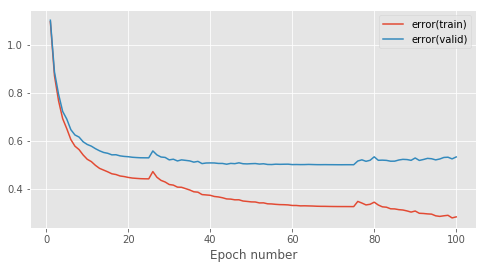

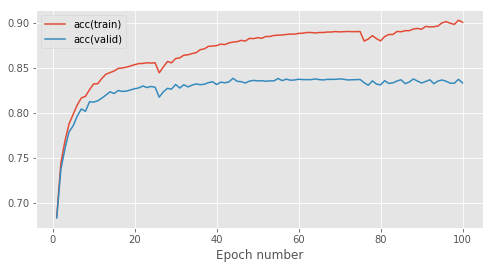

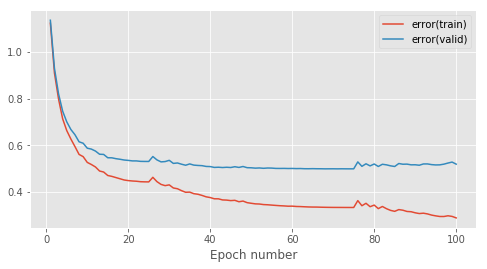

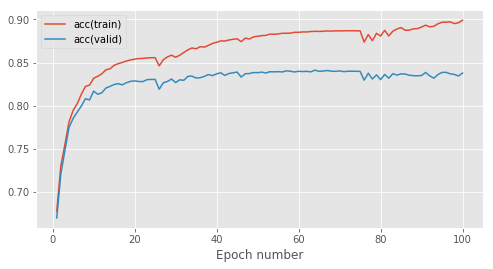

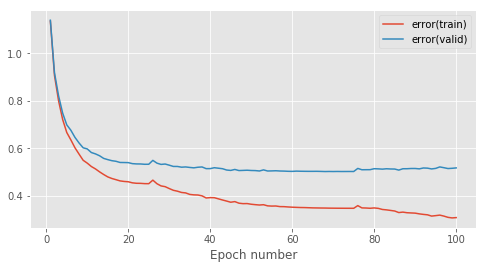

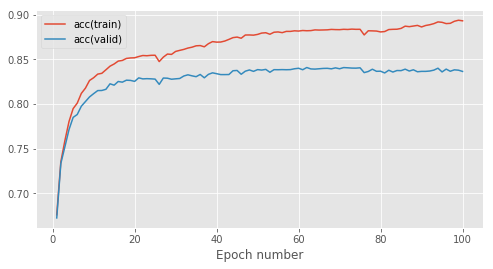

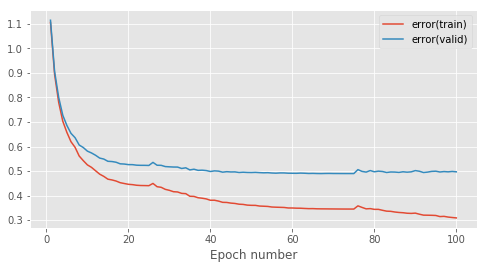

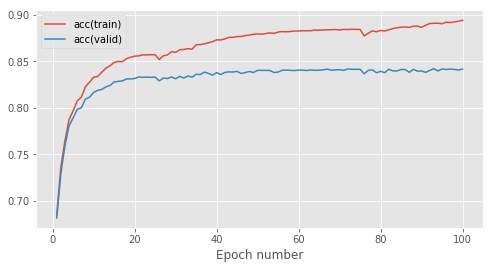

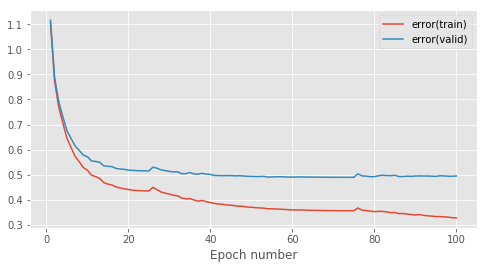

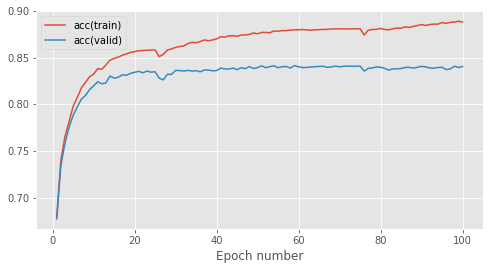

In [30]:
num_epochs = 100
max_learning_rates_4 = [0.00025]
min_learning_rates_4 = [1e-6]
decay_factors = [1.0, 0.9, 0.8, 0.7, 0.6]
adam_with_restarts_models = OrderedDict()
adam_with_restarts_stats = OrderedDict()
adam_with_restarts_lrs = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for max_lr in max_learning_rates_4:
    for min_lr in min_learning_rates_4:
        for d in decay_factors:
        
            layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

            model = MultipleLayerModel(layers)
            learning_rule = AdamLearningRule(0.0001, 0.5, 0.999)
            scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=min_lr, 
                                        max_learning_rate=max_lr,
                                        total_iters_per_period=25.,
                                        max_learning_rate_discount_factor=d,
                                        period_iteration_expansion_factor=3)

            stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
                  model, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True)

            adam_with_restarts_models[d] = model
            adam_with_restarts_stats[d] = stats
            adam_with_restarts_lrs[d] = optimiser.learning_rate_array

            final_train_errors.append(stats[-1, keys['error(train)']])
            final_valid_errors.append(stats[-1, keys['error(valid)']])
            final_train_accs.append(stats[-1, keys['acc(train)']])
            final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [32]:
print('| max lr | min lr | final train error | final train acc | final valid error | final valid acc | ith epoch |')
print('|--------|--------|-------------------|-----------------|------------------|----------------|-----------|')
i = 0
for max_lr in max_learning_rates_4:
    for min_lr in min_learning_rates_4:
        for d in decay_factors:
            stats = adam_with_restarts_stats[d]
            print('| {0:.4f} |{1:.7f} |     {2:.3e}     |     {3:.2f}       |     {4:.3e}    |     {5:.3f}     |     {6:2d}    |'
                  .format(max_lr, min_lr,
                         final_train_errors[i], final_train_accs[i] * 100,
                         final_valid_errors[i], final_valid_accs[i] * 100 , np.argmax(stats[1:, -1])))
            i += 1

| max lr | min lr | final train error | final train acc | final valid error | final valid acc | ith epoch |
|--------|--------|-------------------|-----------------|------------------|----------------|-----------|
| 0.0003 |0.0000010 |     2.844e-01     |     90.03       |     5.340e-01    |     83.310     |     43    |
| 0.0003 |0.0000010 |     2.896e-01     |     89.91       |     5.196e-01    |     83.785     |     63    |
| 0.0003 |0.0000010 |     3.090e-01     |     89.30       |     5.179e-01    |     83.633     |     61    |
| 0.0003 |0.0000010 |     3.090e-01     |     89.44       |     4.969e-01    |     84.177     |     92    |
| 0.0003 |0.0000010 |     3.274e-01     |     88.82       |     4.947e-01    |     84.051     |     58    |


In [53]:
adam_with_restart_model =adam_with_restarts_models[0.7]
adam_with_restart_stats = adam_with_restarts_stats[0.7]
adam_with_restart_lrs = adam_with_restarts_lrs[0.7]
acc = evaluation_acc(test_data, adam_with_restart_model)
acc

0.8307594936708861

In [61]:
stats = [sgd_fixed_lr_stats, sgd_without_restart_stats, sgd_with_restart_stats,
         adam_fixed_lr_stats, adam_without_restart_stats, adam_with_restart_stats]


In [73]:
lrs =[sgd_fixed_lr_lrs, sgd_without_restart_lrs, sgd_with_restart_lrs,
         adam_fixed_lr_lrs, adam_without_restart_lrs, adam_with_restart_lrs]

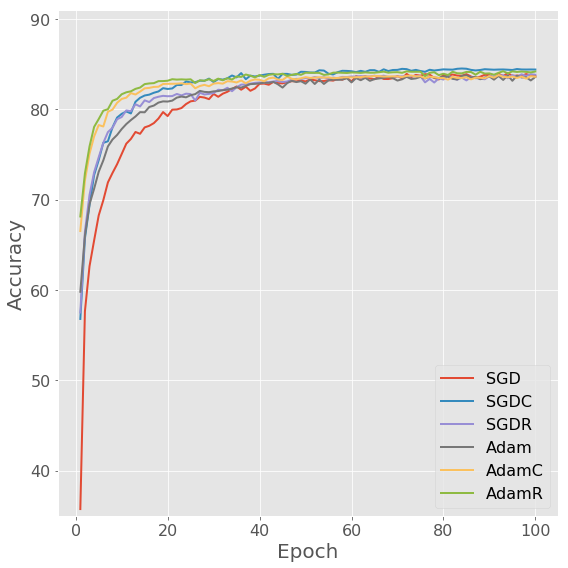

In [79]:
labels =['SGD', 'SGDC', 'SGDR', 'Adam', 'AdamC', 'AdamR']
plt.figure(figsize=(8,8))
for k, stat in zip(labels, stats):
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, -1] *100, label=k, linewidth=2)

plt.legend(loc=4, fontsize=16)
plt.ylim((35, 91))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.savefig('4_1.pdf')
plt.show()

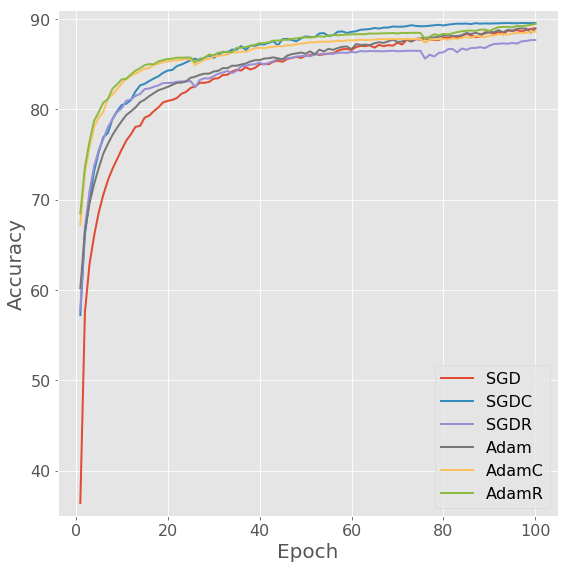

In [80]:
labels =['SGD', 'SGDC', 'SGDR', 'Adam', 'AdamC', 'AdamR']
plt.figure(figsize=(8,8))
for k, stat in zip(labels, stats):
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, 1]  * 100, label=k, linewidth=2)

plt.legend(loc=4, fontsize=16)
plt.ylim((35, 91))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.savefig('4_2.pdf')
plt.show()

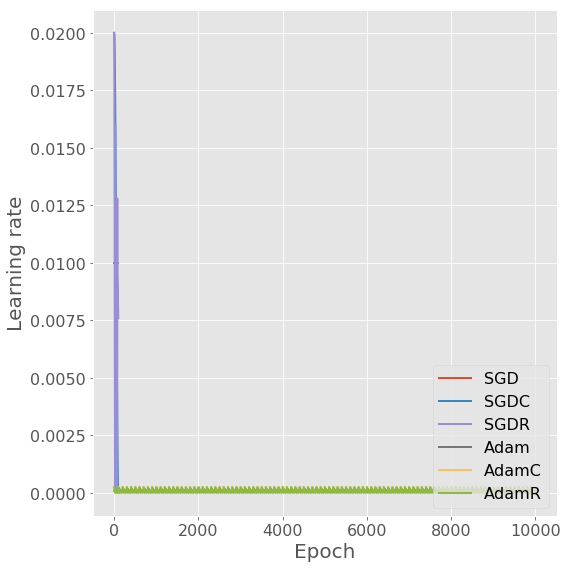

In [74]:
labels =['SGD', 'SGDC', 'SGDR', 'Adam', 'AdamC', 'AdamR']
plt.figure(figsize=(8,8))
nums = [1,2,3,4,5,6]
for k, lr, num in zip(labels, lrs, nums):
    if num >= 4:
        # lr = lr *100
        pass
    plt.plot(np.arange(1, len(lr)+1), lr, label=k, linewidth=2)

plt.legend(loc=4, fontsize=16)
plt.ylabel('Learning rate', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.savefig('4_2.pdf')
plt.show()